# Comparing Regression Models

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from math import sqrt
import matplotlib.pyplot as plt
import time
import random

In [2]:
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from itertools import product
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cat

In [3]:
data=pd.read_csv('./kc_house_data.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1.0,0,3,7,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2.0,0,3,7,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,1.0,0,3,6,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,5,7,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1.0,0,3,8,1987,0,98074,47.6168,-122.045


In [5]:
len(data)

21613

In [6]:
data=data.drop(['id', 'date', 'zipcode', 'lat', 'long'],axis=1)

In [9]:
size=data.shape[0]
random_index=random.sample(list(np.arange(size)),size//4)
data=data.iloc[random_index]

In [10]:
len(data)

5403

In [11]:
feature_names=data.columns.difference(['price'])
feature_names

Index(['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'waterfront',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [12]:
X=data[feature_names]
y=data['price']
train_X,test_X,train_Y,test_Y=train_test_split(X,y, test_size=0.3, random_state=42)
print(train_X.shape, train_Y.shape,test_X.shape,test_Y.shape)

(3782, 8) (3782,) (1621, 8) (1621,)


In [13]:
train_X.dtypes

bathrooms       float64
bedrooms          int64
condition         int64
floors          float64
grade             int64
waterfront        int64
yr_built          int64
yr_renovated      int64
dtype: object

## SVR (SVM Regression Model)

In [14]:
start=time.time()
svm_regression_model=svm.LinearSVR(random_state=0,tol=1e-5)
svm_regression_model=svm_regression_model.fit(train_X,train_Y)
svm_predict=svm_regression_model.predict(test_X)
svm_rmse=sqrt(mean_squared_error(svm_predict, test_Y)) # RMSE
svm_time=time.time() - start # 코드 실행 시간 계산

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
print(svm_rmse,svm_time)

387167.7314876628 0.030917882919311523


In [17]:
C = 1.0 #Regularization parameter
svm_models = (svm.LinearSVR(C=C),
          svm.SVR(kernel='rbf', gamma=0.7, C=C),
          svm.SVR(kernel='poly', degree=2, gamma='auto', C=C)
             )
svm_models = (clf.fit(train_X, train_Y) for clf in svm_models)
for svm_model in svm_models:
    svm_predict=svm_model.predict(test_X)
    print("RMSE: {}".format(sqrt(mean_squared_error(svm_predict, test_Y)))) # RMSE

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RMSE: 386652.1888287022
RMSE: 391615.8766496066
RMSE: 259428.41258979795


In [18]:
start=time.time()
svm_regression_model=svm.SVR(kernel='poly', degree=2, gamma='auto', C=C)
svm_regression_model=svm_regression_model.fit(train_X,train_Y)
svm_predict=svm_regression_model.predict(test_X)
svm_rmse=sqrt(mean_squared_error(svm_predict, test_Y)) # RMSE
svm_time=time.time() - start # 코드 실행 시간 계산

In [19]:
print(svm_rmse,svm_time)

259428.41258979795 20.75849986076355


## KNN Regressor

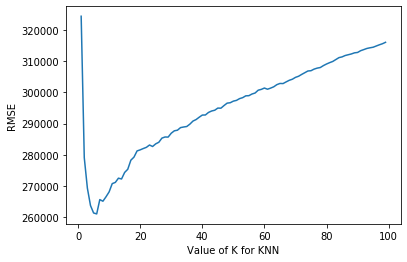

In [21]:
k_range=range(1,100)
k_scores=[]

for k in k_range:
    knn_regression_model=KNeighborsRegressor(n_neighbors=k)
    knn_regression_model.fit(train_X,train_Y)
    knn_predict=knn_regression_model.predict(test_X)
    score=(sqrt(mean_squared_error(knn_predict, test_Y)))# RMSE
    k_scores.append(score)
best_neighbor_count=np.argmin(k_scores)+1
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE')
plt.show()

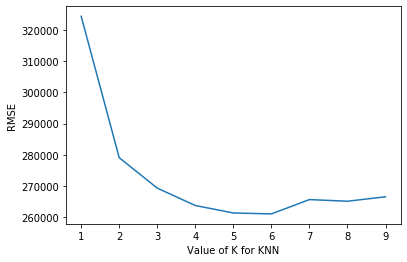

In [45]:
k_range=range(1,10)
k_scores=[]

for k in k_range:
    knn_regression_model=KNeighborsRegressor(n_neighbors=k)
    knn_regression_model.fit(train_X,train_Y)
    knn_predict=knn_regression_model.predict(test_X)
    score=(sqrt(mean_squared_error(knn_predict, test_Y)))# RMSE
    k_scores.append(score)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE')
plt.show()

In [46]:
best_neighbor_count

8

In [47]:
start=time.time()
knn_regression_model=KNeighborsRegressor(n_neighbors=best_neighbor_count)
knn_regression_model.fit(train_X,train_Y)
knn_predict=knn_regression_model.predict(test_X)
knn_rmse=sqrt(mean_squared_error(knn_predict, test_Y)) # RMSE
knn_time=time.time() - start # 코드 실행 시간 계산

In [48]:
print(knn_rmse,knn_time)

265131.5098276391 0.041889190673828125


In [49]:
knn_regression_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

## Decision Tree Regressor

In [50]:
start=time.time()
DT_Regression_Model=DecisionTreeRegressor(random_state=0)
DT_Regression_Model=DT_Regression_Model.fit(train_X,train_Y)
DT_Predict=DT_Regression_Model.predict(test_X)
print("RMSE: {}".format(sqrt(mean_squared_error(DT_Predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 312195.32780500065
Time: 0.02 seconds


1 316661.0883745641
2 294805.27935331373
3 280021.2134505351
4 260004.53589470786
5 253364.8528658477
6 259309.57345704327
7 263779.41630089073
8 265897.7106918041
9 267536.67182743025
10 269156.0050123457
11 282907.76094113046
12 289114.06420801213
13 294954.24170428223
14 296971.746987287
15 301173.0184589457
16 300906.85762988444
17 300235.82132097357
18 305468.82805200445
19 304244.4878123535
20 311997.339599308
21 307868.490459402
22 305301.4604989064
23 312285.58052393707
24 311137.2407484123
25 310948.09912950674
26 311346.50120691786
27 312207.0200678522
28 312209.4352468027
29 312195.32780500065
30 312195.32780500065
31 312195.32780500065
32 312195.32780500065
33 312195.32780500065
34 312195.32780500065
35 312195.32780500065
36 312195.32780500065
37 312195.32780500065
38 312195.32780500065
39 312195.32780500065
40 312195.32780500065
41 312195.32780500065
42 312195.32780500065
43 312195.32780500065
44 312195.32780500065
45 312195.32780500065
46 312195.32780500065
47 312195.3278

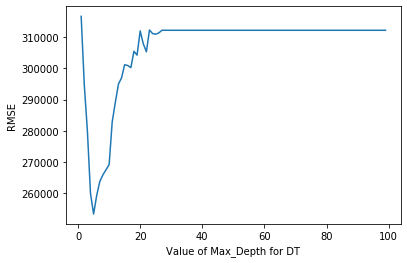

In [52]:
depth_range=range(1,100)
rmse_scores=[]

for depth in depth_range:
    DT_Regression_Model=DecisionTreeRegressor(random_state=0,max_depth=depth)
    DT_Regression_Model=DT_Regression_Model.fit(train_X,train_Y)
    DT_Predict=DT_Regression_Model.predict(test_X)
    score=(sqrt(mean_squared_error(DT_Predict, test_Y)))# RMSE
    print(depth,score)
    rmse_scores.append(score)
    
best_max_depth=np.argmin(rmse_scores)+1
plt.plot(depth_range, rmse_scores)
plt.xlabel('Value of Max_Depth for DT')
plt.ylabel('RMSE')
plt.show()

In [53]:
print(best_max_depth)

5


In [55]:
start=time.time()
DT_Regression_Model=DecisionTreeRegressor(random_state=0,max_depth=best_max_depth)
DT_Regression_Model=DT_Regression_Model.fit(train_X,train_Y)
DT_Predict=DT_Regression_Model.predict(test_X)
dt_rmse=sqrt(mean_squared_error(DT_Predict, test_Y)) # RMSE
dt_time=time.time() - start # 코드 실행 시간 계산

In [56]:
print(dt_rmse,dt_time)

253364.8528658477 0.008975505828857422


## NN(Neural Network) Regressor

In [57]:
start=time.time()
NN_regression_model=MLPRegressor(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(7,8),random_state=0)
NN_regression_model=NN_regression_model.fit(train_X,train_Y)
NN_predict=NN_regression_model.predict(test_X)
print("RMSE: {}".format(sqrt(mean_squared_error(NN_predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 255032.8878679363
Time: 0.34 seconds


In [60]:
hidden_nodes=range(1,11)
hidden_layers=range(1,11)
solvers=['lbfgs','sgd','adam']
best_nn_parameter={
    'solver':'lbfgs',
    'hidden_layer':(1,1),
    'min_rmse':float('inf')
}
for solver in solvers:
    rmse_scores=list()
    layer_products=list(product(hidden_layers,hidden_nodes))
    for layer in layer_products:
        NN_regression_model=MLPRegressor(solver=solver,alpha=1e-5,hidden_layer_sizes=layer,random_state=0)
        NN_regression_model=NN_regression_model.fit(train_X,train_Y)
        NN_predict=NN_regression_model.predict(test_X)
        score=sqrt(mean_squared_error(NN_predict, test_Y)) # RMSE
        rmse_scores.append(score)
    best_hidden_layer=layer_products[np.argmin(rmse_scores)]
    print(solver,best_hidden_layer,np.min(rmse_scores))
    if np.min(rmse_scores) < best_nn_parameter['min_rmse']:
        best_nn_parameter['solver']=solver
        best_nn_parameter['hidden_layer']=best_hidden_layer
        best_nn_parameter['min_rmse']=np.min(rmse_scores)

lbfgs (10, 3) 240652.4362875411
sgd (7, 1) 379538.2518344437


C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

adam (9, 10) 377328.9871948546


C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [61]:
best_nn_parameter

{'solver': 'lbfgs', 'hidden_layer': (10, 3), 'min_rmse': 240652.4362875411}

In [62]:
start=time.time()
NN_regression_model=MLPRegressor(solver=best_nn_parameter['solver'],alpha=1e-5,hidden_layer_sizes=best_nn_parameter['hidden_layer'],random_state=0)
NN_regression_model=NN_regression_model.fit(train_X,train_Y)
NN_predict=NN_regression_model.predict(test_X)
nn_rmse=sqrt(mean_squared_error(NN_predict, test_Y)) # RMSE
nn_time=time.time() - start # 코드 실행 시간 계산

In [63]:
print(nn_rmse,nn_time)

240652.4362875411 0.4079101085662842


## Bagging Ensemble Regressor

In [64]:
# iteration method
# train_X 에 있는 데이터에 대해서 해당 크기 만큼 복원 추출을 진행한다.
data_indexes=[index for index in range(train_X.shape[0])]
bagging_predicts=list()
start=time.time()
for _ in range(30):
    random_data_indexes=np.random.choice(data_indexes,size=train_X.shape[0])
    data_X=train_X.iloc[random_data_indexes]
    data_Y=train_Y.iloc[random_data_indexes]
    
    
    Linear_Regression_model=LinearRegression()
    Linear_Regression_model=Linear_Regression_model.fit(data_X,data_Y)
    bagging_predicts.append(Linear_Regression_model.predict(test_X))
    
LR_predict=[]
for bagging_index in range(test_X.shape[0]):
    temp_result=list()
    for test_index in range(len(bagging_predicts)):
        temp_result.append(bagging_predicts[test_index][bagging_index])
    LR_predict.append(np.mean(temp_result))
    
print("RMSE: {}".format(sqrt(mean_squared_error(LR_predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

      

RMSE: 255410.17519630797
Time: 0.27 seconds


In [65]:
start=time.time()
LR_Bagging_model = BaggingRegressor(base_estimator = LinearRegression(), # 선형회귀모형
                                 n_estimators = 30, 
                                 verbose = 1,
                                 random_state=0) # 학습 과정 표시
LR_Bagging_model = LR_Bagging_model.fit(train_X, train_Y) # 학습 진행
LR_Bagging_predict = LR_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(LR_Bagging_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 255030.74656887277
Time: 0.10 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [66]:
start=time.time()
DT_Bagging_model = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth=7), # 선형회귀모형
                                 n_estimators = 240, 
                                 verbose = 1,
                                random_state=0) # 학습 과정 표시
DT_Bagging_model = DT_Bagging_model.fit(train_X, train_Y) # 학습 진행
DT_Bagging_predict = DT_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(DT_Bagging_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 231467.2578076837
Time: 1.29 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


10 232060.2679072538
20 231410.1991493495


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


30 230794.88324423807


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


40 231591.53565830275


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


50 232203.64602047365


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


60 232207.72080994013


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


70 232455.36708945894


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


80 232346.3137851708


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


90 232385.24578485085


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


100 232928.9863485555


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


110 232608.04461919825


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


120 232443.8779726015


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


130 232465.35638180064


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


140 232228.93567583544


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


150 232234.38414827996


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


160 232134.06935836183


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


170 232141.1691373648


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


180 231876.48974997914


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


190 231820.5129951536


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


200 231698.44143196708


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


210 231652.8209004529


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


220 231610.5861640429


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


230 231360.7245877079


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


240 231467.2578076837


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


250 231473.4847715094


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


260 231613.12336090568


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


270 231886.2391461986


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


280 231819.77849090644


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


290 231712.25503518843


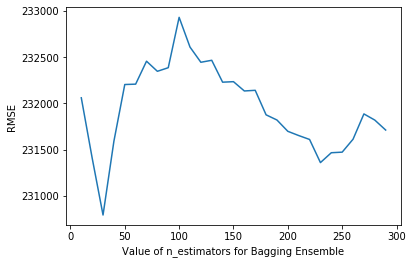

In [68]:
sample_ranges=range(10,300,10)
rmse_scores=[]

for sample_size in sample_ranges:
    DT_Bagging_model = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth=7), # 선형회귀모형
                                 n_estimators = sample_size, 
                                 verbose = 1,
                                random_state=0) # 학습 과정 표시
    DT_Bagging_model = DT_Bagging_model.fit(train_X, train_Y) # 학습 진행
    DT_Bagging_predict = DT_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측 
    score=sqrt(mean_squared_error(DT_Bagging_predict, test_Y)) # RMSE 결과
    print(sample_size,score)
    rmse_scores.append(score)
    
best_max_sample=np.argmin(rmse_scores)*10+10
plt.plot(sample_ranges, rmse_scores)
plt.xlabel('Value of n_estimators for Bagging Ensemble')
plt.ylabel('RMSE')
plt.show()

In [69]:
best_max_sample

30

In [70]:
start=time.time()
DT_Bagging_model = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth=best_max_depth), # 선형회귀모형
                                 n_estimators = best_max_sample, 
                                 verbose = 1,
                                random_state=0) # 학습 과정 표시
DT_Bagging_model = DT_Bagging_model.fit(train_X, train_Y) # 학습 진행
DT_Bagging_predict = DT_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
bag_rmse=sqrt(mean_squared_error(DT_Bagging_predict, test_Y)) # RMSE
bag_time=time.time() - start # 코드 실행 시간 계산

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [71]:
print(bag_rmse,bag_time)

236896.85710079878 0.1525895595550537


## Random Forest Tree Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
start=time.time()
RF_Regression_model = RandomForestRegressor(n_estimators = 30, 
                                             max_depth = 5, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(RF_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 237153.2923963983
Time: 0.13 seconds


1 305205.3538937769
2 283939.93761000165
3 259919.15567984426
4 244472.755723161
5 239114.88681042474
6 235397.65209269422
7 233478.1837414122
8 231344.29354171318
9 230785.1711395264
10 237398.7005948154
11 236900.36984528555
12 239106.947481127
13 242643.05086106196
14 243278.2326813094
15 245315.04689499686
16 243668.4906961531
17 247446.8650615381
18 245021.3992993787
19 244589.03980998317
20 247270.71360467217
21 246714.56081697883
22 249890.8554705674
23 248369.12995674834
24 249851.4731250275
25 249141.02122789016
26 248184.2376719159
27 248860.30487060337
28 247919.2793816259
29 248395.65231465918
30 247958.1430657346
31 248908.57029318172
32 248908.19333481803
33 248924.2399395496
34 248924.2399395496
35 248924.2399395496
36 248924.2399395496
37 248924.2399395496
38 248924.2399395496
39 248924.2399395496
40 248924.2399395496
41 248924.2399395496
42 248924.2399395496
43 248924.2399395496
44 248924.2399395496
45 248924.2399395496
46 248924.2399395496
47 248924.2399395496
48 2489

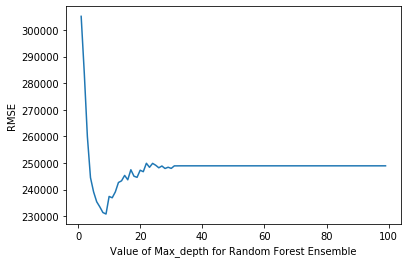

In [74]:
depth_ranges=range(1,100)
rmse_scores=[]

for depth in depth_ranges:
    RF_Regression_model = RandomForestRegressor(n_estimators = 10, 
                                             max_depth = depth, 
                                             random_state = 0) # 시드값 고정
    RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
    RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 
    score=sqrt(mean_squared_error(RF_predict, test_Y)) # RMSE 결과
    print(depth,score)
    rmse_scores.append(score)
    
best_max_depth_RF=np.argmin(rmse_scores)+1
plt.plot(depth_ranges, rmse_scores)
plt.xlabel('Value of Max_depth for Random Forest Ensemble')
plt.ylabel('RMSE')
plt.show()

In [75]:
best_max_depth_RF

9

10 230785.1711395264
20 231638.11576336998
30 230417.3773043089
40 230894.01691066593
50 231748.34056354593
60 231419.71667736417
70 231204.98307686363
80 231023.72523948635
90 230710.9753809601
100 231651.12712145454
110 231180.42925511306
120 230917.99878140466
130 230949.6155918987
140 230547.8446204981
150 230888.02514986493
160 230687.1454367141
170 230947.26502506173
180 230725.32538294516
190 230905.66732492315
200 230712.90447502275
210 230588.75791820587
220 230503.14211792345
230 230287.89419731687
240 230197.50985333993
250 230140.22909621889
260 230322.05059340884
270 230586.09760959414
280 230629.82451807152
290 230704.54855583067


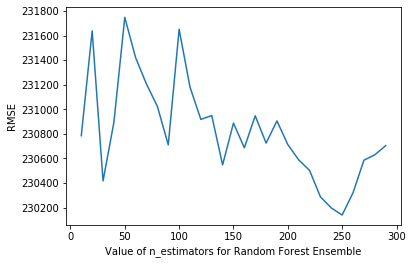

In [76]:
sample_ranges=range(10,300,10)
rmse_scores=[]

for sample_size in sample_ranges:
    RF_Regression_model = RandomForestRegressor(n_estimators = sample_size, 
                                             max_depth = best_max_depth_RF, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
    RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
    RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 
    score=sqrt(mean_squared_error(RF_predict, test_Y)) # RMSE 결과
    print(sample_size,score)
    rmse_scores.append(score)
    
best_max_sample=np.argmin(rmse_scores)*10+10
plt.plot(sample_ranges, rmse_scores)
plt.xlabel('Value of n_estimators for Random Forest Ensemble')
plt.ylabel('RMSE')
plt.show()

In [77]:
best_max_sample

250

In [78]:
start=time.time()
RF_Regression_model = RandomForestRegressor(n_estimators = best_max_sample, 
                                             max_depth = best_max_depth_RF, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
rf_rmse=sqrt(mean_squared_error(RF_predict, test_Y)) # RMSE
rf_time=time.time() - start # 코드 실행 시간 계산

In [79]:
print(rf_rmse,rf_time)

230140.22909621889 1.5368916988372803


## ADA Boost Regressor

In [80]:
start=time.time()
Ada_Regression_model = AdaBoostRegressor(base_estimator= LinearRegression(),
                                         n_estimators = 30, # 20번 추정
                                             random_state = 0,
                                        loss='linear') # 시드값 고정
Ada_Regression_model = Ada_Regression_model.fit(train_X, train_Y) # 학습 진행
Ada_predict = Ada_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(Ada_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 402137.32201436925
Time: 0.06 seconds


10 318779.97337066353
20 402137.32201436925
30 402137.32201436925
40 402137.32201436925
50 402137.32201436925
60 402137.32201436925
70 402137.32201436925
80 402137.32201436925
90 402137.32201436925
100 402137.32201436925
110 402137.32201436925
120 402137.32201436925
130 402137.32201436925
140 402137.32201436925
150 402137.32201436925
160 402137.32201436925
170 402137.32201436925
180 402137.32201436925
190 402137.32201436925
200 402137.32201436925
210 402137.32201436925
220 402137.32201436925
230 402137.32201436925
240 402137.32201436925
250 402137.32201436925
260 402137.32201436925
270 402137.32201436925
280 402137.32201436925
290 402137.32201436925


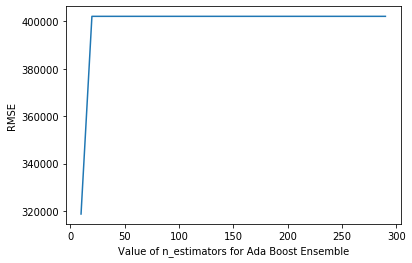

In [82]:
sample_ranges=range(10,300,10)
rmse_scores=[]

for sample_size in sample_ranges:
    Ada_Regression_model = AdaBoostRegressor(base_estimator= LinearRegression(),
                                         n_estimators = sample_size, 
                                             random_state = 0) # 시드값 고정
    Ada_Regression_model = Ada_Regression_model.fit(train_X, train_Y) # 학습 진행
    Ada_predict = Ada_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
    score=sqrt(mean_squared_error(Ada_predict, test_Y)) # RMSE 결과
    print(sample_size,score)
    rmse_scores.append(score)
    
best_max_sample_ada=np.argmin(rmse_scores)*10+10
plt.plot(sample_ranges, rmse_scores)
plt.xlabel('Value of n_estimators for Ada Boost Ensemble')
plt.ylabel('RMSE')
plt.show()

In [84]:
best_max_sample_ada

10

10 236398.93181006418
20 239550.37756749883
30 243660.79131432154
40 250814.982990493
50 259093.64908036194
60 261885.38289815548
70 266635.52280647604
80 266157.8359821232
90 276378.07187996793
100 275876.1406327037
110 283917.5251502896
120 281421.3939398547
130 287833.3069546963
140 292608.6160662943
150 300037.4310474319
160 299532.32407560985
170 300783.3655522523
180 309616.4908359
190 304951.68328724045
200 309670.88907818997
210 314401.10390610946
220 312460.46273226314
230 319181.16436368437
240 319157.2744412604
250 318700.8207937265
260 318024.426969265
270 320275.08700169186
280 320543.8967084174
290 323491.4558891806


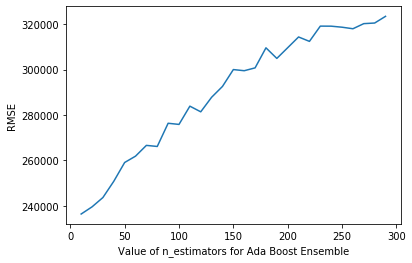

In [85]:
sample_ranges=range(10,300,10)
rmse_scores=[]

for sample_size in sample_ranges:
    Ada_Regression_model = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(random_state=0,max_depth=best_max_depth),
                                         n_estimators = sample_size, 
                                             random_state = 0) # 시드값 고정
    Ada_Regression_model = Ada_Regression_model.fit(train_X, train_Y) # 학습 진행
    Ada_predict = Ada_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
    score=sqrt(mean_squared_error(Ada_predict, test_Y)) # RMSE 결과
    print(sample_size,score)
    rmse_scores.append(score)
    
best_max_sample_ada=np.argmin(rmse_scores)*10+10
plt.plot(sample_ranges, rmse_scores)
plt.xlabel('Value of n_estimators for Ada Boost Ensemble')
plt.ylabel('RMSE')
plt.show()

In [95]:
start=time.time()
Ada_Regression_model = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(random_state=0,max_depth=best_max_depth),
                                         n_estimators = best_max_sample_ada, 
                                             random_state = 0,
                                        loss='linear') # 시드값 고정
Ada_Regression_model = Ada_Regression_model.fit(train_X, train_Y) # 학습 진행
Ada_predict = Ada_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
ada_rmse=sqrt(mean_squared_error(Ada_predict, test_Y)) # RMSE
ada_time=time.time() - start # 코드 실행 시간 계산

In [96]:
print(ada_rmse,ada_time)

236398.93181006418 0.10671544075012207


In [94]:
start=time.time()
Ada_Regression_model = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(random_state=0,max_depth=100),
                                         n_estimators = 500, 
                                             random_state = 0,
                                         learning_rate=0.001,
                                        loss='linear') # 시드값 고정
Ada_Regression_model = Ada_Regression_model.fit(train_X, train_Y) # 학습 진행
Ada_predict = Ada_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
ada_rmse=sqrt(mean_squared_error(Ada_predict, test_Y)) # RMSE
ada_time=time.time() - start # 코드 실행 시간 계산
print(ada_rmse,ada_time)

266278.07499253144 8.828397512435913


## Xgb Boost Regressor

In [101]:
#machine model의 optimzied hyper parameter을 찾기 위한 함수
def optimize_model(model, params, cv):
    model=GridSearchCV(model,params,n_jobs=5,cv=cv)
    model=model.fit(train_X,train_Y)
    
    print(model.best_params_)
    
    return model


In [97]:
start=time.time()
xgb_dtrain=xgb.DMatrix(data=train_X,label=train_Y)
xgb_dtest=xgb.DMatrix(data=test_X)
xgb_param = {'max_depth': 100, # 트리 깊이
         'learning_rate': 0.01, # Step Size
         'n_estimators': 500, # Number of trees, 트리 생성 개수
         'objective': 'reg:linear', # 목적 함수
            }
xgb_model = xgb.train(params = xgb_param, dtrain = xgb_dtrain) # 학습 진행
xgb_model_predict = xgb_model.predict(xgb_dtest) # 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(xgb_model_predict,test_Y))))
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

[23:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


RMSE: 611791.3546989748
Time: 0.06 seconds


In [98]:
xgb_param = {'max_depth': [1,5,10,20,30,40,50,60,70,80,90,100], # 트리 깊이
         'n_estimators': np.arange(100,1100,100), # Number of trees, 트리 생성 개수
            }
xgb_model=xgb.XGBRegressor(learning_rate=0.01,objective='reg:linear',eval_metric='rmse')
clf=GridSearchCV(xgb_model,xgb_param,n_jobs=5,cv=10,
                verbose=True)

In [ ]:
print(clf.best_params_)
print(clf.best_score_)
xgb_model_predict = clf.predict(test_X) # 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(xgb_model_predict,test_Y))))

In [ ]:
xgb_model=xgb.XGBRegressor(learning_rate=0.01,objective='reg:linear')
xgb_param = {'max_depth': [1,5,10,20,30,40,50,60,70,80,90,100], # 트리 깊이
             # Step Size
            'n_estimators': np.arange(100,1000,100), # Number of trees, 트리 생성 개수
            } # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.

cv=StratifiedKFold(n_splits=10,shuffle=False,random_state=0)

xgb_model=optimize_model(xgb_model,xgb_param,cv)

In [ ]:
start=time.time()
xgb_model=xgb.XGBRegressor(n_estimators=xgb_model.best_params_['n_estimators'],max_depth=xgb_model.best_params_['max_depth'],learning_rate=0.01,objective='reg:linear',eval_metric='rmse')
xgb_predict=xgb_model.predict(test_X)
xgb_rmse=sqrt(mean_squared_error(xgb_predict, test_Y)) # RMSE
xgb_time=time.time() - start # 코드 실행 시간 계산

In [107]:
start=time.time()
xgb_model=xgb.XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.01,objective='reg:linear',eval_metric='rmse')
xgb_model=xgb_model.fit(train_X,train_Y)
xgb_predict=xgb_model.predict(test_X)
xgb_rmse=sqrt(mean_squared_error(xgb_predict, test_Y)) # RMSE
xgb_time=time.time() - start # 코드 실행 시간 계산

[23:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [108]:
print(xgb_rmse,xgb_time)

232719.03104498048 2.6578943729400635


## LightGbm Regressor

In [110]:
# !pip install lightgbm
import lightgbm as lgb
start = time.time() # 시작 시간 지정
lgb_dtrain = lgb.Dataset(data = train_X, label = train_Y) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 500, # Number of trees, 트리 생성 개수
            'objective': 'regression'} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_predict= lgb_model.predict(test_X)
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_predict,test_Y))))
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

C:\Users\jhyun\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSE: 224874.86828884046
Time: 1.37 seconds


In [111]:
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'objective': 'regression'} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_cv_results=lgb.cv(lgb_param,lgb_dtrain,nfold=10,num_boost_round=50,early_stopping_rounds=10,metrics='rmse',seed=0)

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [117]:
print(np.min(lgb_cv_results['rmse-mean']))

314511.19208973995


In [ ]:
lgb_model=lgb.LGBMRegressor(learning_rate=0.01,objective='regression')
lgb_param = {'max_depth': [1,5,10,20,30,40,50,60,70,80,90,100], # 트리 깊이
             # Step Size
            'n_estimators': np.arange(100,1000,100), # Number of trees, 트리 생성 개수
            } # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.

cv=StratifiedKFold(n_splits=10,shuffle=False,random_state=0)

lgb_model=optimize_model(lgb_model,lgb_param,cv)

In [99]:
start=time.time()
lgb_model=lgb.LGBMRegressor(n_estimators=lgb_model.best_params_['n_estimators'],max_depth=lgb_model.best_params_['max_depth'],learning_rate=0.01,random_state=0)
lgb_model=lgb_model.fit(train_X,train_Y)
lgb_model_predict = lgb_model.predict(test_X)
lgb_rmse=sqrt(mean_squared_error(lgb_model_predict, test_Y)) # RMSE
lgb_time=time.time() - start # 코드 실행 시간 계산

RMSE: 210904.17249451784
Time: 0.84 seconds


In [123]:
start=time.time()
lgb_model=lgb.LGBMRegressor(n_estimators=500,max_depth=10,learning_rate=0.01,random_state=0)
lgb_model=lgb_model.fit(train_X,train_Y)
lgb_model_predict = lgb_model.predict(test_X)
lgb_rmse=sqrt(mean_squared_error(lgb_model_predict, test_Y)) # RMSE
lgb_time=time.time() - start # 코드 실행 시간 계산

In [124]:
print(lgb_rmse,lgb_time)

224874.86828884046 1.0471994876861572


## Catboost Regressor

In [ ]:
start = time.time() # 시작 시간 지정
cb_dtrain = cb.Pool(data = train_X, label = train_Y) # 학습 데이터를 Catboost 모델에 맞게 변환
cb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 100, # Number of trees, 트리 생성 개수
            'eval_metric': 'Accuracy', # 평가 척도
            'loss_function': 'Regression'} # 손실 함수, 목적 함수
cb_model = cb.train(pool = cb_dtrain, params = cb_param) # 학습 진행
cb_model_predict = np.argmax(cb_model.predict(test_x), axis = 1) + 1 # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1
print("Accuracy: %.2f" % (accuracy_score(test_y, cb_model_predict) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

In [127]:
start=time.time()
cb_model=cat.CatBoostRegressor(n_estimators=500,max_depth=16,learning_rate=0.01,random_state=0,verbose=True)
cb_model=cb_model.fit(train_X,train_Y)
cb_model_predict = cb_model.predict(test_X)

cat_rmse=sqrt(mean_squared_error(cb_model_predict, test_Y)) # RMSE
cat_time=time.time() - start # 코드 실행 시간 계산

0:	learn: 408540.3491313	total: 514ms	remaining: 4m 16s
1:	learn: 406629.5595035	total: 575ms	remaining: 2m 23s
2:	learn: 404692.3783550	total: 607ms	remaining: 1m 40s
3:	learn: 402830.2382350	total: 611ms	remaining: 1m 15s
4:	learn: 400907.7736717	total: 614ms	remaining: 1m
5:	learn: 398851.9978782	total: 629ms	remaining: 51.8s
6:	learn: 396935.2870192	total: 693ms	remaining: 48.8s
7:	learn: 395034.5632512	total: 711ms	remaining: 43.7s
8:	learn: 393376.5567512	total: 772ms	remaining: 42.1s
9:	learn: 391702.8568340	total: 1.28s	remaining: 1m 2s
10:	learn: 390011.5273336	total: 1.28s	remaining: 56.9s
11:	learn: 388332.6670238	total: 1.41s	remaining: 57.2s
12:	learn: 386597.4780853	total: 1.65s	remaining: 1m 1s
13:	learn: 384822.3471178	total: 1.72s	remaining: 59.6s
14:	learn: 383203.5047538	total: 1.72s	remaining: 55.6s
15:	learn: 381445.9343578	total: 1.72s	remaining: 52.1s
16:	learn: 379843.0674806	total: 1.78s	remaining: 50.7s
17:	learn: 378042.3533926	total: 1.79s	remaining: 47.9s
1

148:	learn: 254706.9206750	total: 20.4s	remaining: 48s
149:	learn: 254133.3300479	total: 20.9s	remaining: 48.8s
150:	learn: 253709.2387875	total: 20.9s	remaining: 48.3s
151:	learn: 253176.8109603	total: 21.4s	remaining: 49s
152:	learn: 252723.8654441	total: 21.4s	remaining: 48.5s
153:	learn: 252166.8609341	total: 21.9s	remaining: 49.2s
154:	learn: 251721.2144898	total: 21.9s	remaining: 48.7s
155:	learn: 251202.5700938	total: 21.9s	remaining: 48.3s
156:	learn: 250666.5365581	total: 22.4s	remaining: 49s
157:	learn: 250210.1040808	total: 22.4s	remaining: 48.6s
158:	learn: 249778.3233596	total: 22.4s	remaining: 48.1s
159:	learn: 249275.5789559	total: 22.5s	remaining: 47.7s
160:	learn: 248917.9439871	total: 22.5s	remaining: 47.3s
161:	learn: 248459.3930543	total: 22.6s	remaining: 47.1s
162:	learn: 247968.9856419	total: 22.8s	remaining: 47.2s
163:	learn: 247497.9353538	total: 23.3s	remaining: 47.8s
164:	learn: 247019.0915617	total: 23.9s	remaining: 48.5s
165:	learn: 246572.6233072	total: 23.

293:	learn: 213357.0201899	total: 41.4s	remaining: 29s
294:	learn: 213270.5856110	total: 41.4s	remaining: 28.8s
295:	learn: 213218.5746962	total: 41.4s	remaining: 28.6s
296:	learn: 213165.3393838	total: 41.4s	remaining: 28.3s
297:	learn: 212912.1904103	total: 42s	remaining: 28.5s
298:	learn: 212732.5774334	total: 42s	remaining: 28.2s
299:	learn: 212483.2246038	total: 42.5s	remaining: 28.4s
300:	learn: 212248.6234529	total: 43.1s	remaining: 28.5s
301:	learn: 212133.3381293	total: 43.1s	remaining: 28.2s
302:	learn: 212063.8200956	total: 43.1s	remaining: 28s
303:	learn: 211824.0567175	total: 43.6s	remaining: 28.1s
304:	learn: 211709.9985528	total: 43.6s	remaining: 27.9s
305:	learn: 211550.4774124	total: 43.6s	remaining: 27.7s
306:	learn: 211422.7039149	total: 43.6s	remaining: 27.4s
307:	learn: 211320.1983132	total: 43.6s	remaining: 27.2s
308:	learn: 211020.4332487	total: 44.2s	remaining: 27.3s
309:	learn: 210751.9751259	total: 44.8s	remaining: 27.4s
310:	learn: 210600.8683998	total: 44.8s

442:	learn: 194678.6535879	total: 1m 2s	remaining: 8.03s
443:	learn: 194497.9370140	total: 1m 2s	remaining: 7.93s
444:	learn: 194296.8708828	total: 1m 3s	remaining: 7.84s
445:	learn: 194069.5363166	total: 1m 3s	remaining: 7.74s
446:	learn: 193951.7216866	total: 1m 3s	remaining: 7.58s
447:	learn: 193836.5052857	total: 1m 3s	remaining: 7.43s
448:	learn: 193811.3518994	total: 1m 3s	remaining: 7.27s
449:	learn: 193685.4534991	total: 1m 4s	remaining: 7.12s
450:	learn: 193660.9029509	total: 1m 4s	remaining: 6.96s
451:	learn: 193504.4173425	total: 1m 4s	remaining: 6.81s
452:	learn: 193333.8726185	total: 1m 4s	remaining: 6.71s
453:	learn: 193219.4247023	total: 1m 4s	remaining: 6.55s
454:	learn: 193147.8815002	total: 1m 4s	remaining: 6.4s
455:	learn: 192964.5835881	total: 1m 4s	remaining: 6.27s
456:	learn: 192890.8586279	total: 1m 4s	remaining: 6.11s
457:	learn: 192812.1965797	total: 1m 4s	remaining: 5.96s
458:	learn: 192674.8531461	total: 1m 5s	remaining: 5.85s
459:	learn: 192646.6815002	total

In [128]:
print(cat_rmse,cat_time)

236443.74546613937 71.9217050075531


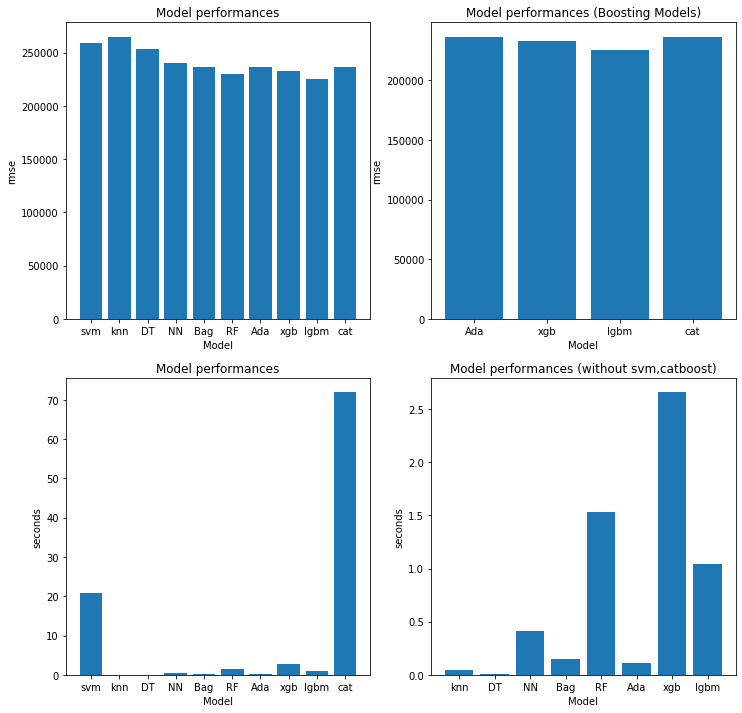

In [132]:
rmse_scores=[
    svm_rmse,
    knn_rmse,
    dt_rmse,
    nn_rmse,
    bag_rmse,
    rf_rmse,
    ada_rmse,
    xgb_rmse,
    lgb_rmse,
    cat_rmse
]
times=[
    svm_time,
    knn_time,
    dt_time,
    nn_time,
    bag_time,
    rf_time,
    ada_time,
    xgb_time,
    lgb_time,
    cat_time
]
labels=['svm',
       'knn',
       'DT',
       'NN',
       'Bag',
       'RF',
       'Ada',
       'xgb',
       'lgbm',
       'cat']

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.bar(labels,rmse_scores)
plt.title('Model performances')
plt.xlabel('Model')
plt.ylabel('rmse')

plt.subplot(222)
plt.bar(labels[6:],rmse_scores[6:])
plt.title('Model performances (Boosting Models)')
plt.xlabel('Model')
plt.ylabel('rmse')

plt.subplot(223)
plt.bar(labels,times)
plt.title('Model performances')
plt.xlabel('Model')
plt.ylabel('seconds')

plt.subplot(224)
plt.bar(labels[1:-1],times[1:-1])
plt.title('Model performances (without svm,catboost)')
plt.xlabel('Model')
plt.ylabel('seconds')

plt.savefig('Comparing Model Performances(Regressions).png')

plt.show()

## Ensemble of Ensemble

In [133]:
#제일 기본적인 ensemble model만 생성/ 비교를 위해서
DT_Bagging_model=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                  random_state=0)
RF_Regression_model=RandomForestRegressor(random_state=0)
Ada_Regression_model=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                      loss='linear',
                                      random_state=0)
xgb_model=xgb.XGBRegressor()
lgb_model=lgb.LGBMRegressor()
cat_model=cat.CatBoostRegressor()

def bagging_ensemble(model):
    start=time.time()
    bagging_model=BaggingRegressor(base_estimator = model, # 회귀모형
                                     n_estimators = 100, # 100번 샘플링
                                    random_state=0) # 학습 과정 표시
    baggin_model=bagging_model.fit(train_X,train_Y)
    bagging_predict=baggin_model.predict(test_X)
    return time.time()-start, sqrt(mean_squared_error(bagging_predict,test_Y))

def ada_ensemble(model):
    start=time.time()
    ada_boosting_model=AdaBoostRegressor(base_estimator=model,
                                      n_estimators=100,
                                      loss='linear',
                                      random_state=0)
    ada_boosting_model=ada_boosting_model.fit(train_X,train_Y)
    ada_predict=ada_boosting_model.predict(test_X)
    return time.time()-start, sqrt(mean_squared_error(ada_predict,test_Y))

models=[DT_Bagging_model, 
        RF_Regression_model, 
        Ada_Regression_model, 
        xgb_model, 
        lgb_model,
        cb_model
]

ensemble_methods=[bagging_ensemble,ada_ensemble]


ensemble_ensemble_performances=list()
for method in ensemble_methods:
    model_performances={
    'times':list(),
    'rmse_scores':list()
    }
    for model in models:
        print(model)
        model_performance=method(model)
        model_performances['times'].append(model_performance[0])
        model_performances['rmse_scores'].append(model_performance[1])

    ensemble_ensemble_performances.append(model_performances)



BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_sample

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  rando

110:	learn: 275264.1999240	total: 12.8s	remaining: 44.9s
111:	learn: 274443.9354181	total: 13.2s	remaining: 45.7s
112:	learn: 273706.9325716	total: 13.2s	remaining: 45.2s
113:	learn: 272914.2517395	total: 13.6s	remaining: 45.9s
114:	learn: 272168.5692473	total: 13.9s	remaining: 46.7s
115:	learn: 271390.1194962	total: 14.3s	remaining: 47.3s
116:	learn: 270704.6456880	total: 14.3s	remaining: 46.8s
117:	learn: 269904.6252628	total: 14.3s	remaining: 46.3s
118:	learn: 269144.2419548	total: 14.7s	remaining: 47s
119:	learn: 268458.4735986	total: 14.7s	remaining: 46.5s
120:	learn: 267671.6365579	total: 15s	remaining: 47.1s
121:	learn: 266835.6016423	total: 15.4s	remaining: 47.7s
122:	learn: 266081.5214445	total: 15.7s	remaining: 48.3s
123:	learn: 265386.7569979	total: 16.1s	remaining: 48.8s
124:	learn: 264801.6881891	total: 16.1s	remaining: 48.3s
125:	learn: 264050.4243566	total: 16.4s	remaining: 48.8s
126:	learn: 263309.5708204	total: 16.8s	remaining: 49.4s
127:	learn: 262707.2855235	total: 1

259:	learn: 206488.4673682	total: 34.1s	remaining: 31.5s
260:	learn: 206317.9715698	total: 34.1s	remaining: 31.2s
261:	learn: 206023.8626572	total: 34.5s	remaining: 31.3s
262:	learn: 205736.8267495	total: 34.5s	remaining: 31.1s
263:	learn: 205522.1006148	total: 34.5s	remaining: 30.9s
264:	learn: 205232.9281436	total: 34.5s	remaining: 30.6s
265:	learn: 204892.7467053	total: 34.9s	remaining: 30.7s
266:	learn: 204636.4199088	total: 34.9s	remaining: 30.5s
267:	learn: 204369.9765406	total: 34.9s	remaining: 30.2s
268:	learn: 204126.1707640	total: 34.9s	remaining: 30s
269:	learn: 203750.6594088	total: 35.3s	remaining: 30.1s
270:	learn: 203510.5100634	total: 35.3s	remaining: 29.8s
271:	learn: 203181.8261054	total: 35.7s	remaining: 29.9s
272:	learn: 203008.3115370	total: 35.7s	remaining: 29.7s
273:	learn: 202677.4183665	total: 36s	remaining: 29.7s
274:	learn: 202255.9793488	total: 36.4s	remaining: 29.8s
275:	learn: 202000.2003206	total: 36.8s	remaining: 29.9s
276:	learn: 201641.8096572	total: 3

408:	learn: 178754.1326139	total: 56.6s	remaining: 12.6s
409:	learn: 178675.3889353	total: 56.6s	remaining: 12.4s
410:	learn: 178563.0465796	total: 56.9s	remaining: 12.3s
411:	learn: 178440.7543734	total: 56.9s	remaining: 12.2s
412:	learn: 178301.2656799	total: 57.3s	remaining: 12.1s
413:	learn: 178248.1040051	total: 57.3s	remaining: 11.9s
414:	learn: 178184.6600892	total: 57.3s	remaining: 11.7s
415:	learn: 178014.1036961	total: 57.7s	remaining: 11.6s
416:	learn: 177835.2911037	total: 58s	remaining: 11.6s
417:	learn: 177648.8244241	total: 58.4s	remaining: 11.5s
418:	learn: 177512.7602209	total: 58.4s	remaining: 11.3s
419:	learn: 177429.0481052	total: 58.4s	remaining: 11.1s
420:	learn: 177377.7274623	total: 58.5s	remaining: 11s
421:	learn: 177178.4474272	total: 58.8s	remaining: 10.9s
422:	learn: 177147.5579860	total: 58.8s	remaining: 10.7s
423:	learn: 176966.6156242	total: 59.2s	remaining: 10.6s
424:	learn: 176866.6058050	total: 59.2s	remaining: 10.4s
425:	learn: 176742.3213239	total: 5

54:	learn: 333771.2743859	total: 5.25s	remaining: 42.5s
55:	learn: 332375.9850667	total: 5.25s	remaining: 41.6s
56:	learn: 331099.3829416	total: 5.25s	remaining: 40.8s
57:	learn: 329711.9265697	total: 5.6s	remaining: 42.7s
58:	learn: 328485.9949971	total: 5.63s	remaining: 42.1s
59:	learn: 327383.8394822	total: 5.63s	remaining: 41.3s
60:	learn: 326309.2123935	total: 5.63s	remaining: 40.5s
61:	learn: 325047.9199475	total: 6s	remaining: 42.4s
62:	learn: 323710.8037672	total: 6.01s	remaining: 41.7s
63:	learn: 322679.5564908	total: 6.01s	remaining: 41s
64:	learn: 321457.2995485	total: 6.01s	remaining: 40.2s
65:	learn: 320278.4923688	total: 6.38s	remaining: 42s
66:	learn: 319080.2818314	total: 6.74s	remaining: 43.6s
67:	learn: 317864.5298801	total: 6.74s	remaining: 42.8s
68:	learn: 316694.3544665	total: 6.78s	remaining: 42.4s
69:	learn: 315477.7685279	total: 7.14s	remaining: 43.9s
70:	learn: 314275.0424105	total: 7.15s	remaining: 43.2s
71:	learn: 313089.2322910	total: 7.18s	remaining: 42.7s


204:	learn: 224494.3243229	total: 15.3s	remaining: 22s
205:	learn: 224305.2868735	total: 15.3s	remaining: 21.8s
206:	learn: 224077.9259248	total: 15.3s	remaining: 21.6s
207:	learn: 223817.6458674	total: 15.3s	remaining: 21.5s
208:	learn: 223421.1103106	total: 15.3s	remaining: 21.3s
209:	learn: 223070.3815311	total: 15.3s	remaining: 21.1s
210:	learn: 222698.6771474	total: 15.3s	remaining: 21s
211:	learn: 222403.6352694	total: 15.3s	remaining: 20.8s
212:	learn: 221997.2810912	total: 15.4s	remaining: 20.8s
213:	learn: 221731.6249961	total: 15.4s	remaining: 20.6s
214:	learn: 221246.9870507	total: 15.8s	remaining: 20.9s
215:	learn: 220961.2035237	total: 15.8s	remaining: 20.7s
216:	learn: 220567.1095408	total: 16.1s	remaining: 21.1s
217:	learn: 220200.6864215	total: 16.2s	remaining: 20.9s
218:	learn: 219898.8697002	total: 16.2s	remaining: 20.7s
219:	learn: 219527.9878859	total: 16.2s	remaining: 20.6s
220:	learn: 219104.5804898	total: 16.3s	remaining: 20.5s
221:	learn: 218661.3791118	total: 1

353:	learn: 189766.3437255	total: 24s	remaining: 9.89s
354:	learn: 189632.3326751	total: 24.4s	remaining: 9.96s
355:	learn: 189484.7976728	total: 24.4s	remaining: 9.86s
356:	learn: 189395.2486887	total: 24.4s	remaining: 9.77s
357:	learn: 189244.1983292	total: 24.4s	remaining: 9.67s
358:	learn: 189102.3147359	total: 24.4s	remaining: 9.58s
359:	learn: 188987.2518478	total: 24.4s	remaining: 9.49s
360:	learn: 188782.1724862	total: 24.5s	remaining: 9.43s
361:	learn: 188660.1073420	total: 24.5s	remaining: 9.34s
362:	learn: 188428.8031088	total: 24.6s	remaining: 9.28s
363:	learn: 188297.4176044	total: 24.6s	remaining: 9.19s
364:	learn: 188147.6704098	total: 24.6s	remaining: 9.11s
365:	learn: 187854.1537936	total: 25s	remaining: 9.17s
366:	learn: 187773.5369159	total: 25s	remaining: 9.07s
367:	learn: 187661.9756199	total: 25s	remaining: 8.98s
368:	learn: 187539.0533474	total: 25s	remaining: 8.89s
369:	learn: 187434.6430629	total: 25.1s	remaining: 8.8s
370:	learn: 187273.5855821	total: 25.1s	re

499:	learn: 173586.4878716	total: 38.9s	remaining: 0us
0:	learn: 373276.8113002	total: 22.8ms	remaining: 11.4s
1:	learn: 371515.5955610	total: 383ms	remaining: 1m 35s
2:	learn: 369659.5313973	total: 473ms	remaining: 1m 18s
3:	learn: 367853.8447187	total: 475ms	remaining: 58.9s
4:	learn: 365815.7656789	total: 656ms	remaining: 1m 4s
5:	learn: 363946.8890690	total: 658ms	remaining: 54.2s
6:	learn: 362754.2641791	total: 659ms	remaining: 46.4s
7:	learn: 361029.8393030	total: 747ms	remaining: 45.9s
8:	learn: 359248.2831355	total: 749ms	remaining: 40.9s
9:	learn: 357459.7028162	total: 1.12s	remaining: 54.9s
10:	learn: 355686.7718512	total: 1.48s	remaining: 1m 5s
11:	learn: 353963.5600184	total: 1.53s	remaining: 1m 2s
12:	learn: 352320.8923052	total: 1.53s	remaining: 57.3s
13:	learn: 350523.7932933	total: 1.53s	remaining: 53.3s
14:	learn: 349012.9259442	total: 1.54s	remaining: 49.7s
15:	learn: 347268.8688697	total: 1.71s	remaining: 51.9s
16:	learn: 345672.3339685	total: 1.72s	remaining: 48.8s


149:	learn: 226447.4045734	total: 20.9s	remaining: 48.7s
150:	learn: 225999.0850711	total: 20.9s	remaining: 48.3s
151:	learn: 225507.4643800	total: 21.3s	remaining: 48.9s
152:	learn: 225082.6941724	total: 21.4s	remaining: 48.4s
153:	learn: 224590.1085877	total: 21.7s	remaining: 48.8s
154:	learn: 224137.2439392	total: 22.1s	remaining: 49.2s
155:	learn: 223634.5074062	total: 22.5s	remaining: 49.5s
156:	learn: 223180.7318003	total: 22.5s	remaining: 49.1s
157:	learn: 222793.5926091	total: 22.5s	remaining: 48.7s
158:	learn: 222275.1301553	total: 22.9s	remaining: 49s
159:	learn: 221861.6737340	total: 22.9s	remaining: 48.6s
160:	learn: 221323.1216650	total: 23.3s	remaining: 49s
161:	learn: 221040.1769022	total: 23.3s	remaining: 48.6s
162:	learn: 220732.9477008	total: 23.3s	remaining: 48.1s
163:	learn: 220446.4816948	total: 23.3s	remaining: 47.7s
164:	learn: 220022.6740679	total: 23.3s	remaining: 47.3s
165:	learn: 219591.4700768	total: 23.7s	remaining: 47.6s
166:	learn: 219139.9545204	total: 2

298:	learn: 187406.1620321	total: 41.7s	remaining: 28s
299:	learn: 187341.5723631	total: 41.7s	remaining: 27.8s
300:	learn: 187159.5139853	total: 42.1s	remaining: 27.8s
301:	learn: 187008.9073222	total: 42.1s	remaining: 27.6s
302:	learn: 186775.9687599	total: 42.5s	remaining: 27.6s
303:	learn: 186636.8625081	total: 42.6s	remaining: 27.4s
304:	learn: 186477.4457731	total: 42.6s	remaining: 27.2s
305:	learn: 186301.0440165	total: 42.6s	remaining: 27s
306:	learn: 186220.6785530	total: 42.6s	remaining: 26.8s
307:	learn: 186097.3040237	total: 42.6s	remaining: 26.6s
308:	learn: 186077.6868939	total: 42.6s	remaining: 26.4s
309:	learn: 185839.1997229	total: 43s	remaining: 26.4s
310:	learn: 185773.6923923	total: 43s	remaining: 26.1s
311:	learn: 185645.4268704	total: 43.1s	remaining: 25.9s
312:	learn: 185492.0529153	total: 43.1s	remaining: 25.7s
313:	learn: 185409.2775750	total: 43.1s	remaining: 25.5s
314:	learn: 185214.2829246	total: 43.5s	remaining: 25.5s
315:	learn: 185195.2653274	total: 43.5s

443:	learn: 173865.3661466	total: 59.2s	remaining: 7.47s
444:	learn: 173831.3623010	total: 59.2s	remaining: 7.32s
445:	learn: 173707.7914137	total: 59.6s	remaining: 7.21s
446:	learn: 173581.7820896	total: 60s	remaining: 7.11s
447:	learn: 173542.1135113	total: 60s	remaining: 6.96s
448:	learn: 173531.8483744	total: 60s	remaining: 6.81s
449:	learn: 173520.0160243	total: 60s	remaining: 6.66s
450:	learn: 173402.7433696	total: 1m	remaining: 6.56s
451:	learn: 173384.0014198	total: 1m	remaining: 6.41s
452:	learn: 173343.3768766	total: 1m	remaining: 6.26s
453:	learn: 173330.9533155	total: 1m	remaining: 6.12s
454:	learn: 173255.9606678	total: 1m	remaining: 6.01s
455:	learn: 173168.0333359	total: 1m 1s	remaining: 5.9s
456:	learn: 173099.9759716	total: 1m 1s	remaining: 5.75s
457:	learn: 173071.4195832	total: 1m 1s	remaining: 5.61s
458:	learn: 173029.0408488	total: 1m 1s	remaining: 5.46s
459:	learn: 172902.3727229	total: 1m 1s	remaining: 5.35s
460:	learn: 172868.8187897	total: 1m 1s	remaining: 5.2s

90:	learn: 273738.5726073	total: 9.69s	remaining: 44s
91:	learn: 272802.6518728	total: 9.71s	remaining: 43.5s
92:	learn: 271892.1151246	total: 9.72s	remaining: 43s
93:	learn: 270963.7120522	total: 10.1s	remaining: 44s
94:	learn: 270398.5797250	total: 10.1s	remaining: 43.4s
95:	learn: 269597.6215637	total: 10.1s	remaining: 43s
96:	learn: 268906.4044787	total: 10.1s	remaining: 42.4s
97:	learn: 268056.3021600	total: 10.3s	remaining: 42.6s
98:	learn: 267282.4896134	total: 10.3s	remaining: 42.2s
99:	learn: 266530.3434626	total: 10.3s	remaining: 41.7s
100:	learn: 265783.0298990	total: 10.5s	remaining: 41.9s
101:	learn: 264985.5518622	total: 10.5s	remaining: 41.5s
102:	learn: 264235.2928458	total: 10.6s	remaining: 41.3s
103:	learn: 263587.5353777	total: 10.6s	remaining: 40.8s
104:	learn: 262901.5925061	total: 10.6s	remaining: 40.3s
105:	learn: 262097.2262442	total: 10.6s	remaining: 39.9s
106:	learn: 261296.0877981	total: 11s	remaining: 40.8s
107:	learn: 260594.9985051	total: 11s	remaining: 40

239:	learn: 200189.1465973	total: 34.3s	remaining: 37.3s
240:	learn: 199886.3785382	total: 34.8s	remaining: 37.5s
241:	learn: 199660.0085795	total: 34.8s	remaining: 37.2s
242:	learn: 199378.3113621	total: 35.2s	remaining: 37.4s
243:	learn: 199151.4056702	total: 35.2s	remaining: 37.1s
244:	learn: 198925.5625325	total: 35.2s	remaining: 36.8s
245:	learn: 198633.3798739	total: 36s	remaining: 37.3s
246:	learn: 198361.4645728	total: 37s	remaining: 38s
247:	learn: 198140.1317446	total: 37s	remaining: 37.8s
248:	learn: 197984.2817375	total: 37s	remaining: 37.5s
249:	learn: 197810.8285301	total: 37s	remaining: 37.2s
250:	learn: 197449.6546655	total: 37.8s	remaining: 37.6s
251:	learn: 197228.9079831	total: 37.8s	remaining: 37.4s
252:	learn: 196865.9510077	total: 38.8s	remaining: 38s
253:	learn: 196702.2424259	total: 38.8s	remaining: 37.7s
254:	learn: 196352.2337832	total: 39.8s	remaining: 38.4s
255:	learn: 196033.9806682	total: 40.7s	remaining: 38.9s
256:	learn: 195752.4197784	total: 41.4s	remai

385:	learn: 173556.2504206	total: 1m 9s	remaining: 20.7s
386:	learn: 173431.0058189	total: 1m 9s	remaining: 20.5s
387:	learn: 173378.5003112	total: 1m 9s	remaining: 20.2s
388:	learn: 173319.9768244	total: 1m 9s	remaining: 20s
389:	learn: 173172.4738726	total: 1m 10s	remaining: 19.9s
390:	learn: 173127.5233021	total: 1m 10s	remaining: 19.7s
391:	learn: 173016.5670125	total: 1m 10s	remaining: 19.4s
392:	learn: 172965.3128341	total: 1m 10s	remaining: 19.2s
393:	learn: 172777.0757679	total: 1m 10s	remaining: 19.1s
394:	learn: 172662.1898224	total: 1m 10s	remaining: 18.9s
395:	learn: 172605.9722322	total: 1m 10s	remaining: 18.6s
396:	learn: 172512.5668427	total: 1m 10s	remaining: 18.4s
397:	learn: 172487.3259394	total: 1m 10s	remaining: 18.2s
398:	learn: 172436.0453368	total: 1m 10s	remaining: 18s
399:	learn: 172348.8534105	total: 1m 10s	remaining: 17.8s
400:	learn: 172274.0898576	total: 1m 10s	remaining: 17.5s
401:	learn: 172188.6793559	total: 1m 10s	remaining: 17.3s
402:	learn: 172125.166

29:	learn: 338467.6610424	total: 1.9s	remaining: 29.8s
30:	learn: 337129.8570025	total: 1.93s	remaining: 29.1s
31:	learn: 335735.7486563	total: 1.95s	remaining: 28.6s
32:	learn: 334303.5528715	total: 1.98s	remaining: 28s
33:	learn: 332994.3501764	total: 2.41s	remaining: 33s
34:	learn: 331638.0886916	total: 2.6s	remaining: 34.5s
35:	learn: 330342.0492504	total: 2.7s	remaining: 34.8s
36:	learn: 329017.1824774	total: 2.7s	remaining: 33.8s
37:	learn: 327729.2595798	total: 3.12s	remaining: 37.9s
38:	learn: 326327.1944190	total: 3.12s	remaining: 36.9s
39:	learn: 325108.9062072	total: 3.13s	remaining: 35.9s
40:	learn: 323891.9553169	total: 3.13s	remaining: 35s
41:	learn: 322635.1542487	total: 3.14s	remaining: 34.3s
42:	learn: 321477.4453955	total: 3.15s	remaining: 33.4s
43:	learn: 320048.0082379	total: 3.15s	remaining: 32.7s
44:	learn: 318882.3763517	total: 3.54s	remaining: 35.8s
45:	learn: 317618.3521000	total: 3.54s	remaining: 35s
46:	learn: 316414.2724593	total: 3.55s	remaining: 34.2s
47:	

179:	learn: 227848.7946909	total: 16.3s	remaining: 29s
180:	learn: 227522.9422958	total: 16.3s	remaining: 28.8s
181:	learn: 227430.5717217	total: 16.3s	remaining: 28.5s
182:	learn: 227335.6584613	total: 16.3s	remaining: 28.3s
183:	learn: 226978.4594925	total: 16.3s	remaining: 28s
184:	learn: 226536.0874793	total: 16.4s	remaining: 27.8s
185:	learn: 226433.0432260	total: 16.4s	remaining: 27.6s
186:	learn: 226042.4925523	total: 16.4s	remaining: 27.4s
187:	learn: 225534.7780264	total: 16.6s	remaining: 27.5s
188:	learn: 225445.1033864	total: 16.6s	remaining: 27.3s
189:	learn: 225077.9344903	total: 16.6s	remaining: 27s
190:	learn: 224763.4613167	total: 16.6s	remaining: 26.8s
191:	learn: 224672.8612308	total: 16.6s	remaining: 26.6s
192:	learn: 224293.3861347	total: 16.6s	remaining: 26.4s
193:	learn: 223838.0754860	total: 17s	remaining: 26.8s
194:	learn: 223458.6109111	total: 17s	remaining: 26.6s
195:	learn: 223368.0501059	total: 17s	remaining: 26.4s
196:	learn: 222940.5394764	total: 17.4s	rem

326:	learn: 193525.2116769	total: 37.7s	remaining: 19.9s
327:	learn: 193455.8567874	total: 37.7s	remaining: 19.8s
328:	learn: 193281.1638009	total: 37.7s	remaining: 19.6s
329:	learn: 193221.9514129	total: 37.7s	remaining: 19.4s
330:	learn: 192894.7825854	total: 38.3s	remaining: 19.6s
331:	learn: 192609.6861997	total: 38.9s	remaining: 19.7s
332:	learn: 192547.1636523	total: 38.9s	remaining: 19.5s
333:	learn: 192433.3780344	total: 38.9s	remaining: 19.3s
334:	learn: 192199.2769143	total: 38.9s	remaining: 19.1s
335:	learn: 191905.8621512	total: 39.5s	remaining: 19.3s
336:	learn: 191711.4060222	total: 39.5s	remaining: 19.1s
337:	learn: 191535.3488445	total: 39.5s	remaining: 18.9s
338:	learn: 191415.6742455	total: 39.5s	remaining: 18.7s
339:	learn: 191229.7504369	total: 39.5s	remaining: 18.6s
340:	learn: 191105.5872867	total: 39.5s	remaining: 18.4s
341:	learn: 190916.3738732	total: 39.7s	remaining: 18.3s
342:	learn: 190862.5321477	total: 39.7s	remaining: 18.2s
343:	learn: 190797.5102830	tota

471:	learn: 174937.8666967	total: 1m 3s	remaining: 3.78s
472:	learn: 174821.3608170	total: 1m 3s	remaining: 3.64s
473:	learn: 174689.5087730	total: 1m 4s	remaining: 3.53s
474:	learn: 174485.0625785	total: 1m 4s	remaining: 3.42s
475:	learn: 174430.9315210	total: 1m 4s	remaining: 3.27s
476:	learn: 174405.9779184	total: 1m 4s	remaining: 3.13s
477:	learn: 174385.6504047	total: 1m 4s	remaining: 2.99s
478:	learn: 174323.5233408	total: 1m 4s	remaining: 2.85s
479:	learn: 174293.9895035	total: 1m 4s	remaining: 2.71s
480:	learn: 174133.9800827	total: 1m 5s	remaining: 2.59s
481:	learn: 174012.8173799	total: 1m 5s	remaining: 2.45s
482:	learn: 173988.9447130	total: 1m 5s	remaining: 2.31s
483:	learn: 173936.5028992	total: 1m 5s	remaining: 2.17s
484:	learn: 173912.9563568	total: 1m 5s	remaining: 2.03s
485:	learn: 173783.4592262	total: 1m 5s	remaining: 1.89s
486:	learn: 173576.6073963	total: 1m 6s	remaining: 1.77s
487:	learn: 173478.4530321	total: 1m 6s	remaining: 1.65s
488:	learn: 173445.0124666	tota

120:	learn: 284183.6633480	total: 25.9s	remaining: 1m 21s
121:	learn: 283347.8753718	total: 25.9s	remaining: 1m 20s
122:	learn: 282532.2752373	total: 25.9s	remaining: 1m 19s
123:	learn: 281641.4020976	total: 26.5s	remaining: 1m 20s
124:	learn: 280696.6668066	total: 26.5s	remaining: 1m 19s
125:	learn: 279867.4845564	total: 26.6s	remaining: 1m 18s
126:	learn: 278984.0538303	total: 27.2s	remaining: 1m 19s
127:	learn: 278297.8724586	total: 27.2s	remaining: 1m 19s
128:	learn: 277555.2427332	total: 27.2s	remaining: 1m 18s
129:	learn: 276751.5678307	total: 27.2s	remaining: 1m 17s
130:	learn: 275913.8718217	total: 27.3s	remaining: 1m 16s
131:	learn: 275069.7038271	total: 27.3s	remaining: 1m 16s
132:	learn: 274256.5219366	total: 27.3s	remaining: 1m 15s
133:	learn: 273524.4666506	total: 27.3s	remaining: 1m 14s
134:	learn: 272738.6160526	total: 27.5s	remaining: 1m 14s
135:	learn: 271890.7855872	total: 28.1s	remaining: 1m 15s
136:	learn: 271137.2343985	total: 28.8s	remaining: 1m 16s
137:	learn: 27

266:	learn: 210266.1822177	total: 58.7s	remaining: 51.2s
267:	learn: 210017.4518344	total: 58.7s	remaining: 50.8s
268:	learn: 209814.6176893	total: 58.7s	remaining: 50.4s
269:	learn: 209534.4412366	total: 58.7s	remaining: 50s
270:	learn: 209324.7014283	total: 58.7s	remaining: 49.6s
271:	learn: 209056.9125146	total: 58.7s	remaining: 49.2s
272:	learn: 208952.2878946	total: 58.7s	remaining: 48.8s
273:	learn: 208730.0152558	total: 58.7s	remaining: 48.4s
274:	learn: 208551.8662624	total: 58.7s	remaining: 48s
275:	learn: 208266.5812767	total: 58.7s	remaining: 47.7s
276:	learn: 207947.0635328	total: 58.8s	remaining: 47.4s
277:	learn: 207677.3754484	total: 58.8s	remaining: 47s
278:	learn: 207350.5834306	total: 59s	remaining: 46.7s
279:	learn: 207142.1061357	total: 59s	remaining: 46.4s
280:	learn: 206797.5425368	total: 59.6s	remaining: 46.5s
281:	learn: 206535.0545308	total: 59.7s	remaining: 46.1s
282:	learn: 206348.2282692	total: 59.7s	remaining: 45.8s
283:	learn: 206060.1826056	total: 1m	rema

409:	learn: 183547.1644603	total: 1m 26s	remaining: 19s
410:	learn: 183371.9018763	total: 1m 26s	remaining: 18.8s
411:	learn: 183251.6191007	total: 1m 27s	remaining: 18.6s
412:	learn: 183017.7848304	total: 1m 27s	remaining: 18.5s
413:	learn: 182934.7299507	total: 1m 27s	remaining: 18.2s
414:	learn: 182740.2984252	total: 1m 28s	remaining: 18.1s
415:	learn: 182625.7596486	total: 1m 28s	remaining: 17.8s
416:	learn: 182561.8687980	total: 1m 28s	remaining: 17.6s
417:	learn: 182489.4682737	total: 1m 28s	remaining: 17.3s
418:	learn: 182383.9798693	total: 1m 28s	remaining: 17.1s
419:	learn: 182194.7083566	total: 1m 28s	remaining: 16.9s
420:	learn: 181933.7862255	total: 1m 29s	remaining: 16.8s
421:	learn: 181734.4532870	total: 1m 30s	remaining: 16.7s
422:	learn: 181529.4045333	total: 1m 30s	remaining: 16.5s
423:	learn: 181388.4405643	total: 1m 30s	remaining: 16.3s
424:	learn: 181145.4173947	total: 1m 31s	remaining: 16.1s
425:	learn: 181086.0843817	total: 1m 31s	remaining: 15.9s
426:	learn: 1809

58:	learn: 313289.9519186	total: 7.3s	remaining: 54.6s
59:	learn: 312186.6979269	total: 7.38s	remaining: 54.1s
60:	learn: 310998.3895801	total: 7.54s	remaining: 54.2s
61:	learn: 309801.3916634	total: 7.54s	remaining: 53.3s
62:	learn: 308936.8200015	total: 7.54s	remaining: 52.3s
63:	learn: 307762.4076868	total: 8.16s	remaining: 55.6s
64:	learn: 306646.6082143	total: 8.47s	remaining: 56.7s
65:	learn: 305621.5165136	total: 8.55s	remaining: 56.2s
66:	learn: 304558.0375496	total: 8.56s	remaining: 55.3s
67:	learn: 303437.1915542	total: 9.19s	remaining: 58.4s
68:	learn: 302261.6121505	total: 9.2s	remaining: 57.5s
69:	learn: 301187.9005492	total: 9.24s	remaining: 56.8s
70:	learn: 300123.9725426	total: 9.41s	remaining: 56.9s
71:	learn: 299088.5665100	total: 10s	remaining: 59.6s
72:	learn: 298083.9536560	total: 10s	remaining: 58.6s
73:	learn: 297169.5600578	total: 10s	remaining: 57.7s
74:	learn: 296214.3888341	total: 10s	remaining: 56.8s
75:	learn: 295239.0249452	total: 10.7s	remaining: 59.4s
76

204:	learn: 222626.2609145	total: 30.1s	remaining: 43.3s
205:	learn: 222533.6167760	total: 30.1s	remaining: 42.9s
206:	learn: 222467.7119529	total: 30.1s	remaining: 42.6s
207:	learn: 222226.6245512	total: 30.1s	remaining: 42.2s
208:	learn: 221954.3772715	total: 30.1s	remaining: 41.9s
209:	learn: 221769.8704567	total: 30.1s	remaining: 41.6s
210:	learn: 221474.7298835	total: 30.1s	remaining: 41.2s
211:	learn: 221120.7457830	total: 30.4s	remaining: 41.3s
212:	learn: 221025.2605112	total: 30.4s	remaining: 41s
213:	learn: 220736.1683384	total: 30.4s	remaining: 40.7s
214:	learn: 220288.4596380	total: 31s	remaining: 41.1s
215:	learn: 220128.7227898	total: 31s	remaining: 40.8s
216:	learn: 220065.5156878	total: 31s	remaining: 40.5s
217:	learn: 219818.1605157	total: 31s	remaining: 40.1s
218:	learn: 219362.1126810	total: 31.6s	remaining: 40.6s
219:	learn: 219030.2924528	total: 31.7s	remaining: 40.4s
220:	learn: 218723.9608750	total: 31.8s	remaining: 40.1s
221:	learn: 218299.3027135	total: 32.4s	r

349:	learn: 192241.2615167	total: 1m 1s	remaining: 26.3s
350:	learn: 192207.4534357	total: 1m 1s	remaining: 26.1s
351:	learn: 192095.3084701	total: 1m 1s	remaining: 25.8s
352:	learn: 192061.1286856	total: 1m 1s	remaining: 25.6s
353:	learn: 192028.7807579	total: 1m 1s	remaining: 25.3s
354:	learn: 191753.8089639	total: 1m 2s	remaining: 25.3s
355:	learn: 191528.5519118	total: 1m 2s	remaining: 25.3s
356:	learn: 191303.1874245	total: 1m 3s	remaining: 25.3s
357:	learn: 191188.5294934	total: 1m 3s	remaining: 25.1s
358:	learn: 191131.2762740	total: 1m 3s	remaining: 24.8s
359:	learn: 190927.6591786	total: 1m 3s	remaining: 24.8s
360:	learn: 190674.9250035	total: 1m 4s	remaining: 24.8s
361:	learn: 190515.2467377	total: 1m 4s	remaining: 24.6s
362:	learn: 190226.6367911	total: 1m 5s	remaining: 24.6s
363:	learn: 189973.0804093	total: 1m 5s	remaining: 24.6s
364:	learn: 189720.7331053	total: 1m 6s	remaining: 24.6s
365:	learn: 189689.5948051	total: 1m 6s	remaining: 24.3s
366:	learn: 189524.1784697	tota

492:	learn: 177760.6339551	total: 1m 29s	remaining: 1.28s
493:	learn: 177671.2372365	total: 1m 29s	remaining: 1.09s
494:	learn: 177656.8260766	total: 1m 29s	remaining: 909ms
495:	learn: 177573.0764782	total: 1m 29s	remaining: 725ms
496:	learn: 177502.1930609	total: 1m 30s	remaining: 543ms
497:	learn: 177415.7667353	total: 1m 30s	remaining: 362ms
498:	learn: 177399.6966140	total: 1m 30s	remaining: 181ms
499:	learn: 177376.8056749	total: 1m 30s	remaining: 0us
0:	learn: 420710.1309980	total: 5.12ms	remaining: 2.55s
1:	learn: 418524.2105191	total: 9.69ms	remaining: 2.41s
2:	learn: 416359.9850889	total: 9.69ms	remaining: 2.41s
3:	learn: 414266.2036053	total: 14.6ms	remaining: 2.4s
4:	learn: 412369.6144769	total: 16.9ms	remaining: 2.09s
5:	learn: 410145.7948736	total: 38.8ms	remaining: 3.83s
6:	learn: 408056.5848615	total: 627ms	remaining: 51.5s
7:	learn: 405973.8165515	total: 670ms	remaining: 47.1s
8:	learn: 404124.8804986	total: 711ms	remaining: 43.6s
9:	learn: 402175.0486979	total: 721ms	

139:	learn: 251382.9291477	total: 31.6s	remaining: 1m 21s
140:	learn: 250671.0303277	total: 32.2s	remaining: 1m 22s
141:	learn: 250132.4741315	total: 32.2s	remaining: 1m 21s
142:	learn: 249521.1058622	total: 32.2s	remaining: 1m 21s
143:	learn: 248893.6061800	total: 32.8s	remaining: 1m 21s
144:	learn: 248404.2849872	total: 32.8s	remaining: 1m 20s
145:	learn: 247840.3592410	total: 32.9s	remaining: 1m 20s
146:	learn: 247195.4248453	total: 33s	remaining: 1m 19s
147:	learn: 246559.0466341	total: 33.7s	remaining: 1m 20s
148:	learn: 245912.7166781	total: 34.3s	remaining: 1m 21s
149:	learn: 245241.2943934	total: 35s	remaining: 1m 22s
150:	learn: 244699.5570254	total: 35s	remaining: 1m 21s
151:	learn: 244046.8545336	total: 35.7s	remaining: 1m 22s
152:	learn: 243596.5431887	total: 35.7s	remaining: 1m 21s
153:	learn: 242938.4381947	total: 35.9s	remaining: 1m 21s
154:	learn: 242503.1853761	total: 35.9s	remaining: 1m 20s
155:	learn: 241976.7860539	total: 35.9s	remaining: 1m 19s
156:	learn: 241329.7

284:	learn: 194253.4734919	total: 1m 8s	remaining: 51.7s
285:	learn: 194105.6420090	total: 1m 8s	remaining: 51.3s
286:	learn: 193968.8279761	total: 1m 8s	remaining: 50.8s
287:	learn: 193635.5487152	total: 1m 8s	remaining: 50.9s
288:	learn: 193413.0571468	total: 1m 8s	remaining: 50.5s
289:	learn: 193275.0332984	total: 1m 8s	remaining: 50.1s
290:	learn: 193008.8923775	total: 1m 9s	remaining: 49.9s
291:	learn: 192820.1420067	total: 1m 9s	remaining: 49.5s
292:	learn: 192559.1141430	total: 1m 9s	remaining: 49.5s
293:	learn: 192331.6224873	total: 1m 10s	remaining: 49.5s
294:	learn: 192068.3884247	total: 1m 11s	remaining: 49.5s
295:	learn: 191913.1227103	total: 1m 11s	remaining: 49.1s
296:	learn: 191653.4789598	total: 1m 11s	remaining: 48.8s
297:	learn: 191459.7872222	total: 1m 11s	remaining: 48.4s
298:	learn: 191276.6732211	total: 1m 11s	remaining: 48s
299:	learn: 191165.2129532	total: 1m 11s	remaining: 47.7s
300:	learn: 190914.0211466	total: 1m 11s	remaining: 47.6s
301:	learn: 190608.867542

426:	learn: 170823.2866119	total: 1m 51s	remaining: 19.1s
427:	learn: 170711.5089514	total: 1m 52s	remaining: 18.9s
428:	learn: 170643.5610353	total: 1m 52s	remaining: 18.6s
429:	learn: 170556.4936464	total: 1m 52s	remaining: 18.3s
430:	learn: 170507.7703785	total: 1m 52s	remaining: 18s
431:	learn: 170470.5621353	total: 1m 52s	remaining: 17.7s
432:	learn: 170444.4317505	total: 1m 52s	remaining: 17.4s
433:	learn: 170277.7515892	total: 1m 52s	remaining: 17.2s
434:	learn: 170175.6633842	total: 1m 53s	remaining: 17s
435:	learn: 170098.6645094	total: 1m 53s	remaining: 16.7s
436:	learn: 170057.6988186	total: 1m 53s	remaining: 16.4s
437:	learn: 169972.1305991	total: 1m 53s	remaining: 16.1s
438:	learn: 169801.8857789	total: 1m 54s	remaining: 15.9s
439:	learn: 169640.3019012	total: 1m 54s	remaining: 15.7s
440:	learn: 169456.8239414	total: 1m 55s	remaining: 15.4s
441:	learn: 169337.3971701	total: 1m 55s	remaining: 15.1s
442:	learn: 169151.8963307	total: 1m 55s	remaining: 14.9s
443:	learn: 169128

71:	learn: 281442.6370163	total: 9.24s	remaining: 54.9s
72:	learn: 280550.1727593	total: 9.25s	remaining: 54.1s
73:	learn: 279814.1473717	total: 9.25s	remaining: 53.2s
74:	learn: 278807.3742232	total: 9.84s	remaining: 55.8s
75:	learn: 277942.3911759	total: 9.85s	remaining: 55s
76:	learn: 277125.3409141	total: 9.85s	remaining: 54.1s
77:	learn: 276250.2858551	total: 9.87s	remaining: 53.4s
78:	learn: 275406.0955158	total: 10.5s	remaining: 55.8s
79:	learn: 274530.2023329	total: 10.8s	remaining: 56.5s
80:	learn: 273711.3533854	total: 10.8s	remaining: 55.7s
81:	learn: 272880.7486754	total: 10.8s	remaining: 55.3s
82:	learn: 272194.5640107	total: 10.8s	remaining: 54.5s
83:	learn: 271308.5224478	total: 11s	remaining: 54.4s
84:	learn: 270491.3336399	total: 11s	remaining: 53.6s
85:	learn: 269767.4353226	total: 11s	remaining: 52.9s
86:	learn: 268918.7598377	total: 11.6s	remaining: 55.1s
87:	learn: 268207.6896498	total: 11.7s	remaining: 54.7s
88:	learn: 267427.6325976	total: 11.7s	remaining: 54s
89

222:	learn: 201973.1557992	total: 47s	remaining: 58.4s
223:	learn: 201690.5621642	total: 47.6s	remaining: 58.7s
224:	learn: 201466.3335935	total: 47.6s	remaining: 58.2s
225:	learn: 201217.5468601	total: 48.2s	remaining: 58.5s
226:	learn: 200846.9006008	total: 48.8s	remaining: 58.7s
227:	learn: 200547.1739596	total: 49.4s	remaining: 59s
228:	learn: 200266.5996817	total: 50s	remaining: 59.2s
229:	learn: 199945.3603662	total: 50.6s	remaining: 59.4s
230:	learn: 199703.9148336	total: 50.6s	remaining: 59s
231:	learn: 199394.5739968	total: 51.2s	remaining: 59.2s
232:	learn: 199061.5246164	total: 51.8s	remaining: 59.4s
233:	learn: 198676.7490895	total: 52.5s	remaining: 59.6s
234:	learn: 198422.8922008	total: 52.5s	remaining: 59.2s
235:	learn: 198231.9917921	total: 52.6s	remaining: 58.8s
236:	learn: 197947.5516924	total: 53.2s	remaining: 59s
237:	learn: 197790.4916220	total: 53.2s	remaining: 58.5s
238:	learn: 197568.0825848	total: 53.2s	remaining: 58.1s
239:	learn: 197234.6868543	total: 53.9s	r

366:	learn: 175457.1581888	total: 1m 24s	remaining: 30.8s
367:	learn: 175348.1730139	total: 1m 24s	remaining: 30.5s
368:	learn: 175161.8171345	total: 1m 25s	remaining: 30.4s
369:	learn: 174973.9583471	total: 1m 26s	remaining: 30.3s
370:	learn: 174812.1301651	total: 1m 26s	remaining: 30.2s
371:	learn: 174701.5164567	total: 1m 27s	remaining: 30s
372:	learn: 174613.1908954	total: 1m 27s	remaining: 29.7s
373:	learn: 174532.0874963	total: 1m 27s	remaining: 29.4s
374:	learn: 174487.1592611	total: 1m 27s	remaining: 29.1s
375:	learn: 174398.5794829	total: 1m 27s	remaining: 28.8s
376:	learn: 174331.3537000	total: 1m 27s	remaining: 28.5s
377:	learn: 174306.8045555	total: 1m 27s	remaining: 28.2s
378:	learn: 174227.4573648	total: 1m 27s	remaining: 27.9s
379:	learn: 174184.0210262	total: 1m 27s	remaining: 27.6s
380:	learn: 174125.2159601	total: 1m 27s	remaining: 27.3s
381:	learn: 174066.4779039	total: 1m 27s	remaining: 27s
382:	learn: 173898.7157721	total: 1m 27s	remaining: 26.8s
383:	learn: 173756

9:	learn: 398509.2333712	total: 1.53s	remaining: 1m 14s
10:	learn: 396505.2810021	total: 1.53s	remaining: 1m 8s
11:	learn: 394457.7539617	total: 1.57s	remaining: 1m 3s
12:	learn: 392593.6344714	total: 1.57s	remaining: 58.9s
13:	learn: 390982.8606661	total: 1.57s	remaining: 54.7s
14:	learn: 389170.5806596	total: 1.58s	remaining: 51.1s
15:	learn: 387195.1169695	total: 1.58s	remaining: 47.9s
16:	learn: 385207.7552843	total: 2.24s	remaining: 1m 3s
17:	learn: 383370.8689201	total: 2.53s	remaining: 1m 7s
18:	learn: 381672.3455865	total: 2.86s	remaining: 1m 12s
19:	learn: 379943.0638504	total: 2.86s	remaining: 1m 8s
20:	learn: 377989.4244492	total: 2.87s	remaining: 1m 5s
21:	learn: 376057.4450526	total: 2.89s	remaining: 1m 2s
22:	learn: 374322.3418775	total: 2.93s	remaining: 1m
23:	learn: 372589.4366789	total: 2.94s	remaining: 58.2s
24:	learn: 370852.8091148	total: 3.55s	remaining: 1m 7s
25:	learn: 369084.9867487	total: 3.57s	remaining: 1m 5s
26:	learn: 367371.8578892	total: 4.15s	remaining: 

154:	learn: 236504.6789081	total: 32.5s	remaining: 1m 12s
155:	learn: 235919.3060625	total: 33.1s	remaining: 1m 12s
156:	learn: 235310.0973561	total: 33.4s	remaining: 1m 12s
157:	learn: 234700.5579707	total: 34s	remaining: 1m 13s
158:	learn: 234196.6376438	total: 34s	remaining: 1m 12s
159:	learn: 233749.5157073	total: 34s	remaining: 1m 12s
160:	learn: 233340.5810792	total: 34s	remaining: 1m 11s
161:	learn: 232763.3978165	total: 34.6s	remaining: 1m 12s
162:	learn: 232197.3053499	total: 34.8s	remaining: 1m 11s
163:	learn: 231577.5913817	total: 35.3s	remaining: 1m 12s
164:	learn: 230988.5627313	total: 35.6s	remaining: 1m 12s
165:	learn: 230375.5274479	total: 36.2s	remaining: 1m 12s
166:	learn: 229902.6556983	total: 36.3s	remaining: 1m 12s
167:	learn: 229407.7057613	total: 36.3s	remaining: 1m 11s
168:	learn: 228834.7097269	total: 36.9s	remaining: 1m 12s
169:	learn: 228331.3507372	total: 36.9s	remaining: 1m 11s
170:	learn: 227766.9249188	total: 37.5s	remaining: 1m 12s
171:	learn: 227347.938

300:	learn: 186428.5781472	total: 1m 10s	remaining: 46.8s
301:	learn: 186189.2982551	total: 1m 11s	remaining: 46.8s
302:	learn: 185990.8128406	total: 1m 11s	remaining: 46.6s
303:	learn: 185787.6815180	total: 1m 11s	remaining: 46.4s
304:	learn: 185543.9320094	total: 1m 12s	remaining: 46.4s
305:	learn: 185269.8585453	total: 1m 13s	remaining: 46.4s
306:	learn: 185167.2765587	total: 1m 13s	remaining: 46s
307:	learn: 184929.2682668	total: 1m 14s	remaining: 46.1s
308:	learn: 184661.4500288	total: 1m 14s	remaining: 46.3s
309:	learn: 184505.3850540	total: 1m 14s	remaining: 45.9s
310:	learn: 184341.8405197	total: 1m 14s	remaining: 45.5s
311:	learn: 184102.1791119	total: 1m 15s	remaining: 45.3s
312:	learn: 183889.9638283	total: 1m 15s	remaining: 44.9s
313:	learn: 183720.0996970	total: 1m 15s	remaining: 44.6s
314:	learn: 183620.4494135	total: 1m 15s	remaining: 44.2s
315:	learn: 183506.4542347	total: 1m 15s	remaining: 43.8s
316:	learn: 183398.3843293	total: 1m 15s	remaining: 43.4s
317:	learn: 1832

443:	learn: 165547.6066283	total: 1m 56s	remaining: 14.7s
444:	learn: 165466.5915412	total: 1m 56s	remaining: 14.4s
445:	learn: 165304.5332694	total: 1m 56s	remaining: 14.1s
446:	learn: 165186.6085484	total: 1m 57s	remaining: 13.9s
447:	learn: 164986.3250977	total: 1m 57s	remaining: 13.7s
448:	learn: 164941.0094800	total: 1m 57s	remaining: 13.4s
449:	learn: 164782.0448872	total: 1m 58s	remaining: 13.2s
450:	learn: 164658.4611302	total: 1m 59s	remaining: 12.9s
451:	learn: 164511.3563598	total: 1m 59s	remaining: 12.7s
452:	learn: 164429.6627576	total: 2m	remaining: 12.5s
453:	learn: 164393.6869296	total: 2m	remaining: 12.2s
454:	learn: 164267.8563093	total: 2m	remaining: 11.9s
455:	learn: 164208.7954116	total: 2m	remaining: 11.6s
456:	learn: 164066.3103019	total: 2m 1s	remaining: 11.4s
457:	learn: 163973.6871362	total: 2m 1s	remaining: 11.2s
458:	learn: 163861.3967055	total: 2m 2s	remaining: 10.9s
459:	learn: 163702.2436985	total: 2m 3s	remaining: 10.7s
460:	learn: 163551.7500871	total: 

90:	learn: 272892.5633022	total: 13.6s	remaining: 1m 1s
91:	learn: 271926.9488194	total: 14.2s	remaining: 1m 3s
92:	learn: 271059.0634956	total: 14.3s	remaining: 1m 2s
93:	learn: 270174.9382363	total: 14.4s	remaining: 1m 2s
94:	learn: 269608.9054688	total: 14.4s	remaining: 1m 1s
95:	learn: 268831.2940319	total: 14.4s	remaining: 1m
96:	learn: 267908.8867295	total: 15s	remaining: 1m 2s
97:	learn: 267090.7737544	total: 15.6s	remaining: 1m 4s
98:	learn: 266271.6324787	total: 15.6s	remaining: 1m 3s
99:	learn: 265455.1893854	total: 15.8s	remaining: 1m 3s
100:	learn: 264714.0060579	total: 15.8s	remaining: 1m 2s
101:	learn: 263897.2242215	total: 15.9s	remaining: 1m 1s
102:	learn: 263220.7449194	total: 15.9s	remaining: 1m 1s
103:	learn: 262559.0243882	total: 15.9s	remaining: 1m
104:	learn: 261788.1482168	total: 16.5s	remaining: 1m 2s
105:	learn: 261086.4133208	total: 16.5s	remaining: 1m 1s
106:	learn: 260530.1979775	total: 16.5s	remaining: 1m
107:	learn: 259802.4776197	total: 16.5s	remaining: 1

236:	learn: 200179.0463163	total: 43.6s	remaining: 48.4s
237:	learn: 199947.6406740	total: 43.6s	remaining: 48s
238:	learn: 199590.5821072	total: 44.2s	remaining: 48.3s
239:	learn: 199398.6704327	total: 44.2s	remaining: 47.9s
240:	learn: 199051.0460940	total: 44.8s	remaining: 48.2s
241:	learn: 198808.0407670	total: 45s	remaining: 48s
242:	learn: 198445.4901633	total: 45.6s	remaining: 48.3s
243:	learn: 198104.4565709	total: 46.2s	remaining: 48.5s
244:	learn: 197799.3255695	total: 46.9s	remaining: 48.8s
245:	learn: 197429.0980765	total: 47.5s	remaining: 49s
246:	learn: 197200.6019219	total: 47.8s	remaining: 48.9s
247:	learn: 197017.8643222	total: 47.8s	remaining: 48.5s
248:	learn: 196694.2478139	total: 48.4s	remaining: 48.8s
249:	learn: 196489.0630632	total: 48.4s	remaining: 48.4s
250:	learn: 196182.5274694	total: 48.7s	remaining: 48.3s
251:	learn: 195881.4763577	total: 49.3s	remaining: 48.6s
252:	learn: 195745.2727590	total: 49.4s	remaining: 48.2s
253:	learn: 195493.5593579	total: 49.7s

380:	learn: 172979.0937545	total: 1m 26s	remaining: 26.9s
381:	learn: 172829.5603548	total: 1m 26s	remaining: 26.8s
382:	learn: 172709.4677920	total: 1m 26s	remaining: 26.5s
383:	learn: 172529.6809724	total: 1m 27s	remaining: 26.3s
384:	learn: 172339.1566328	total: 1m 27s	remaining: 26.1s
385:	learn: 172275.4638979	total: 1m 27s	remaining: 25.8s
386:	learn: 172094.9030531	total: 1m 27s	remaining: 25.7s
387:	learn: 171953.0744529	total: 1m 28s	remaining: 25.6s
388:	learn: 171893.4326365	total: 1m 28s	remaining: 25.3s
389:	learn: 171776.3273909	total: 1m 28s	remaining: 25s
390:	learn: 171612.4772867	total: 1m 29s	remaining: 24.9s
391:	learn: 171572.8633194	total: 1m 29s	remaining: 24.6s
392:	learn: 171494.7293150	total: 1m 29s	remaining: 24.3s
393:	learn: 171420.0807367	total: 1m 29s	remaining: 24s
394:	learn: 171370.3218727	total: 1m 29s	remaining: 23.8s
395:	learn: 171136.4215623	total: 1m 30s	remaining: 23.6s
396:	learn: 171104.4940302	total: 1m 30s	remaining: 23.4s
397:	learn: 170909

23:	learn: 391318.0745899	total: 6.03s	remaining: 1m 59s
24:	learn: 389560.7407251	total: 6.07s	remaining: 1m 55s
25:	learn: 387963.3541506	total: 6.11s	remaining: 1m 51s
26:	learn: 386315.3664525	total: 6.16s	remaining: 1m 47s
27:	learn: 384596.7045617	total: 6.78s	remaining: 1m 54s
28:	learn: 382998.4033798	total: 6.8s	remaining: 1m 50s
29:	learn: 381224.0201268	total: 7.44s	remaining: 1m 56s
30:	learn: 379678.7188828	total: 8.07s	remaining: 2m 2s
31:	learn: 378045.4788407	total: 8.08s	remaining: 1m 58s
32:	learn: 376479.7924528	total: 8.08s	remaining: 1m 54s
33:	learn: 374903.7245627	total: 8.74s	remaining: 1m 59s
34:	learn: 373355.7737746	total: 8.76s	remaining: 1m 56s
35:	learn: 371828.9699481	total: 8.8s	remaining: 1m 53s
36:	learn: 370317.4202560	total: 8.81s	remaining: 1m 50s
37:	learn: 368746.8330186	total: 9.45s	remaining: 1m 54s
38:	learn: 367277.2192705	total: 9.49s	remaining: 1m 52s
39:	learn: 365727.8655144	total: 9.65s	remaining: 1m 50s
40:	learn: 364255.1997860	total: 1

167:	learn: 248612.1098340	total: 34.7s	remaining: 1m 8s
168:	learn: 247960.7390031	total: 35.4s	remaining: 1m 9s
169:	learn: 247363.4332454	total: 35.7s	remaining: 1m 9s
170:	learn: 246870.7799658	total: 35.8s	remaining: 1m 8s
171:	learn: 246396.8689026	total: 35.8s	remaining: 1m 8s
172:	learn: 245877.3315052	total: 35.9s	remaining: 1m 7s
173:	learn: 245321.5157369	total: 36s	remaining: 1m 7s
174:	learn: 244821.6488906	total: 36.1s	remaining: 1m 6s
175:	learn: 244302.6417802	total: 36.7s	remaining: 1m 7s
176:	learn: 243803.9818920	total: 36.7s	remaining: 1m 7s
177:	learn: 243355.1390564	total: 36.7s	remaining: 1m 6s
178:	learn: 242880.8540519	total: 36.8s	remaining: 1m 5s
179:	learn: 242403.8915991	total: 36.8s	remaining: 1m 5s
180:	learn: 242078.8504890	total: 36.8s	remaining: 1m 4s
181:	learn: 241683.0154533	total: 36.8s	remaining: 1m 4s
182:	learn: 241153.7793014	total: 37.4s	remaining: 1m 4s
183:	learn: 240542.8548073	total: 38.1s	remaining: 1m 5s
184:	learn: 240132.1561643	total:

314:	learn: 200219.4633241	total: 1m 7s	remaining: 39.5s
315:	learn: 200080.5928129	total: 1m 7s	remaining: 39.2s
316:	learn: 199916.9906257	total: 1m 7s	remaining: 38.9s
317:	learn: 199610.9357925	total: 1m 8s	remaining: 38.9s
318:	learn: 199481.4870144	total: 1m 8s	remaining: 38.6s
319:	learn: 199361.8472947	total: 1m 8s	remaining: 38.3s
320:	learn: 199268.0358008	total: 1m 8s	remaining: 38s
321:	learn: 199052.0865676	total: 1m 8s	remaining: 38s
322:	learn: 198895.0918250	total: 1m 8s	remaining: 37.6s
323:	learn: 198756.6074951	total: 1m 8s	remaining: 37.3s
324:	learn: 198491.8771118	total: 1m 9s	remaining: 37.3s
325:	learn: 198238.6252601	total: 1m 9s	remaining: 37.3s
326:	learn: 198047.1858901	total: 1m 9s	remaining: 37s
327:	learn: 197750.6121645	total: 1m 10s	remaining: 37s
328:	learn: 197473.2416090	total: 1m 11s	remaining: 37s
329:	learn: 197217.3426016	total: 1m 11s	remaining: 37s
330:	learn: 197042.5567027	total: 1m 11s	remaining: 36.7s
331:	learn: 196940.6517446	total: 1m 11

459:	learn: 179189.4631723	total: 1m 42s	remaining: 8.9s
460:	learn: 179118.4992821	total: 1m 42s	remaining: 8.66s
461:	learn: 179081.1775591	total: 1m 42s	remaining: 8.42s
462:	learn: 179021.4774973	total: 1m 42s	remaining: 8.19s
463:	learn: 178775.6240412	total: 1m 43s	remaining: 8s
464:	learn: 178695.1714488	total: 1m 43s	remaining: 7.76s
465:	learn: 178655.2590202	total: 1m 43s	remaining: 7.52s
466:	learn: 178587.2448894	total: 1m 43s	remaining: 7.29s
467:	learn: 178535.7835968	total: 1m 43s	remaining: 7.05s
468:	learn: 178437.3765261	total: 1m 43s	remaining: 6.85s
469:	learn: 178403.3609281	total: 1m 43s	remaining: 6.62s
470:	learn: 178193.1873703	total: 1m 44s	remaining: 6.42s
471:	learn: 178167.1418434	total: 1m 44s	remaining: 6.19s
472:	learn: 178128.4550890	total: 1m 44s	remaining: 5.96s
473:	learn: 178073.4170235	total: 1m 44s	remaining: 5.72s
474:	learn: 177954.5943212	total: 1m 44s	remaining: 5.5s
475:	learn: 177884.9136518	total: 1m 44s	remaining: 5.26s
476:	learn: 177848.

105:	learn: 276478.9605268	total: 17s	remaining: 1m 3s
106:	learn: 275611.6508084	total: 17.6s	remaining: 1m 4s
107:	learn: 274806.6688627	total: 17.8s	remaining: 1m 4s
108:	learn: 274262.9865219	total: 17.8s	remaining: 1m 3s
109:	learn: 273512.1890490	total: 18.4s	remaining: 1m 5s
110:	learn: 272688.8006090	total: 18.4s	remaining: 1m 4s
111:	learn: 271905.5088173	total: 19s	remaining: 1m 5s
112:	learn: 271181.6599745	total: 19.6s	remaining: 1m 7s
113:	learn: 270398.9308276	total: 20.2s	remaining: 1m 8s
114:	learn: 269646.9551214	total: 20.2s	remaining: 1m 7s
115:	learn: 268822.3900071	total: 20.8s	remaining: 1m 9s
116:	learn: 268048.1658199	total: 20.9s	remaining: 1m 8s
117:	learn: 267247.1851933	total: 21.4s	remaining: 1m 9s
118:	learn: 266517.1400900	total: 22s	remaining: 1m 10s
119:	learn: 265857.5176496	total: 22s	remaining: 1m 9s
120:	learn: 265168.5183494	total: 22s	remaining: 1m 8s
121:	learn: 264466.8704908	total: 22s	remaining: 1m 8s
122:	learn: 263901.2987403	total: 22s	rema

258:	learn: 208537.8489244	total: 49.6s	remaining: 46.1s
259:	learn: 208232.9384743	total: 50.2s	remaining: 46.3s
260:	learn: 208142.7824636	total: 50.2s	remaining: 46s
261:	learn: 207986.1367162	total: 50.2s	remaining: 45.6s
262:	learn: 207911.6780566	total: 50.2s	remaining: 45.2s
263:	learn: 207653.6183724	total: 50.5s	remaining: 45.1s
264:	learn: 207324.0767681	total: 51.1s	remaining: 45.3s
265:	learn: 207009.2615460	total: 51.4s	remaining: 45.2s
266:	learn: 206766.8753224	total: 51.5s	remaining: 44.9s
267:	learn: 206660.4081685	total: 51.5s	remaining: 44.5s
268:	learn: 206547.4429910	total: 51.6s	remaining: 44.3s
269:	learn: 206233.4787716	total: 52.2s	remaining: 44.5s
270:	learn: 206028.3647054	total: 52.2s	remaining: 44.1s
271:	learn: 205664.7943111	total: 52.8s	remaining: 44.3s
272:	learn: 205427.5905167	total: 52.8s	remaining: 43.9s
273:	learn: 205201.4890797	total: 53.4s	remaining: 44.1s
274:	learn: 204976.5957280	total: 54.1s	remaining: 44.2s
275:	learn: 204866.8504460	total:

406:	learn: 184443.3777495	total: 1m 20s	remaining: 18.3s
407:	learn: 184252.0609257	total: 1m 20s	remaining: 18.1s
408:	learn: 184175.0336089	total: 1m 20s	remaining: 17.8s
409:	learn: 184104.4025173	total: 1m 20s	remaining: 17.6s
410:	learn: 183976.4129450	total: 1m 20s	remaining: 17.5s
411:	learn: 183861.4565127	total: 1m 20s	remaining: 17.3s
412:	learn: 183789.2726958	total: 1m 20s	remaining: 17s
413:	learn: 183543.5137535	total: 1m 21s	remaining: 16.9s
414:	learn: 183430.3704698	total: 1m 21s	remaining: 16.7s
415:	learn: 183343.2103380	total: 1m 21s	remaining: 16.5s
416:	learn: 183151.0826058	total: 1m 21s	remaining: 16.3s
417:	learn: 183093.1684721	total: 1m 21s	remaining: 16s
418:	learn: 182973.9713716	total: 1m 21s	remaining: 15.8s
419:	learn: 182803.6078171	total: 1m 22s	remaining: 15.7s
420:	learn: 182657.0594848	total: 1m 22s	remaining: 15.6s
421:	learn: 182477.1402325	total: 1m 23s	remaining: 15.4s
422:	learn: 182333.8591596	total: 1m 23s	remaining: 15.2s
423:	learn: 182238

51:	learn: 302930.6734851	total: 7.42s	remaining: 1m 3s
52:	learn: 301786.4991409	total: 7.43s	remaining: 1m 2s
53:	learn: 300560.1524014	total: 7.46s	remaining: 1m 1s
54:	learn: 299410.6791539	total: 8.07s	remaining: 1m 5s
55:	learn: 298232.7231259	total: 8.11s	remaining: 1m 4s
56:	learn: 297180.9836100	total: 8.11s	remaining: 1m 3s
57:	learn: 296041.7277938	total: 8.12s	remaining: 1m 1s
58:	learn: 295007.1928677	total: 8.12s	remaining: 1m
59:	learn: 293873.9169678	total: 8.13s	remaining: 59.6s
60:	learn: 292845.0067797	total: 8.73s	remaining: 1m 2s
61:	learn: 291787.2392720	total: 8.74s	remaining: 1m 1s
62:	learn: 290685.0684748	total: 8.89s	remaining: 1m 1s
63:	learn: 289590.4027246	total: 8.91s	remaining: 1m
64:	learn: 288518.2198006	total: 9.07s	remaining: 1m
65:	learn: 287399.4962732	total: 9.68s	remaining: 1m 3s
66:	learn: 286391.7935409	total: 9.75s	remaining: 1m 3s
67:	learn: 285474.4835710	total: 9.76s	remaining: 1m 2s
68:	learn: 284651.5553809	total: 9.76s	remaining: 1m
69:	

195:	learn: 207677.4089785	total: 46.7s	remaining: 1m 12s
196:	learn: 207470.0967449	total: 46.7s	remaining: 1m 11s
197:	learn: 207142.9341430	total: 46.7s	remaining: 1m 11s
198:	learn: 206728.6283369	total: 47.3s	remaining: 1m 11s
199:	learn: 206306.3982770	total: 48s	remaining: 1m 11s
200:	learn: 206077.2889984	total: 48s	remaining: 1m 11s
201:	learn: 205869.3323570	total: 48s	remaining: 1m 10s
202:	learn: 205574.3599582	total: 48s	remaining: 1m 10s
203:	learn: 205244.0392412	total: 48.3s	remaining: 1m 10s
204:	learn: 204926.0515898	total: 48.6s	remaining: 1m 9s
205:	learn: 204612.6552718	total: 48.6s	remaining: 1m 9s
206:	learn: 204365.5533552	total: 48.6s	remaining: 1m 8s
207:	learn: 204055.5962647	total: 48.6s	remaining: 1m 8s
208:	learn: 203788.9601916	total: 48.7s	remaining: 1m 7s
209:	learn: 203494.9742386	total: 48.7s	remaining: 1m 7s
210:	learn: 203142.8580252	total: 48.9s	remaining: 1m 6s
211:	learn: 202868.9933805	total: 49.2s	remaining: 1m 6s
212:	learn: 202665.3805048	tot

342:	learn: 178394.5585396	total: 1m 19s	remaining: 36.5s
343:	learn: 178297.1447051	total: 1m 19s	remaining: 36.1s
344:	learn: 178268.2472309	total: 1m 19s	remaining: 35.8s
345:	learn: 178121.2131693	total: 1m 19s	remaining: 35.6s
346:	learn: 178056.7461743	total: 1m 19s	remaining: 35.2s
347:	learn: 177981.1006381	total: 1m 19s	remaining: 34.9s
348:	learn: 177954.0442979	total: 1m 19s	remaining: 34.6s
349:	learn: 177884.8521007	total: 1m 19s	remaining: 34.2s
350:	learn: 177745.6195334	total: 1m 20s	remaining: 34.1s
351:	learn: 177711.6303590	total: 1m 20s	remaining: 33.7s
352:	learn: 177528.8648382	total: 1m 20s	remaining: 33.7s
353:	learn: 177417.0546971	total: 1m 21s	remaining: 33.4s
354:	learn: 177246.0331947	total: 1m 21s	remaining: 33.1s
355:	learn: 176999.8328940	total: 1m 21s	remaining: 33s
356:	learn: 176907.6514168	total: 1m 21s	remaining: 32.7s
357:	learn: 176683.8303594	total: 1m 22s	remaining: 32.7s
358:	learn: 176651.0879440	total: 1m 22s	remaining: 32.3s
359:	learn: 1766

485:	learn: 165167.7825228	total: 1m 48s	remaining: 3.12s
486:	learn: 165139.2944701	total: 1m 48s	remaining: 2.9s
487:	learn: 165058.2647879	total: 1m 48s	remaining: 2.67s
488:	learn: 165012.7360622	total: 1m 48s	remaining: 2.44s
489:	learn: 164963.3250769	total: 1m 48s	remaining: 2.21s
490:	learn: 164875.1491528	total: 1m 49s	remaining: 2s
491:	learn: 164791.2418697	total: 1m 49s	remaining: 1.77s
492:	learn: 164749.1272840	total: 1m 49s	remaining: 1.55s
493:	learn: 164634.4669318	total: 1m 49s	remaining: 1.33s
494:	learn: 164625.3910103	total: 1m 49s	remaining: 1.11s
495:	learn: 164414.3095942	total: 1m 50s	remaining: 890ms
496:	learn: 164209.4031113	total: 1m 51s	remaining: 670ms
497:	learn: 164114.0607492	total: 1m 51s	remaining: 446ms
498:	learn: 164099.2670398	total: 1m 51s	remaining: 223ms
499:	learn: 164012.2887855	total: 1m 51s	remaining: 0us
0:	learn: 429444.1078649	total: 315ms	remaining: 2m 36s
1:	learn: 427347.6116420	total: 319ms	remaining: 1m 19s
2:	learn: 425208.7430119

129:	learn: 265899.2973082	total: 28s	remaining: 1m 19s
130:	learn: 265160.1007685	total: 28.4s	remaining: 1m 19s
131:	learn: 264480.2020942	total: 28.4s	remaining: 1m 19s
132:	learn: 263720.7193202	total: 29s	remaining: 1m 19s
133:	learn: 263070.1205631	total: 29s	remaining: 1m 19s
134:	learn: 262525.5547332	total: 29s	remaining: 1m 18s
135:	learn: 262006.8202600	total: 29s	remaining: 1m 17s
136:	learn: 261378.1164758	total: 29s	remaining: 1m 16s
137:	learn: 260762.0032256	total: 29s	remaining: 1m 16s
138:	learn: 260126.0713095	total: 29s	remaining: 1m 15s
139:	learn: 259551.6426938	total: 29s	remaining: 1m 14s
140:	learn: 258878.9033853	total: 29.7s	remaining: 1m 15s
141:	learn: 258189.4932849	total: 30.3s	remaining: 1m 16s
142:	learn: 257532.7829320	total: 30.6s	remaining: 1m 16s
143:	learn: 256897.7797730	total: 31.2s	remaining: 1m 17s
144:	learn: 256216.4003165	total: 31.8s	remaining: 1m 17s
145:	learn: 255517.5980019	total: 32.4s	remaining: 1m 18s
146:	learn: 254925.4518444	total

274:	learn: 207494.7811880	total: 52.4s	remaining: 42.9s
275:	learn: 207253.8798665	total: 52.4s	remaining: 42.5s
276:	learn: 207186.9053175	total: 52.4s	remaining: 42.2s
277:	learn: 206979.8953751	total: 52.4s	remaining: 41.9s
278:	learn: 206747.1863393	total: 52.5s	remaining: 41.6s
279:	learn: 206531.6784653	total: 52.5s	remaining: 41.2s
280:	learn: 206426.4294558	total: 52.5s	remaining: 40.9s
281:	learn: 206355.1548163	total: 52.5s	remaining: 40.6s
282:	learn: 206136.6082804	total: 52.5s	remaining: 40.2s
283:	learn: 205953.6695125	total: 52.5s	remaining: 39.9s
284:	learn: 205824.8927240	total: 52.5s	remaining: 39.6s
285:	learn: 205471.3853860	total: 53.1s	remaining: 39.7s
286:	learn: 205225.7122046	total: 53.1s	remaining: 39.4s
287:	learn: 205066.7027851	total: 53.1s	remaining: 39.1s
288:	learn: 204859.5273291	total: 53.2s	remaining: 38.8s
289:	learn: 204796.7928483	total: 53.2s	remaining: 38.5s
290:	learn: 204634.0613420	total: 53.2s	remaining: 38.2s
291:	learn: 204400.1249588	tota

419:	learn: 186873.5044317	total: 1m 7s	remaining: 12.8s
420:	learn: 186808.4871837	total: 1m 7s	remaining: 12.6s
421:	learn: 186748.7369473	total: 1m 7s	remaining: 12.5s
422:	learn: 186618.1643603	total: 1m 7s	remaining: 12.3s
423:	learn: 186464.1298115	total: 1m 7s	remaining: 12.1s
424:	learn: 186413.0515175	total: 1m 7s	remaining: 11.9s
425:	learn: 186364.6457664	total: 1m 7s	remaining: 11.7s
426:	learn: 186189.5383207	total: 1m 7s	remaining: 11.6s
427:	learn: 186131.1121471	total: 1m 7s	remaining: 11.4s
428:	learn: 185981.5932135	total: 1m 7s	remaining: 11.2s
429:	learn: 185945.1976502	total: 1m 7s	remaining: 11s
430:	learn: 185860.2643366	total: 1m 7s	remaining: 10.8s
431:	learn: 185743.0821684	total: 1m 7s	remaining: 10.7s
432:	learn: 185545.1413659	total: 1m 8s	remaining: 10.6s
433:	learn: 185515.4917358	total: 1m 8s	remaining: 10.4s
434:	learn: 185480.5583340	total: 1m 8s	remaining: 10.2s
435:	learn: 185437.1234695	total: 1m 8s	remaining: 10s
436:	learn: 185346.1223719	total: 1

64:	learn: 340148.1743815	total: 12.1s	remaining: 1m 20s
65:	learn: 339068.2204263	total: 12.1s	remaining: 1m 19s
66:	learn: 337752.9019179	total: 12.4s	remaining: 1m 19s
67:	learn: 336566.6353519	total: 12.4s	remaining: 1m 19s
68:	learn: 335299.3032851	total: 12.5s	remaining: 1m 18s
69:	learn: 334047.3282805	total: 12.5s	remaining: 1m 16s
70:	learn: 332778.0375218	total: 12.6s	remaining: 1m 16s
71:	learn: 331520.2659607	total: 12.8s	remaining: 1m 15s
72:	learn: 330327.7773364	total: 12.8s	remaining: 1m 14s
73:	learn: 329064.8795801	total: 13.3s	remaining: 1m 16s
74:	learn: 327927.2067815	total: 13.4s	remaining: 1m 15s
75:	learn: 326713.3344403	total: 14s	remaining: 1m 17s
76:	learn: 325589.6708801	total: 14s	remaining: 1m 16s
77:	learn: 324418.2841920	total: 14.1s	remaining: 1m 16s
78:	learn: 323301.1160610	total: 14.6s	remaining: 1m 18s
79:	learn: 322169.0305513	total: 14.7s	remaining: 1m 16s
80:	learn: 321138.3294203	total: 14.7s	remaining: 1m 15s
81:	learn: 319998.9121582	total: 14

211:	learn: 231743.2305796	total: 32.7s	remaining: 44.5s
212:	learn: 231377.3537412	total: 32.7s	remaining: 44.1s
213:	learn: 230871.0851419	total: 33.3s	remaining: 44.5s
214:	learn: 230342.8170239	total: 33.9s	remaining: 45s
215:	learn: 230092.7164940	total: 33.9s	remaining: 44.6s
216:	learn: 229783.8741461	total: 34s	remaining: 44.3s
217:	learn: 229447.7810779	total: 34s	remaining: 44s
218:	learn: 229156.2750399	total: 34s	remaining: 43.6s
219:	learn: 228620.3776508	total: 34.6s	remaining: 44s
220:	learn: 228227.2979855	total: 34.7s	remaining: 43.8s
221:	learn: 227819.7187626	total: 34.7s	remaining: 43.5s
222:	learn: 227403.1091914	total: 34.8s	remaining: 43.2s
223:	learn: 227105.5393990	total: 34.8s	remaining: 42.8s
224:	learn: 226794.6790046	total: 34.8s	remaining: 42.5s
225:	learn: 226446.4228828	total: 34.8s	remaining: 42.2s
226:	learn: 226066.9240862	total: 34.9s	remaining: 42s
227:	learn: 225624.3931868	total: 35.5s	remaining: 42.4s
228:	learn: 225208.3484447	total: 35.8s	remai

360:	learn: 192812.1021779	total: 1m	remaining: 23.2s
361:	learn: 192558.1508920	total: 1m	remaining: 23.2s
362:	learn: 192321.8302776	total: 1m 1s	remaining: 23.2s
363:	learn: 192012.3289758	total: 1m 1s	remaining: 23.2s
364:	learn: 191787.5326932	total: 1m 2s	remaining: 23s
365:	learn: 191602.0052373	total: 1m 2s	remaining: 22.8s
366:	learn: 191411.4338452	total: 1m 2s	remaining: 22.6s
367:	learn: 191177.0946076	total: 1m 2s	remaining: 22.6s
368:	learn: 190979.2685647	total: 1m 2s	remaining: 22.4s
369:	learn: 190830.2836394	total: 1m 3s	remaining: 22.1s
370:	learn: 190590.1576803	total: 1m 3s	remaining: 22.1s
371:	learn: 190352.9590353	total: 1m 3s	remaining: 21.9s
372:	learn: 190152.5990883	total: 1m 3s	remaining: 21.8s
373:	learn: 190070.5902622	total: 1m 3s	remaining: 21.6s
374:	learn: 190022.9181619	total: 1m 3s	remaining: 21.3s
375:	learn: 189820.8530481	total: 1m 4s	remaining: 21.3s
376:	learn: 189652.7925758	total: 1m 4s	remaining: 21.1s
377:	learn: 189529.3754422	total: 1m 4s

4:	learn: 423267.3200964	total: 659ms	remaining: 1m 5s
5:	learn: 421303.6821003	total: 662ms	remaining: 54.5s
6:	learn: 419177.3254060	total: 697ms	remaining: 49.1s
7:	learn: 417047.4354653	total: 1.29s	remaining: 1m 19s
8:	learn: 415142.7695703	total: 1.29s	remaining: 1m 10s
9:	learn: 413482.2440657	total: 1.3s	remaining: 1m 3s
10:	learn: 411512.3000165	total: 1.91s	remaining: 1m 24s
11:	learn: 409500.0175996	total: 1.93s	remaining: 1m 18s
12:	learn: 407627.3431047	total: 1.93s	remaining: 1m 12s
13:	learn: 405615.7144891	total: 1.97s	remaining: 1m 8s
14:	learn: 403898.7909481	total: 1.97s	remaining: 1m 3s
15:	learn: 402127.6388054	total: 1.98s	remaining: 59.7s
16:	learn: 400317.0345284	total: 1.98s	remaining: 56.3s
17:	learn: 398338.8233044	total: 2.57s	remaining: 1m 8s
18:	learn: 396426.2443793	total: 2.58s	remaining: 1m 5s
19:	learn: 394666.7587995	total: 2.58s	remaining: 1m 1s
20:	learn: 392903.2458580	total: 2.58s	remaining: 58.9s
21:	learn: 391171.7249956	total: 2.58s	remaining: 

151:	learn: 250750.5250653	total: 17.9s	remaining: 41.1s
152:	learn: 250147.2808140	total: 18.6s	remaining: 42.2s
153:	learn: 249524.0343745	total: 18.6s	remaining: 41.8s
154:	learn: 248992.5681923	total: 18.6s	remaining: 41.5s
155:	learn: 248343.0894809	total: 18.7s	remaining: 41.1s
156:	learn: 247888.0840801	total: 18.7s	remaining: 40.8s
157:	learn: 247308.2142160	total: 18.7s	remaining: 40.4s
158:	learn: 246648.7202741	total: 18.8s	remaining: 40.2s
159:	learn: 246034.8732713	total: 18.8s	remaining: 39.9s
160:	learn: 245477.7047104	total: 18.8s	remaining: 39.5s
161:	learn: 244859.2162383	total: 18.9s	remaining: 39.5s
162:	learn: 244470.8118171	total: 18.9s	remaining: 39.1s
163:	learn: 243810.0871185	total: 19s	remaining: 38.9s
164:	learn: 243191.7665410	total: 19.6s	remaining: 39.8s
165:	learn: 242672.6783468	total: 19.6s	remaining: 39.5s
166:	learn: 242241.2715670	total: 19.6s	remaining: 39.1s
167:	learn: 241833.2508740	total: 19.6s	remaining: 38.8s
168:	learn: 241317.7144129	total:

298:	learn: 198862.6559414	total: 38.5s	remaining: 25.9s
299:	learn: 198703.1815365	total: 38.5s	remaining: 25.7s
300:	learn: 198426.5016015	total: 39.1s	remaining: 25.9s
301:	learn: 198285.5719603	total: 39.2s	remaining: 25.7s
302:	learn: 198109.4527426	total: 39.2s	remaining: 25.5s
303:	learn: 197865.4831263	total: 39.8s	remaining: 25.7s
304:	learn: 197749.2189907	total: 39.8s	remaining: 25.4s
305:	learn: 197639.3735382	total: 39.8s	remaining: 25.2s
306:	learn: 197511.6402755	total: 39.8s	remaining: 25s
307:	learn: 197342.6291030	total: 39.8s	remaining: 24.8s
308:	learn: 197230.1474850	total: 39.8s	remaining: 24.6s
309:	learn: 197138.6386710	total: 39.8s	remaining: 24.4s
310:	learn: 197005.8440093	total: 39.8s	remaining: 24.2s
311:	learn: 196889.5714928	total: 39.8s	remaining: 24s
312:	learn: 196657.1766822	total: 40.1s	remaining: 24s
313:	learn: 196491.9392973	total: 40.1s	remaining: 23.8s
314:	learn: 196355.9772675	total: 40.1s	remaining: 23.6s
315:	learn: 196202.2200227	total: 40.

443:	learn: 176961.8049274	total: 1m 11s	remaining: 9.01s
444:	learn: 176817.4519868	total: 1m 11s	remaining: 8.84s
445:	learn: 176627.2926652	total: 1m 12s	remaining: 8.73s
446:	learn: 176575.7881218	total: 1m 12s	remaining: 8.55s
447:	learn: 176497.6960058	total: 1m 12s	remaining: 8.37s
448:	learn: 176379.0598473	total: 1m 12s	remaining: 8.2s
449:	learn: 176241.4089993	total: 1m 12s	remaining: 8.04s
450:	learn: 176157.2948787	total: 1m 12s	remaining: 7.86s
451:	learn: 176009.9187408	total: 1m 12s	remaining: 7.75s
452:	learn: 175887.2205371	total: 1m 12s	remaining: 7.57s
453:	learn: 175697.7509482	total: 1m 13s	remaining: 7.46s
454:	learn: 175523.2108132	total: 1m 14s	remaining: 7.34s
455:	learn: 175495.1661807	total: 1m 14s	remaining: 7.16s
456:	learn: 175418.2732938	total: 1m 14s	remaining: 6.98s
457:	learn: 175309.3810013	total: 1m 14s	remaining: 6.82s
458:	learn: 175261.1798303	total: 1m 14s	remaining: 6.64s
459:	learn: 175231.4209870	total: 1m 14s	remaining: 6.47s
460:	learn: 175

91:	learn: 261642.1736754	total: 15.9s	remaining: 1m 10s
92:	learn: 260927.3034235	total: 15.9s	remaining: 1m 9s
93:	learn: 260097.9404510	total: 15.9s	remaining: 1m 8s
94:	learn: 259366.3989219	total: 16.5s	remaining: 1m 10s
95:	learn: 258649.3988669	total: 16.5s	remaining: 1m 9s
96:	learn: 257882.2534633	total: 16.6s	remaining: 1m 8s
97:	learn: 257106.0732271	total: 17.2s	remaining: 1m 10s
98:	learn: 256370.8663100	total: 17.2s	remaining: 1m 9s
99:	learn: 255590.6142105	total: 17.8s	remaining: 1m 11s
100:	learn: 254915.7801053	total: 17.8s	remaining: 1m 10s
101:	learn: 254272.4776740	total: 17.8s	remaining: 1m 9s
102:	learn: 253585.7507535	total: 17.8s	remaining: 1m 8s
103:	learn: 252792.2911026	total: 18.5s	remaining: 1m 10s
104:	learn: 252073.3747298	total: 19.1s	remaining: 1m 11s
105:	learn: 251356.3159585	total: 19.1s	remaining: 1m 10s
106:	learn: 250692.4064354	total: 19.1s	remaining: 1m 10s
107:	learn: 250147.7045866	total: 19.1s	remaining: 1m 9s
108:	learn: 249499.1152255	tota

236:	learn: 196346.8655082	total: 52s	remaining: 57.7s
237:	learn: 196039.9547613	total: 52.6s	remaining: 57.9s
238:	learn: 195848.0153282	total: 52.6s	remaining: 57.4s
239:	learn: 195599.3511621	total: 52.6s	remaining: 57s
240:	learn: 195417.2155944	total: 52.6s	remaining: 56.5s
241:	learn: 195138.2226998	total: 53.2s	remaining: 56.7s
242:	learn: 194944.4643694	total: 53.2s	remaining: 56.3s
243:	learn: 194776.2604273	total: 53.2s	remaining: 55.8s
244:	learn: 194430.6741084	total: 53.8s	remaining: 56s
245:	learn: 194243.4438119	total: 53.8s	remaining: 55.6s
246:	learn: 194019.3160682	total: 53.8s	remaining: 55.1s
247:	learn: 193749.5653968	total: 54.4s	remaining: 55.3s
248:	learn: 193499.2329091	total: 54.6s	remaining: 55s
249:	learn: 193186.4093008	total: 55.2s	remaining: 55.2s
250:	learn: 192932.8160332	total: 55.8s	remaining: 55.4s
251:	learn: 192767.7632307	total: 55.8s	remaining: 54.9s
252:	learn: 192471.3459127	total: 56.4s	remaining: 55.1s
253:	learn: 192317.1679045	total: 56.4s

382:	learn: 171533.9270079	total: 1m 33s	remaining: 28.4s
383:	learn: 171400.4582357	total: 1m 33s	remaining: 28.2s
384:	learn: 171165.1758972	total: 1m 34s	remaining: 28.1s
385:	learn: 171025.3190471	total: 1m 34s	remaining: 27.9s
386:	learn: 170990.0019064	total: 1m 34s	remaining: 27.6s
387:	learn: 170749.3286786	total: 1m 35s	remaining: 27.5s
388:	learn: 170632.7680583	total: 1m 35s	remaining: 27.3s
389:	learn: 170524.5034322	total: 1m 36s	remaining: 27.1s
390:	learn: 170438.0184973	total: 1m 36s	remaining: 26.8s
391:	learn: 170326.4129118	total: 1m 36s	remaining: 26.7s
392:	learn: 170203.1241182	total: 1m 37s	remaining: 26.5s
393:	learn: 170154.7298842	total: 1m 37s	remaining: 26.2s
394:	learn: 170079.6473535	total: 1m 37s	remaining: 25.9s
395:	learn: 169981.5406332	total: 1m 37s	remaining: 25.6s
396:	learn: 169938.3319919	total: 1m 37s	remaining: 25.3s
397:	learn: 169768.8045605	total: 1m 38s	remaining: 25.1s
398:	learn: 169573.5169977	total: 1m 38s	remaining: 25s
399:	learn: 1695

27:	learn: 353300.6807824	total: 3.1s	remaining: 52.3s
28:	learn: 351758.3438404	total: 3.68s	remaining: 59.8s
29:	learn: 350056.7946839	total: 3.72s	remaining: 58.3s
30:	learn: 348475.3708837	total: 3.73s	remaining: 56.5s
31:	learn: 346782.2869997	total: 4.04s	remaining: 59s
32:	learn: 345041.2228568	total: 4.04s	remaining: 57.2s
33:	learn: 343382.2497235	total: 4.05s	remaining: 55.5s
34:	learn: 341751.0411374	total: 4.13s	remaining: 54.8s
35:	learn: 340285.0959948	total: 4.13s	remaining: 53.2s
36:	learn: 338738.7051739	total: 4.21s	remaining: 52.6s
37:	learn: 337148.3417567	total: 4.37s	remaining: 53.1s
38:	learn: 335502.6789521	total: 4.66s	remaining: 55.1s
39:	learn: 333989.6759947	total: 4.67s	remaining: 53.7s
40:	learn: 332549.6100443	total: 4.82s	remaining: 53.9s
41:	learn: 331017.5951129	total: 4.98s	remaining: 54.3s
42:	learn: 329653.7512226	total: 4.98s	remaining: 52.9s
43:	learn: 328132.4596599	total: 5.58s	remaining: 57.8s
44:	learn: 326941.3755964	total: 5.58s	remaining: 5

174:	learn: 216975.2367594	total: 32.3s	remaining: 1m
175:	learn: 216524.9219435	total: 32.3s	remaining: 59.5s
176:	learn: 216155.4840898	total: 32.3s	remaining: 59s
177:	learn: 215792.7903739	total: 32.3s	remaining: 58.5s
178:	learn: 215352.4128107	total: 32.4s	remaining: 58s
179:	learn: 215033.2564492	total: 32.4s	remaining: 57.5s
180:	learn: 214697.0422896	total: 32.4s	remaining: 57.1s
181:	learn: 214279.2770810	total: 32.4s	remaining: 56.6s
182:	learn: 213907.3517983	total: 32.4s	remaining: 56.1s
183:	learn: 213406.3228545	total: 32.5s	remaining: 55.8s
184:	learn: 212921.9829725	total: 32.6s	remaining: 55.6s
185:	learn: 212434.1289774	total: 33.2s	remaining: 56.1s
186:	learn: 212128.3394674	total: 33.2s	remaining: 55.6s
187:	learn: 211705.7989965	total: 33.3s	remaining: 55.3s
188:	learn: 211379.8208902	total: 33.3s	remaining: 54.8s
189:	learn: 210926.7681863	total: 33.9s	remaining: 55.3s
190:	learn: 210477.6168606	total: 34.5s	remaining: 55.8s
191:	learn: 210195.3733706	total: 34.5

319:	learn: 175531.3498305	total: 1m 17s	remaining: 43.4s
320:	learn: 175328.2451144	total: 1m 17s	remaining: 43.1s
321:	learn: 175165.1960766	total: 1m 17s	remaining: 42.7s
322:	learn: 174903.0605324	total: 1m 18s	remaining: 42.7s
323:	learn: 174640.4826726	total: 1m 19s	remaining: 43s
324:	learn: 174469.5090593	total: 1m 19s	remaining: 42.6s
325:	learn: 174344.5828421	total: 1m 19s	remaining: 42.6s
326:	learn: 174140.2392805	total: 1m 20s	remaining: 42.6s
327:	learn: 173878.8507062	total: 1m 21s	remaining: 42.7s
328:	learn: 173774.3861678	total: 1m 21s	remaining: 42.3s
329:	learn: 173529.5523923	total: 1m 22s	remaining: 42.3s
330:	learn: 173455.0462148	total: 1m 22s	remaining: 41.9s
331:	learn: 173410.7772347	total: 1m 22s	remaining: 41.5s
332:	learn: 173307.0618089	total: 1m 22s	remaining: 41.2s
333:	learn: 173093.6565451	total: 1m 22s	remaining: 41.1s
334:	learn: 172951.8384133	total: 1m 22s	remaining: 40.8s
335:	learn: 172804.1695862	total: 1m 22s	remaining: 40.5s
336:	learn: 1726

461:	learn: 157888.5657892	total: 2m 2s	remaining: 10.1s
462:	learn: 157830.6562038	total: 2m 2s	remaining: 9.77s
463:	learn: 157805.9924771	total: 2m 2s	remaining: 9.48s
464:	learn: 157733.4727470	total: 2m 2s	remaining: 9.21s
465:	learn: 157679.3710201	total: 2m 2s	remaining: 8.92s
466:	learn: 157596.3852493	total: 2m 2s	remaining: 8.65s
467:	learn: 157528.4870212	total: 2m 2s	remaining: 8.37s
468:	learn: 157428.7495008	total: 2m 2s	remaining: 8.13s
469:	learn: 157320.6718318	total: 2m 3s	remaining: 7.89s
470:	learn: 157217.4632595	total: 2m 4s	remaining: 7.64s
471:	learn: 157182.9895019	total: 2m 4s	remaining: 7.37s
472:	learn: 157084.6650428	total: 2m 4s	remaining: 7.1s
473:	learn: 156957.9640124	total: 2m 4s	remaining: 6.85s
474:	learn: 156820.5479075	total: 2m 5s	remaining: 6.61s
475:	learn: 156681.9988500	total: 2m 6s	remaining: 6.36s
476:	learn: 156576.5583409	total: 2m 6s	remaining: 6.1s
477:	learn: 156448.0804560	total: 2m 7s	remaining: 5.85s
478:	learn: 156369.6500140	total:

109:	learn: 281080.5345796	total: 21.3s	remaining: 1m 15s
110:	learn: 280305.2838114	total: 21.3s	remaining: 1m 14s
111:	learn: 279401.5920298	total: 21.3s	remaining: 1m 13s
112:	learn: 278456.6904322	total: 21.9s	remaining: 1m 15s
113:	learn: 277641.3612708	total: 21.9s	remaining: 1m 14s
114:	learn: 276854.7456727	total: 21.9s	remaining: 1m 13s
115:	learn: 276031.8662953	total: 21.9s	remaining: 1m 12s
116:	learn: 275171.3249046	total: 22s	remaining: 1m 11s
117:	learn: 274370.2129595	total: 22.1s	remaining: 1m 11s
118:	learn: 273495.2735827	total: 22.2s	remaining: 1m 11s
119:	learn: 272758.4015756	total: 22.2s	remaining: 1m 10s
120:	learn: 271895.5171942	total: 22.3s	remaining: 1m 9s
121:	learn: 271126.4863895	total: 22.3s	remaining: 1m 9s
122:	learn: 270368.2516085	total: 22.3s	remaining: 1m 8s
123:	learn: 269488.4102989	total: 23s	remaining: 1m 9s
124:	learn: 268618.8093798	total: 23.5s	remaining: 1m 10s
125:	learn: 267819.3628785	total: 23.5s	remaining: 1m 9s
126:	learn: 267057.0806

258:	learn: 200909.1703366	total: 53.8s	remaining: 50.1s
259:	learn: 200547.8007931	total: 54.4s	remaining: 50.3s
260:	learn: 200352.7202108	total: 54.4s	remaining: 49.9s
261:	learn: 199971.0765622	total: 55s	remaining: 50s
262:	learn: 199606.8725530	total: 55.1s	remaining: 49.7s
263:	learn: 199276.0864982	total: 55.7s	remaining: 49.8s
264:	learn: 198908.2063902	total: 56.3s	remaining: 49.9s
265:	learn: 198556.5443724	total: 56.4s	remaining: 49.6s
266:	learn: 198181.3545593	total: 57s	remaining: 49.8s
267:	learn: 197878.9232733	total: 57.1s	remaining: 49.4s
268:	learn: 197719.6971218	total: 57.1s	remaining: 49s
269:	learn: 197460.0104499	total: 57.1s	remaining: 48.7s
270:	learn: 197228.3221326	total: 57.1s	remaining: 48.3s
271:	learn: 196886.2609622	total: 57.7s	remaining: 48.4s
272:	learn: 196598.4967772	total: 57.8s	remaining: 48s
273:	learn: 196279.7253665	total: 58.4s	remaining: 48.1s
274:	learn: 195884.3484373	total: 59s	remaining: 48.3s
275:	learn: 195624.6583266	total: 59s	remai

402:	learn: 171864.1758921	total: 1m 26s	remaining: 20.8s
403:	learn: 171674.1863237	total: 1m 27s	remaining: 20.7s
404:	learn: 171474.6642407	total: 1m 27s	remaining: 20.6s
405:	learn: 171381.3297321	total: 1m 27s	remaining: 20.3s
406:	learn: 171335.0661134	total: 1m 27s	remaining: 20.1s
407:	learn: 171257.6976231	total: 1m 27s	remaining: 19.8s
408:	learn: 171168.7355874	total: 1m 27s	remaining: 19.5s
409:	learn: 170941.7384107	total: 1m 28s	remaining: 19.4s
410:	learn: 170778.2429392	total: 1m 29s	remaining: 19.3s
411:	learn: 170656.3766133	total: 1m 29s	remaining: 19.1s
412:	learn: 170504.2258387	total: 1m 29s	remaining: 18.9s
413:	learn: 170426.0830967	total: 1m 29s	remaining: 18.7s
414:	learn: 170360.6145954	total: 1m 29s	remaining: 18.4s
415:	learn: 170312.1857181	total: 1m 29s	remaining: 18.1s
416:	learn: 170272.0810875	total: 1m 29s	remaining: 17.9s
417:	learn: 170153.0277903	total: 1m 29s	remaining: 17.6s
418:	learn: 170022.5085920	total: 1m 29s	remaining: 17.4s
419:	learn: 16

45:	learn: 339204.3762078	total: 10.4s	remaining: 1m 42s
46:	learn: 337834.6839100	total: 10.4s	remaining: 1m 40s
47:	learn: 336612.6328632	total: 10.4s	remaining: 1m 37s
48:	learn: 335289.4070334	total: 10.5s	remaining: 1m 36s
49:	learn: 333918.0142211	total: 11.1s	remaining: 1m 39s
50:	learn: 332580.1501731	total: 11.1s	remaining: 1m 37s
51:	learn: 331279.5930378	total: 11.1s	remaining: 1m 35s
52:	learn: 329897.5234009	total: 11.1s	remaining: 1m 33s
53:	learn: 328622.6427766	total: 11.1s	remaining: 1m 31s
54:	learn: 327258.7793111	total: 11.7s	remaining: 1m 34s
55:	learn: 325994.2214634	total: 11.7s	remaining: 1m 32s
56:	learn: 324743.6968712	total: 11.7s	remaining: 1m 30s
57:	learn: 323593.3932467	total: 11.7s	remaining: 1m 29s
58:	learn: 322266.1750259	total: 11.7s	remaining: 1m 27s
59:	learn: 320971.7483672	total: 12.3s	remaining: 1m 30s
60:	learn: 319886.3712786	total: 12.3s	remaining: 1m 28s
61:	learn: 318593.7451009	total: 12.9s	remaining: 1m 31s
62:	learn: 317361.1424113	total

189:	learn: 222148.4351923	total: 42.5s	remaining: 1m 9s
190:	learn: 221749.6818994	total: 42.5s	remaining: 1m 8s
191:	learn: 221392.6530464	total: 42.5s	remaining: 1m 8s
192:	learn: 220975.6497119	total: 42.5s	remaining: 1m 7s
193:	learn: 220547.5014907	total: 42.6s	remaining: 1m 7s
194:	learn: 220101.9025631	total: 43.3s	remaining: 1m 7s
195:	learn: 219569.4072594	total: 44.1s	remaining: 1m 8s
196:	learn: 219236.0232999	total: 44.1s	remaining: 1m 7s
197:	learn: 219078.1712191	total: 44.1s	remaining: 1m 7s
198:	learn: 218637.6098162	total: 44.3s	remaining: 1m 7s
199:	learn: 218277.0957019	total: 44.3s	remaining: 1m 6s
200:	learn: 217866.5190345	total: 44.4s	remaining: 1m 5s
201:	learn: 217552.2457076	total: 44.4s	remaining: 1m 5s
202:	learn: 217295.8860823	total: 44.4s	remaining: 1m 4s
203:	learn: 216960.5965945	total: 44.4s	remaining: 1m 4s
204:	learn: 216596.8014022	total: 44.5s	remaining: 1m 3s
205:	learn: 216152.3777094	total: 45.2s	remaining: 1m 4s
206:	learn: 215822.6499747	tota

335:	learn: 181693.2297449	total: 1m 23s	remaining: 40.7s
336:	learn: 181527.1615284	total: 1m 23s	remaining: 40.3s
337:	learn: 181380.5780935	total: 1m 23s	remaining: 39.9s
338:	learn: 181233.6801600	total: 1m 23s	remaining: 39.6s
339:	learn: 181068.8329250	total: 1m 24s	remaining: 39.5s
340:	learn: 180871.0024203	total: 1m 24s	remaining: 39.2s
341:	learn: 180634.9688973	total: 1m 24s	remaining: 39.1s
342:	learn: 180402.7772519	total: 1m 24s	remaining: 38.8s
343:	learn: 180289.3572165	total: 1m 24s	remaining: 38.4s
344:	learn: 180061.7706572	total: 1m 25s	remaining: 38.4s
345:	learn: 179915.7185581	total: 1m 25s	remaining: 38s
346:	learn: 179668.4595788	total: 1m 26s	remaining: 38s
347:	learn: 179463.6243264	total: 1m 26s	remaining: 37.7s
348:	learn: 179355.6153679	total: 1m 26s	remaining: 37.3s
349:	learn: 179307.0272937	total: 1m 26s	remaining: 37s
350:	learn: 179056.8045022	total: 1m 27s	remaining: 37s
351:	learn: 178906.3861592	total: 1m 27s	remaining: 36.8s
352:	learn: 178751.548

479:	learn: 163495.2231498	total: 2m 1s	remaining: 5.07s
480:	learn: 163383.6179670	total: 2m 1s	remaining: 4.81s
481:	learn: 163242.7253210	total: 2m 2s	remaining: 4.58s
482:	learn: 163090.3788875	total: 2m 2s	remaining: 4.32s
483:	learn: 163018.1352468	total: 2m 2s	remaining: 4.06s
484:	learn: 162853.7340109	total: 2m 3s	remaining: 3.82s
485:	learn: 162766.2504367	total: 2m 4s	remaining: 3.58s
486:	learn: 162723.4848368	total: 2m 4s	remaining: 3.31s
487:	learn: 162537.6780631	total: 2m 4s	remaining: 3.07s
488:	learn: 162504.2513479	total: 2m 4s	remaining: 2.81s
489:	learn: 162477.3179257	total: 2m 4s	remaining: 2.55s
490:	learn: 162430.2431109	total: 2m 4s	remaining: 2.29s
491:	learn: 162361.5206148	total: 2m 4s	remaining: 2.03s
492:	learn: 162231.5462354	total: 2m 4s	remaining: 1.77s
493:	learn: 162095.9201531	total: 2m 5s	remaining: 1.52s
494:	learn: 162027.6273677	total: 2m 5s	remaining: 1.27s
495:	learn: 161908.8149769	total: 2m 6s	remaining: 1.02s
496:	learn: 161837.6790529	tota

126:	learn: 229237.1986455	total: 25.9s	remaining: 1m 15s
127:	learn: 228569.9607334	total: 26.5s	remaining: 1m 17s
128:	learn: 227953.3942513	total: 27.1s	remaining: 1m 18s
129:	learn: 227402.4310023	total: 27.1s	remaining: 1m 17s
130:	learn: 226738.2142767	total: 27.3s	remaining: 1m 16s
131:	learn: 226146.2532406	total: 27.5s	remaining: 1m 16s
132:	learn: 225668.7191118	total: 27.5s	remaining: 1m 15s
133:	learn: 225180.0659831	total: 27.5s	remaining: 1m 15s
134:	learn: 224521.5940516	total: 28.1s	remaining: 1m 15s
135:	learn: 223967.2084449	total: 28.2s	remaining: 1m 15s
136:	learn: 223400.5353398	total: 28.2s	remaining: 1m 14s
137:	learn: 222801.2426008	total: 28.9s	remaining: 1m 15s
138:	learn: 222312.0122939	total: 28.9s	remaining: 1m 14s
139:	learn: 221753.7254624	total: 29.6s	remaining: 1m 16s
140:	learn: 221268.6640517	total: 29.6s	remaining: 1m 15s
141:	learn: 220736.8305284	total: 30.3s	remaining: 1m 16s
142:	learn: 220287.3873116	total: 30.3s	remaining: 1m 15s
143:	learn: 21

270:	learn: 180216.1495085	total: 53s	remaining: 44.8s
271:	learn: 180011.1201977	total: 53s	remaining: 44.4s
272:	learn: 179790.0940042	total: 53.1s	remaining: 44.1s
273:	learn: 179652.6344862	total: 53.1s	remaining: 43.8s
274:	learn: 179516.2903107	total: 53.1s	remaining: 43.4s
275:	learn: 179357.6973286	total: 53.5s	remaining: 43.4s
276:	learn: 179240.6036826	total: 53.5s	remaining: 43.1s
277:	learn: 178950.2689459	total: 53.9s	remaining: 43s
278:	learn: 178802.3454364	total: 53.9s	remaining: 42.7s
279:	learn: 178578.0256992	total: 54.3s	remaining: 42.7s
280:	learn: 178302.2111364	total: 54.7s	remaining: 42.6s
281:	learn: 178034.9672484	total: 55.1s	remaining: 42.6s
282:	learn: 177792.7045891	total: 55.5s	remaining: 42.6s
283:	learn: 177715.5736423	total: 55.5s	remaining: 42.2s
284:	learn: 177644.9200009	total: 55.5s	remaining: 41.9s
285:	learn: 177552.5357552	total: 55.5s	remaining: 41.6s
286:	learn: 177416.4555472	total: 55.5s	remaining: 41.2s
287:	learn: 177171.2108012	total: 55.

418:	learn: 160269.4490668	total: 1m 20s	remaining: 15.5s
419:	learn: 160237.0918231	total: 1m 20s	remaining: 15.3s
420:	learn: 160114.4248423	total: 1m 20s	remaining: 15.1s
421:	learn: 160082.2956013	total: 1m 20s	remaining: 14.9s
422:	learn: 159928.2065989	total: 1m 20s	remaining: 14.7s
423:	learn: 159876.8230220	total: 1m 20s	remaining: 14.5s
424:	learn: 159744.0027146	total: 1m 21s	remaining: 14.4s
425:	learn: 159687.5334126	total: 1m 21s	remaining: 14.1s
426:	learn: 159662.8499304	total: 1m 21s	remaining: 13.9s
427:	learn: 159515.9597993	total: 1m 21s	remaining: 13.8s
428:	learn: 159487.6034142	total: 1m 21s	remaining: 13.5s
429:	learn: 159417.7320717	total: 1m 21s	remaining: 13.3s
430:	learn: 159311.1870941	total: 1m 22s	remaining: 13.2s
431:	learn: 159175.9262078	total: 1m 22s	remaining: 13s
432:	learn: 159000.1817174	total: 1m 22s	remaining: 12.8s
433:	learn: 158865.9284519	total: 1m 23s	remaining: 12.6s
434:	learn: 158754.2576605	total: 1m 23s	remaining: 12.5s
435:	learn: 1587

65:	learn: 317969.7648100	total: 8.97s	remaining: 59s
66:	learn: 316695.6290072	total: 8.99s	remaining: 58.1s
67:	learn: 315500.5499485	total: 9s	remaining: 57.2s
68:	learn: 314260.6911145	total: 9.4s	remaining: 58.7s
69:	learn: 313128.6950197	total: 9.49s	remaining: 58.3s
70:	learn: 311999.3886761	total: 9.54s	remaining: 57.7s
71:	learn: 310822.7793662	total: 9.64s	remaining: 57.3s
72:	learn: 309727.6930836	total: 9.73s	remaining: 56.9s
73:	learn: 308704.6627900	total: 9.74s	remaining: 56.1s
74:	learn: 307633.0974170	total: 9.75s	remaining: 55.3s
75:	learn: 306495.2094027	total: 9.75s	remaining: 54.4s
76:	learn: 305369.2530566	total: 9.76s	remaining: 53.6s
77:	learn: 304410.6849254	total: 9.76s	remaining: 52.8s
78:	learn: 303241.1654016	total: 9.77s	remaining: 52s
79:	learn: 302134.1993905	total: 10.1s	remaining: 53.3s
80:	learn: 301069.8435972	total: 10.5s	remaining: 54.5s
81:	learn: 299952.3367634	total: 10.9s	remaining: 55.6s
82:	learn: 299085.9078348	total: 10.9s	remaining: 54.8s


213:	learn: 219780.1696069	total: 28.4s	remaining: 37.9s
214:	learn: 219444.9792210	total: 28.4s	remaining: 37.6s
215:	learn: 219153.3741332	total: 28.4s	remaining: 37.3s
216:	learn: 218743.5342978	total: 28.8s	remaining: 37.6s
217:	learn: 218425.2150679	total: 28.8s	remaining: 37.3s
218:	learn: 218056.9654324	total: 28.9s	remaining: 37.1s
219:	learn: 217788.5594882	total: 28.9s	remaining: 36.8s
220:	learn: 217504.8945569	total: 28.9s	remaining: 36.5s
221:	learn: 217304.6886525	total: 28.9s	remaining: 36.2s
222:	learn: 216997.5314063	total: 28.9s	remaining: 35.9s
223:	learn: 216753.3885199	total: 28.9s	remaining: 35.6s
224:	learn: 216442.5765931	total: 29.3s	remaining: 35.8s
225:	learn: 216176.0415631	total: 29.3s	remaining: 35.5s
226:	learn: 215869.3279321	total: 29.3s	remaining: 35.3s
227:	learn: 215542.6174191	total: 29.7s	remaining: 35.5s
228:	learn: 215178.0683194	total: 30.2s	remaining: 35.8s
229:	learn: 214846.8296027	total: 30.3s	remaining: 35.5s
230:	learn: 214488.3948367	tota

360:	learn: 189448.7759879	total: 51.4s	remaining: 19.8s
361:	learn: 189415.9967316	total: 51.4s	remaining: 19.6s
362:	learn: 189194.3444038	total: 51.8s	remaining: 19.6s
363:	learn: 189160.9690238	total: 51.8s	remaining: 19.4s
364:	learn: 189086.7089233	total: 51.8s	remaining: 19.2s
365:	learn: 189041.0832010	total: 51.8s	remaining: 19s
366:	learn: 188784.1394105	total: 52.2s	remaining: 18.9s
367:	learn: 188617.4854413	total: 52.3s	remaining: 18.8s
368:	learn: 188523.9588869	total: 52.3s	remaining: 18.6s
369:	learn: 188498.8468766	total: 52.3s	remaining: 18.4s
370:	learn: 188421.6517478	total: 52.3s	remaining: 18.2s
371:	learn: 188388.0857135	total: 52.3s	remaining: 18s
372:	learn: 188190.9472750	total: 52.8s	remaining: 18s
373:	learn: 188002.0233746	total: 53.2s	remaining: 17.9s
374:	learn: 187969.4513994	total: 53.2s	remaining: 17.7s
375:	learn: 187776.9870494	total: 53.4s	remaining: 17.6s
376:	learn: 187705.4885085	total: 53.4s	remaining: 17.4s
377:	learn: 187675.4953060	total: 53.

14:	learn: 412134.5686612	total: 1.01s	remaining: 32.6s
15:	learn: 410210.7056303	total: 1.41s	remaining: 42.6s
16:	learn: 408219.6732368	total: 1.42s	remaining: 40.3s
17:	learn: 406295.7688405	total: 1.43s	remaining: 38.4s
18:	learn: 404273.8087149	total: 1.44s	remaining: 36.4s
19:	learn: 402390.2689011	total: 1.45s	remaining: 34.9s
20:	learn: 400555.5404502	total: 1.46s	remaining: 33.2s
21:	learn: 398547.5324615	total: 1.67s	remaining: 36.2s
22:	learn: 396667.7021067	total: 2.07s	remaining: 43s
23:	learn: 394703.1163930	total: 2.08s	remaining: 41.2s
24:	learn: 392850.9139353	total: 2.17s	remaining: 41.3s
25:	learn: 390986.5146559	total: 2.18s	remaining: 39.7s
26:	learn: 389131.9445226	total: 2.18s	remaining: 38.3s
27:	learn: 387409.3724417	total: 2.19s	remaining: 36.8s
28:	learn: 385631.9053166	total: 2.21s	remaining: 35.9s
29:	learn: 383835.8740587	total: 2.21s	remaining: 34.7s
30:	learn: 382099.0183757	total: 2.64s	remaining: 39.9s
31:	learn: 380584.2075165	total: 2.65s	remaining: 

160:	learn: 251326.3990981	total: 16.3s	remaining: 34.3s
161:	learn: 250700.8840084	total: 16.7s	remaining: 34.9s
162:	learn: 250013.8362161	total: 17.1s	remaining: 35.4s
163:	learn: 249494.0612607	total: 17.1s	remaining: 35.1s
164:	learn: 248938.7093155	total: 17.5s	remaining: 35.6s
165:	learn: 248532.9205035	total: 17.5s	remaining: 35.2s
166:	learn: 247892.0341110	total: 17.9s	remaining: 35.7s
167:	learn: 247204.2356270	total: 18s	remaining: 35.5s
168:	learn: 246653.6514711	total: 18.1s	remaining: 35.4s
169:	learn: 246055.3381992	total: 18.5s	remaining: 35.8s
170:	learn: 245645.9425313	total: 18.5s	remaining: 35.5s
171:	learn: 245196.3561326	total: 18.5s	remaining: 35.2s
172:	learn: 244549.9826336	total: 18.9s	remaining: 35.6s
173:	learn: 244035.3710823	total: 19s	remaining: 35.5s
174:	learn: 243672.8330809	total: 19s	remaining: 35.2s
175:	learn: 243169.2431051	total: 19s	remaining: 34.9s
176:	learn: 242695.0829619	total: 19s	remaining: 34.6s
177:	learn: 242250.7125491	total: 19s	rem

307:	learn: 205433.2155874	total: 32.1s	remaining: 20s
308:	learn: 205379.5102572	total: 32.1s	remaining: 19.9s
309:	learn: 205100.9559729	total: 32.5s	remaining: 19.9s
310:	learn: 204927.4086006	total: 32.5s	remaining: 19.8s
311:	learn: 204779.4827489	total: 32.5s	remaining: 19.6s
312:	learn: 204661.3783947	total: 32.5s	remaining: 19.4s
313:	learn: 204418.8157511	total: 32.9s	remaining: 19.5s
314:	learn: 204046.5580260	total: 33.3s	remaining: 19.6s
315:	learn: 203784.2125403	total: 33.5s	remaining: 19.5s
316:	learn: 203461.3564857	total: 33.9s	remaining: 19.6s
317:	learn: 203388.3996903	total: 33.9s	remaining: 19.4s
318:	learn: 203245.9526401	total: 33.9s	remaining: 19.2s
319:	learn: 203034.3034367	total: 33.9s	remaining: 19.1s
320:	learn: 202810.6028398	total: 34s	remaining: 18.9s
321:	learn: 202685.8158857	total: 34s	remaining: 18.8s
322:	learn: 202444.8095028	total: 34s	remaining: 18.6s
323:	learn: 202392.5771561	total: 34s	remaining: 18.5s
324:	learn: 202248.7342698	total: 34s	rem

453:	learn: 185462.3299735	total: 46.4s	remaining: 4.7s
454:	learn: 185336.7033460	total: 46.4s	remaining: 4.59s
455:	learn: 185143.5487122	total: 46.9s	remaining: 4.52s
456:	learn: 185116.7924048	total: 46.9s	remaining: 4.41s
457:	learn: 185056.7331830	total: 46.9s	remaining: 4.3s
458:	learn: 184994.4467257	total: 46.9s	remaining: 4.19s
459:	learn: 184939.4927132	total: 46.9s	remaining: 4.08s
460:	learn: 184890.3877859	total: 46.9s	remaining: 3.96s
461:	learn: 184844.1760762	total: 46.9s	remaining: 3.86s
462:	learn: 184647.3794626	total: 47.3s	remaining: 3.78s
463:	learn: 184620.6333359	total: 47.3s	remaining: 3.67s
464:	learn: 184495.3860504	total: 47.3s	remaining: 3.56s
465:	learn: 184350.9324476	total: 47.4s	remaining: 3.46s
466:	learn: 184303.9582896	total: 47.4s	remaining: 3.35s
467:	learn: 184087.4192775	total: 47.9s	remaining: 3.27s
468:	learn: 183863.1262382	total: 48.1s	remaining: 3.18s
469:	learn: 183748.1998017	total: 48.1s	remaining: 3.07s
470:	learn: 183675.3897506	total:

103:	learn: 293396.9990334	total: 8.49s	remaining: 32.3s
104:	learn: 292407.7472681	total: 8.85s	remaining: 33.3s
105:	learn: 291381.4182994	total: 9.24s	remaining: 34.4s
106:	learn: 290589.0535928	total: 9.27s	remaining: 34s
107:	learn: 289733.2950633	total: 9.27s	remaining: 33.7s
108:	learn: 288831.2775562	total: 9.66s	remaining: 34.7s
109:	learn: 288158.5488310	total: 9.66s	remaining: 34.3s
110:	learn: 287270.2690440	total: 10s	remaining: 35.2s
111:	learn: 286404.9770073	total: 10.4s	remaining: 36.1s
112:	learn: 285575.9219544	total: 10.8s	remaining: 37.1s
113:	learn: 284720.9846662	total: 10.9s	remaining: 36.9s
114:	learn: 283883.7979451	total: 11s	remaining: 36.8s
115:	learn: 283091.9983783	total: 11s	remaining: 36.4s
116:	learn: 282135.6554358	total: 11.4s	remaining: 37.2s
117:	learn: 281343.7273948	total: 11.7s	remaining: 38s
118:	learn: 280632.7514676	total: 11.8s	remaining: 37.6s
119:	learn: 279790.6269652	total: 11.8s	remaining: 37.5s
120:	learn: 278930.7231377	total: 12.2s	r

251:	learn: 214522.6144639	total: 28.5s	remaining: 28.1s
252:	learn: 214217.2206756	total: 28.5s	remaining: 27.8s
253:	learn: 213916.4962055	total: 28.6s	remaining: 27.7s
254:	learn: 213515.2542479	total: 28.9s	remaining: 27.8s
255:	learn: 213151.1938586	total: 29s	remaining: 27.6s
256:	learn: 212750.2681528	total: 29.4s	remaining: 27.8s
257:	learn: 212521.4131488	total: 29.4s	remaining: 27.5s
258:	learn: 212220.5741912	total: 29.5s	remaining: 27.4s
259:	learn: 212012.1699063	total: 29.5s	remaining: 27.2s
260:	learn: 211671.0688252	total: 29.8s	remaining: 27.3s
261:	learn: 211303.4578598	total: 30.3s	remaining: 27.5s
262:	learn: 211093.5248491	total: 30.3s	remaining: 27.3s
263:	learn: 210811.2200048	total: 30.3s	remaining: 27.1s
264:	learn: 210567.7617890	total: 30.3s	remaining: 26.9s
265:	learn: 210393.0729371	total: 30.3s	remaining: 26.7s
266:	learn: 210270.8456801	total: 30.3s	remaining: 26.5s
267:	learn: 210010.2676359	total: 30.4s	remaining: 26.3s
268:	learn: 209815.4885490	total:

397:	learn: 185769.7401346	total: 47.1s	remaining: 12.1s
398:	learn: 185626.4335500	total: 47.1s	remaining: 11.9s
399:	learn: 185440.1438030	total: 47.5s	remaining: 11.9s
400:	learn: 185316.8188781	total: 47.7s	remaining: 11.8s
401:	learn: 185122.9839246	total: 48.1s	remaining: 11.7s
402:	learn: 185012.3462246	total: 48.2s	remaining: 11.6s
403:	learn: 184822.8545535	total: 48.6s	remaining: 11.5s
404:	learn: 184775.0449796	total: 48.6s	remaining: 11.4s
405:	learn: 184523.8207175	total: 49s	remaining: 11.3s
406:	learn: 184285.3609056	total: 49.4s	remaining: 11.3s
407:	learn: 184215.7180230	total: 49.4s	remaining: 11.1s
408:	learn: 184073.4872947	total: 49.4s	remaining: 11s
409:	learn: 183885.5860508	total: 49.8s	remaining: 10.9s
410:	learn: 183830.2103512	total: 49.8s	remaining: 10.8s
411:	learn: 183746.7607306	total: 49.8s	remaining: 10.6s
412:	learn: 183613.4899068	total: 49.8s	remaining: 10.5s
413:	learn: 183576.5577876	total: 49.8s	remaining: 10.3s
414:	learn: 183481.7079584	total: 4

45:	learn: 320158.3937807	total: 2.11s	remaining: 20.9s
46:	learn: 318927.5316024	total: 2.13s	remaining: 20.5s
47:	learn: 317624.7290656	total: 2.13s	remaining: 20.1s
48:	learn: 316344.4106126	total: 2.14s	remaining: 19.7s
49:	learn: 315033.1880169	total: 2.14s	remaining: 19.3s
50:	learn: 313776.3773208	total: 2.14s	remaining: 18.9s
51:	learn: 312569.9055217	total: 2.49s	remaining: 21.4s
52:	learn: 311475.0779983	total: 2.49s	remaining: 21s
53:	learn: 310311.0167643	total: 2.87s	remaining: 23.7s
54:	learn: 309110.9333648	total: 2.87s	remaining: 23.2s
55:	learn: 308064.2648880	total: 2.87s	remaining: 22.8s
56:	learn: 307001.4885649	total: 2.87s	remaining: 22.3s
57:	learn: 305829.3286613	total: 3.24s	remaining: 24.7s
58:	learn: 304776.1854394	total: 3.25s	remaining: 24.3s
59:	learn: 303745.5573748	total: 3.25s	remaining: 23.8s
60:	learn: 302567.1609972	total: 3.44s	remaining: 24.7s
61:	learn: 301408.5762758	total: 3.54s	remaining: 25s
62:	learn: 300388.7354263	total: 3.54s	remaining: 24

191:	learn: 214443.4693955	total: 21.3s	remaining: 34.2s
192:	learn: 214123.7045040	total: 21.3s	remaining: 33.9s
193:	learn: 213736.9581732	total: 21.7s	remaining: 34.2s
194:	learn: 213350.9334137	total: 22.1s	remaining: 34.5s
195:	learn: 213009.8872647	total: 22.1s	remaining: 34.2s
196:	learn: 212644.2107720	total: 22.5s	remaining: 34.5s
197:	learn: 212245.6204069	total: 22.5s	remaining: 34.3s
198:	learn: 211785.3901748	total: 22.9s	remaining: 34.6s
199:	learn: 211350.4622778	total: 23.2s	remaining: 34.9s
200:	learn: 210951.2465364	total: 23.6s	remaining: 35.1s
201:	learn: 210527.1532017	total: 23.8s	remaining: 35.1s
202:	learn: 210199.1114162	total: 23.8s	remaining: 34.9s
203:	learn: 209830.0549312	total: 24.2s	remaining: 35.1s
204:	learn: 209548.6305760	total: 24.2s	remaining: 34.9s
205:	learn: 209119.2783602	total: 24.6s	remaining: 35.1s
206:	learn: 208800.5394440	total: 24.6s	remaining: 34.9s
207:	learn: 208434.1360543	total: 25s	remaining: 35.1s
208:	learn: 208120.3423233	total:

336:	learn: 179647.7534376	total: 44.6s	remaining: 21.6s
337:	learn: 179502.8803871	total: 44.9s	remaining: 21.5s
338:	learn: 179343.5785557	total: 45s	remaining: 21.4s
339:	learn: 179199.2076816	total: 45.4s	remaining: 21.3s
340:	learn: 179016.9159118	total: 45.4s	remaining: 21.2s
341:	learn: 178854.1435348	total: 45.5s	remaining: 21s
342:	learn: 178719.6734079	total: 45.5s	remaining: 20.8s
343:	learn: 178504.7373203	total: 45.9s	remaining: 20.8s
344:	learn: 178303.4280901	total: 46.3s	remaining: 20.8s
345:	learn: 178196.6186861	total: 46.3s	remaining: 20.6s
346:	learn: 178087.7515715	total: 46.4s	remaining: 20.4s
347:	learn: 177974.3018253	total: 46.4s	remaining: 20.3s
348:	learn: 177695.4625565	total: 46.8s	remaining: 20.2s
349:	learn: 177638.7090201	total: 46.8s	remaining: 20.1s
350:	learn: 177541.7681544	total: 46.8s	remaining: 19.9s
351:	learn: 177400.3031186	total: 46.8s	remaining: 19.7s
352:	learn: 177328.4360744	total: 46.8s	remaining: 19.5s
353:	learn: 177206.4224191	total: 4

483:	learn: 161883.2590671	total: 1m 10s	remaining: 2.35s
484:	learn: 161814.5803479	total: 1m 11s	remaining: 2.2s
485:	learn: 161708.2100150	total: 1m 11s	remaining: 2.06s
486:	learn: 161591.0203647	total: 1m 11s	remaining: 1.92s
487:	learn: 161415.3018969	total: 1m 12s	remaining: 1.77s
488:	learn: 161393.6628920	total: 1m 12s	remaining: 1.62s
489:	learn: 161230.0524438	total: 1m 12s	remaining: 1.48s
490:	learn: 161122.3709554	total: 1m 12s	remaining: 1.33s
491:	learn: 161013.0012377	total: 1m 12s	remaining: 1.19s
492:	learn: 160827.9488871	total: 1m 13s	remaining: 1.04s
493:	learn: 160775.6271296	total: 1m 13s	remaining: 891ms
494:	learn: 160755.7536840	total: 1m 13s	remaining: 741ms
495:	learn: 160577.6231006	total: 1m 13s	remaining: 595ms
496:	learn: 160493.0951511	total: 1m 14s	remaining: 448ms
497:	learn: 160450.8282673	total: 1m 14s	remaining: 298ms
498:	learn: 160325.5338513	total: 1m 14s	remaining: 150ms
499:	learn: 160280.7717503	total: 1m 14s	remaining: 0us
0:	learn: 417801.

131:	learn: 263981.5896337	total: 15.8s	remaining: 44.1s
132:	learn: 263419.8002995	total: 15.9s	remaining: 43.9s
133:	learn: 262858.0941979	total: 15.9s	remaining: 43.5s
134:	learn: 262184.0730234	total: 16.3s	remaining: 44.2s
135:	learn: 261549.6325669	total: 16.8s	remaining: 44.9s
136:	learn: 260889.8285363	total: 17.2s	remaining: 45.5s
137:	learn: 260240.7847332	total: 17.3s	remaining: 45.3s
138:	learn: 259595.9909113	total: 17.7s	remaining: 45.9s
139:	learn: 259030.3509995	total: 17.7s	remaining: 45.4s
140:	learn: 258365.8411319	total: 18.1s	remaining: 46s
141:	learn: 257888.9807721	total: 18.1s	remaining: 45.5s
142:	learn: 257354.7607451	total: 18.1s	remaining: 45.1s
143:	learn: 256812.1599176	total: 18.1s	remaining: 44.7s
144:	learn: 256281.5639604	total: 18.1s	remaining: 44.3s
145:	learn: 255596.9581704	total: 18.5s	remaining: 44.8s
146:	learn: 255121.4422740	total: 18.5s	remaining: 44.5s
147:	learn: 254710.4665541	total: 18.5s	remaining: 44s
148:	learn: 254171.3706027	total: 1

285:	learn: 215840.3032487	total: 22.6s	remaining: 16.9s
286:	learn: 215701.8186248	total: 22.6s	remaining: 16.8s
287:	learn: 215437.6571895	total: 23.1s	remaining: 17s
288:	learn: 215105.8436003	total: 23.5s	remaining: 17.1s
289:	learn: 214949.2429669	total: 23.5s	remaining: 17s
290:	learn: 214766.2891632	total: 23.5s	remaining: 16.9s
291:	learn: 214419.6303909	total: 23.9s	remaining: 17s
292:	learn: 214248.5913489	total: 23.9s	remaining: 16.9s
293:	learn: 214203.5639417	total: 23.9s	remaining: 16.7s
294:	learn: 213959.2050975	total: 24.3s	remaining: 16.9s
295:	learn: 213703.6937228	total: 24.4s	remaining: 16.8s
296:	learn: 213658.0417954	total: 24.4s	remaining: 16.7s
297:	learn: 213478.6720964	total: 24.4s	remaining: 16.5s
298:	learn: 213298.0106915	total: 24.4s	remaining: 16.4s
299:	learn: 213159.9327152	total: 24.4s	remaining: 16.3s
300:	learn: 213006.6249376	total: 24.4s	remaining: 16.1s
301:	learn: 212762.9483450	total: 24.5s	remaining: 16.1s
302:	learn: 212645.7670991	total: 24.

434:	learn: 196247.6029070	total: 33.6s	remaining: 5.02s
435:	learn: 196210.1055125	total: 33.6s	remaining: 4.93s
436:	learn: 196191.6889992	total: 33.6s	remaining: 4.84s
437:	learn: 195968.5193962	total: 34s	remaining: 4.81s
438:	learn: 195949.6714143	total: 34s	remaining: 4.72s
439:	learn: 195913.2591563	total: 34s	remaining: 4.64s
440:	learn: 195751.8049672	total: 34.4s	remaining: 4.6s
441:	learn: 195675.5659644	total: 34.4s	remaining: 4.51s
442:	learn: 195604.1182589	total: 34.4s	remaining: 4.43s
443:	learn: 195545.2220500	total: 34.4s	remaining: 4.34s
444:	learn: 195479.3644954	total: 34.4s	remaining: 4.25s
445:	learn: 195378.2201803	total: 34.4s	remaining: 4.17s
446:	learn: 195345.3844063	total: 34.4s	remaining: 4.08s
447:	learn: 195207.0222520	total: 34.6s	remaining: 4.01s
448:	learn: 195164.4681940	total: 34.6s	remaining: 3.93s
449:	learn: 195011.4962924	total: 35s	remaining: 3.89s
450:	learn: 194989.5205623	total: 35s	remaining: 3.8s
451:	learn: 194948.1073185	total: 35s	remai

83:	learn: 285969.5076026	total: 10s	remaining: 49.7s
84:	learn: 285122.6116577	total: 10s	remaining: 49s
85:	learn: 284260.6654045	total: 10.5s	remaining: 50.8s
86:	learn: 283353.0531553	total: 11s	remaining: 52.2s
87:	learn: 282519.3588697	total: 11.5s	remaining: 53.6s
88:	learn: 281708.0568131	total: 12s	remaining: 55.6s
89:	learn: 281006.9049850	total: 12s	remaining: 54.9s
90:	learn: 280190.2631685	total: 12.1s	remaining: 54.3s
91:	learn: 279398.6062428	total: 12.6s	remaining: 55.9s
92:	learn: 278590.1623982	total: 13s	remaining: 57s
93:	learn: 277808.2057525	total: 13s	remaining: 56.3s
94:	learn: 277020.0308835	total: 13.5s	remaining: 57.5s
95:	learn: 276237.0655765	total: 13.9s	remaining: 58.6s
96:	learn: 275436.2762430	total: 13.9s	remaining: 57.9s
97:	learn: 274669.4296829	total: 14s	remaining: 57.4s
98:	learn: 273943.2699421	total: 14s	remaining: 56.8s
99:	learn: 273316.8730693	total: 14s	remaining: 56.1s
100:	learn: 272529.8663038	total: 14.5s	remaining: 57.5s
101:	learn: 271

238:	learn: 215498.3993603	total: 31.6s	remaining: 34.5s
239:	learn: 215421.3070091	total: 31.6s	remaining: 34.2s
240:	learn: 215158.9293581	total: 31.6s	remaining: 33.9s
241:	learn: 214819.4788794	total: 32s	remaining: 34.1s
242:	learn: 214737.1337354	total: 32s	remaining: 33.8s
243:	learn: 214377.6340500	total: 32.4s	remaining: 34s
244:	learn: 214299.3712414	total: 32.4s	remaining: 33.7s
245:	learn: 213996.8622888	total: 32.5s	remaining: 33.5s
246:	learn: 213682.5823340	total: 32.9s	remaining: 33.7s
247:	learn: 213452.6929585	total: 32.9s	remaining: 33.4s
248:	learn: 213385.5208581	total: 32.9s	remaining: 33.2s
249:	learn: 213319.0780652	total: 32.9s	remaining: 32.9s
250:	learn: 213127.3807392	total: 32.9s	remaining: 32.6s
251:	learn: 212774.0619639	total: 33.3s	remaining: 32.8s
252:	learn: 212612.5469689	total: 33.3s	remaining: 32.5s
253:	learn: 212302.3747544	total: 33.8s	remaining: 32.7s
254:	learn: 212232.9538185	total: 33.8s	remaining: 32.5s
255:	learn: 211998.7590460	total: 34.

390:	learn: 191464.7157282	total: 48.4s	remaining: 13.5s
391:	learn: 191408.7597435	total: 48.4s	remaining: 13.3s
392:	learn: 191374.7362942	total: 48.4s	remaining: 13.2s
393:	learn: 191140.5033142	total: 48.8s	remaining: 13.1s
394:	learn: 191093.9797919	total: 48.8s	remaining: 13s
395:	learn: 190967.9828132	total: 48.8s	remaining: 12.8s
396:	learn: 190815.6845985	total: 48.8s	remaining: 12.7s
397:	learn: 190780.7755710	total: 48.8s	remaining: 12.5s
398:	learn: 190746.0411896	total: 48.8s	remaining: 12.4s
399:	learn: 190560.3379411	total: 49.2s	remaining: 12.3s
400:	learn: 190370.7686386	total: 49.6s	remaining: 12.2s
401:	learn: 190295.8543363	total: 49.6s	remaining: 12.1s
402:	learn: 190263.7815842	total: 49.6s	remaining: 11.9s
403:	learn: 190206.7598280	total: 49.6s	remaining: 11.8s
404:	learn: 190151.6327213	total: 49.6s	remaining: 11.6s
405:	learn: 190119.9703717	total: 49.6s	remaining: 11.5s
406:	learn: 189959.1880133	total: 49.6s	remaining: 11.3s
407:	learn: 189924.7588680	total:

39:	learn: 350381.1729975	total: 2.74s	remaining: 31.5s
40:	learn: 349010.4426273	total: 2.75s	remaining: 30.8s
41:	learn: 347619.8836791	total: 2.75s	remaining: 30s
42:	learn: 346261.2923010	total: 2.77s	remaining: 29.5s
43:	learn: 344898.2593720	total: 2.78s	remaining: 28.8s
44:	learn: 343600.7042576	total: 2.79s	remaining: 28.2s
45:	learn: 342198.8518555	total: 2.79s	remaining: 27.5s
46:	learn: 340716.8026279	total: 2.79s	remaining: 26.9s
47:	learn: 339342.1442068	total: 2.84s	remaining: 26.7s
48:	learn: 338095.8409517	total: 2.89s	remaining: 26.6s
49:	learn: 336731.0620454	total: 2.9s	remaining: 26.1s
50:	learn: 335538.6589343	total: 3.09s	remaining: 27.2s
51:	learn: 334165.4362876	total: 3.48s	remaining: 30s
52:	learn: 332844.4630316	total: 3.5s	remaining: 29.5s
53:	learn: 331636.2576048	total: 3.5s	remaining: 28.9s
54:	learn: 330279.1445011	total: 3.55s	remaining: 28.7s
55:	learn: 329223.5934698	total: 3.56s	remaining: 28.2s
56:	learn: 327792.3507980	total: 3.65s	remaining: 28.3s

187:	learn: 233650.9457931	total: 16.8s	remaining: 27.8s
188:	learn: 233349.9282143	total: 16.8s	remaining: 27.6s
189:	learn: 233201.8604928	total: 16.8s	remaining: 27.3s
190:	learn: 232816.6247464	total: 16.8s	remaining: 27.1s
191:	learn: 232343.2013783	total: 17.1s	remaining: 27.5s
192:	learn: 231983.2055378	total: 17.2s	remaining: 27.3s
193:	learn: 231513.9333568	total: 17.2s	remaining: 27.1s
194:	learn: 230994.6502336	total: 17.6s	remaining: 27.5s
195:	learn: 230727.7601353	total: 17.6s	remaining: 27.3s
196:	learn: 230325.9618034	total: 17.6s	remaining: 27.1s
197:	learn: 229948.7452253	total: 18s	remaining: 27.5s
198:	learn: 229595.0050144	total: 18s	remaining: 27.3s
199:	learn: 229219.8691774	total: 18s	remaining: 27s
200:	learn: 228793.1768277	total: 18.1s	remaining: 26.9s
201:	learn: 228405.6666248	total: 18.1s	remaining: 26.7s
202:	learn: 228030.6851758	total: 18.2s	remaining: 26.6s
203:	learn: 227608.9708236	total: 18.2s	remaining: 26.4s
204:	learn: 227121.7775591	total: 18.7s

334:	learn: 200485.2480638	total: 31.8s	remaining: 15.7s
335:	learn: 200190.0490656	total: 32.2s	remaining: 15.7s
336:	learn: 200005.0672634	total: 32.6s	remaining: 15.8s
337:	learn: 199879.0179546	total: 32.6s	remaining: 15.6s
338:	learn: 199835.4676901	total: 32.6s	remaining: 15.5s
339:	learn: 199600.3963937	total: 33s	remaining: 15.5s
340:	learn: 199556.6226951	total: 33s	remaining: 15.4s
341:	learn: 199359.9291120	total: 33.4s	remaining: 15.4s
342:	learn: 199148.5906867	total: 33.6s	remaining: 15.4s
343:	learn: 199090.7079479	total: 33.6s	remaining: 15.3s
344:	learn: 199033.2090800	total: 33.6s	remaining: 15.1s
345:	learn: 198800.5192951	total: 34.1s	remaining: 15.2s
346:	learn: 198585.0207435	total: 34.5s	remaining: 15.2s
347:	learn: 198377.9604887	total: 34.6s	remaining: 15.1s
348:	learn: 198347.5153264	total: 34.6s	remaining: 15s
349:	learn: 198213.4076538	total: 34.6s	remaining: 14.8s
350:	learn: 197968.9325198	total: 34.9s	remaining: 14.8s
351:	learn: 197780.3467780	total: 35s

481:	learn: 185480.3108688	total: 45.6s	remaining: 1.7s
482:	learn: 185433.5145493	total: 45.6s	remaining: 1.61s
483:	learn: 185395.2076615	total: 45.6s	remaining: 1.51s
484:	learn: 185262.8874960	total: 45.7s	remaining: 1.41s
485:	learn: 185101.6320086	total: 45.8s	remaining: 1.32s
486:	learn: 185033.1869846	total: 45.8s	remaining: 1.22s
487:	learn: 184900.7610287	total: 45.9s	remaining: 1.13s
488:	learn: 184860.2687875	total: 45.9s	remaining: 1.03s
489:	learn: 184629.6347739	total: 46.3s	remaining: 945ms
490:	learn: 184513.7538695	total: 46.4s	remaining: 851ms
491:	learn: 184459.7123966	total: 46.4s	remaining: 755ms
492:	learn: 184303.9972597	total: 46.5s	remaining: 660ms
493:	learn: 184116.3672911	total: 46.9s	remaining: 570ms
494:	learn: 184098.9932281	total: 46.9s	remaining: 474ms
495:	learn: 184066.4968318	total: 46.9s	remaining: 378ms
496:	learn: 183994.0846458	total: 46.9s	remaining: 283ms
497:	learn: 183978.5890490	total: 46.9s	remaining: 188ms
498:	learn: 183863.8014672	total

131:	learn: 266425.5438259	total: 15.8s	remaining: 44s
132:	learn: 265745.1414745	total: 15.8s	remaining: 43.6s
133:	learn: 264926.8784134	total: 16.2s	remaining: 44.2s
134:	learn: 264222.7287116	total: 16.2s	remaining: 43.9s
135:	learn: 263452.6450598	total: 16.6s	remaining: 44.5s
136:	learn: 262869.0925218	total: 16.6s	remaining: 44.1s
137:	learn: 262210.6096238	total: 16.7s	remaining: 43.7s
138:	learn: 261537.2959056	total: 16.7s	remaining: 43.3s
139:	learn: 260821.6602065	total: 17.1s	remaining: 43.8s
140:	learn: 260097.5914242	total: 17.4s	remaining: 44.3s
141:	learn: 259544.4016835	total: 17.4s	remaining: 43.9s
142:	learn: 258915.8205922	total: 17.5s	remaining: 43.6s
143:	learn: 258376.9365435	total: 17.5s	remaining: 43.2s
144:	learn: 257790.6839351	total: 17.5s	remaining: 42.8s
145:	learn: 257140.3749904	total: 17.8s	remaining: 43.3s
146:	learn: 256544.9139048	total: 17.8s	remaining: 42.9s
147:	learn: 256049.1452995	total: 17.8s	remaining: 42.4s
148:	learn: 255395.7061874	total:

280:	learn: 204562.4732429	total: 37.1s	remaining: 28.9s
281:	learn: 204288.0094034	total: 37.2s	remaining: 28.8s
282:	learn: 204061.3372270	total: 37.7s	remaining: 28.9s
283:	learn: 203888.0246086	total: 37.7s	remaining: 28.6s
284:	learn: 203770.9915839	total: 37.7s	remaining: 28.4s
285:	learn: 203519.9569620	total: 37.7s	remaining: 28.2s
286:	learn: 203285.8991472	total: 37.8s	remaining: 28.1s
287:	learn: 202961.6289527	total: 38.2s	remaining: 28.1s
288:	learn: 202665.1700940	total: 38.6s	remaining: 28.2s
289:	learn: 202499.5306818	total: 38.6s	remaining: 27.9s
290:	learn: 202352.7301850	total: 38.6s	remaining: 27.7s
291:	learn: 202204.5399542	total: 38.6s	remaining: 27.5s
292:	learn: 202035.7977916	total: 38.6s	remaining: 27.3s
293:	learn: 201770.0246595	total: 39s	remaining: 27.3s
294:	learn: 201506.1976359	total: 39.2s	remaining: 27.2s
295:	learn: 201239.0073744	total: 39.4s	remaining: 27.1s
296:	learn: 201173.9810278	total: 39.4s	remaining: 26.9s
297:	learn: 201015.4608217	total:

425:	learn: 182063.3002664	total: 57.9s	remaining: 10.1s
426:	learn: 181953.2897217	total: 57.9s	remaining: 9.91s
427:	learn: 181843.8109160	total: 58s	remaining: 9.76s
428:	learn: 181675.6410322	total: 58s	remaining: 9.6s
429:	learn: 181520.3393912	total: 58.1s	remaining: 9.45s
430:	learn: 181456.0820029	total: 58.1s	remaining: 9.3s
431:	learn: 181431.3557102	total: 58.1s	remaining: 9.15s
432:	learn: 181359.9575932	total: 58.1s	remaining: 8.99s
433:	learn: 181170.9693006	total: 58.5s	remaining: 8.89s
434:	learn: 181078.6126057	total: 58.5s	remaining: 8.74s
435:	learn: 181044.1710914	total: 58.5s	remaining: 8.59s
436:	learn: 180924.1319980	total: 58.6s	remaining: 8.44s
437:	learn: 180857.7322714	total: 58.6s	remaining: 8.29s
438:	learn: 180698.0037236	total: 58.9s	remaining: 8.19s
439:	learn: 180588.8423259	total: 59s	remaining: 8.04s
440:	learn: 180493.7051272	total: 59s	remaining: 7.89s
441:	learn: 180430.4956819	total: 59s	remaining: 7.74s
442:	learn: 180250.9965880	total: 59.4s	rem

73:	learn: 314613.7258675	total: 11s	remaining: 1m 3s
74:	learn: 313500.0843917	total: 11s	remaining: 1m 2s
75:	learn: 312345.3930881	total: 11.4s	remaining: 1m 3s
76:	learn: 311299.3642653	total: 11.4s	remaining: 1m 2s
77:	learn: 310254.0736574	total: 11.5s	remaining: 1m 1s
78:	learn: 309235.7812060	total: 11.5s	remaining: 1m 1s
79:	learn: 308127.9470126	total: 11.8s	remaining: 1m 2s
80:	learn: 307036.8792289	total: 11.8s	remaining: 1m 1s
81:	learn: 305995.3302037	total: 11.9s	remaining: 1m
82:	learn: 304966.7186104	total: 11.9s	remaining: 59.7s
83:	learn: 303856.8323190	total: 11.9s	remaining: 59s
84:	learn: 302942.9936372	total: 11.9s	remaining: 58.1s
85:	learn: 301909.1407713	total: 11.9s	remaining: 57.4s
86:	learn: 300869.9662476	total: 12s	remaining: 56.8s
87:	learn: 299947.9721557	total: 12s	remaining: 56s
88:	learn: 298862.6340955	total: 12.3s	remaining: 57s
89:	learn: 297939.6470092	total: 12.4s	remaining: 56.5s
90:	learn: 297013.2356497	total: 12.4s	remaining: 55.8s
91:	learn

219:	learn: 221763.4002687	total: 30s	remaining: 38.2s
220:	learn: 221465.3450263	total: 30.1s	remaining: 37.9s
221:	learn: 221174.9223148	total: 30.1s	remaining: 37.6s
222:	learn: 220844.5337515	total: 30.1s	remaining: 37.4s
223:	learn: 220547.2414597	total: 30.1s	remaining: 37.1s
224:	learn: 220294.2085050	total: 30.1s	remaining: 36.8s
225:	learn: 219953.7776859	total: 30.2s	remaining: 36.6s
226:	learn: 219693.7643491	total: 30.4s	remaining: 36.5s
227:	learn: 219404.7110969	total: 30.4s	remaining: 36.3s
228:	learn: 219039.4925463	total: 30.8s	remaining: 36.4s
229:	learn: 218818.7911591	total: 30.8s	remaining: 36.1s
230:	learn: 218593.5526049	total: 30.8s	remaining: 35.8s
231:	learn: 218372.4507778	total: 30.8s	remaining: 35.6s
232:	learn: 217982.6724759	total: 31.1s	remaining: 35.7s
233:	learn: 217704.4338095	total: 31.1s	remaining: 35.4s
234:	learn: 217311.0857604	total: 31.5s	remaining: 35.5s
235:	learn: 217043.7826935	total: 31.6s	remaining: 35.3s
236:	learn: 216711.3966672	total:

369:	learn: 190075.0417401	total: 51.3s	remaining: 18s
370:	learn: 189988.8606886	total: 51.3s	remaining: 17.8s
371:	learn: 189913.3136605	total: 51.3s	remaining: 17.6s
372:	learn: 189877.7883438	total: 51.3s	remaining: 17.5s
373:	learn: 189725.9571222	total: 51.3s	remaining: 17.3s
374:	learn: 189682.0762250	total: 51.3s	remaining: 17.1s
375:	learn: 189585.7768030	total: 51.3s	remaining: 16.9s
376:	learn: 189323.3159270	total: 51.7s	remaining: 16.9s
377:	learn: 189293.3319902	total: 51.7s	remaining: 16.7s
378:	learn: 189203.0735080	total: 51.7s	remaining: 16.5s
379:	learn: 189064.7174109	total: 51.7s	remaining: 16.3s
380:	learn: 188872.7763507	total: 52s	remaining: 16.3s
381:	learn: 188606.1237557	total: 52.4s	remaining: 16.2s
382:	learn: 188399.7549426	total: 52.8s	remaining: 16.1s
383:	learn: 188253.5382568	total: 53.2s	remaining: 16.1s
384:	learn: 188186.8792045	total: 53.2s	remaining: 15.9s
385:	learn: 187995.7162838	total: 53.6s	remaining: 15.8s
386:	learn: 187930.1422696	total: 5

15:	learn: 376770.4763192	total: 1.64s	remaining: 49.6s
16:	learn: 375126.6934891	total: 2.02s	remaining: 57.3s
17:	learn: 373298.9170975	total: 2.02s	remaining: 54.1s
18:	learn: 371392.7360196	total: 2.04s	remaining: 51.5s
19:	learn: 369660.3885847	total: 2.08s	remaining: 50s
20:	learn: 368053.8847607	total: 2.44s	remaining: 55.7s
21:	learn: 366411.7155860	total: 2.62s	remaining: 57s
22:	learn: 364798.9287408	total: 2.82s	remaining: 58.6s
23:	learn: 363273.4063091	total: 3.21s	remaining: 1m 3s
24:	learn: 361508.3940004	total: 3.24s	remaining: 1m 1s
25:	learn: 360006.9526914	total: 3.24s	remaining: 59.1s
26:	learn: 358369.4343269	total: 3.25s	remaining: 57s
27:	learn: 356879.1450770	total: 3.27s	remaining: 55.2s
28:	learn: 355288.8636674	total: 3.29s	remaining: 53.4s
29:	learn: 353680.7739677	total: 3.29s	remaining: 51.6s
30:	learn: 352239.9736945	total: 3.31s	remaining: 50s
31:	learn: 350724.1755059	total: 3.66s	remaining: 53.5s
32:	learn: 349171.6213491	total: 3.66s	remaining: 51.8s


162:	learn: 235243.1506058	total: 20.7s	remaining: 42.8s
163:	learn: 234696.8357650	total: 20.7s	remaining: 42.5s
164:	learn: 234120.5819363	total: 21.1s	remaining: 42.9s
165:	learn: 233666.4857228	total: 21.1s	remaining: 42.5s
166:	learn: 233189.2864459	total: 21.1s	remaining: 42.2s
167:	learn: 232707.8568982	total: 21.2s	remaining: 42s
168:	learn: 232288.3156734	total: 21.3s	remaining: 41.6s
169:	learn: 231877.4926887	total: 21.3s	remaining: 41.3s
170:	learn: 231329.7798668	total: 21.6s	remaining: 41.6s
171:	learn: 230894.7860390	total: 21.6s	remaining: 41.3s
172:	learn: 230399.2289931	total: 21.7s	remaining: 41.1s
173:	learn: 229983.2587850	total: 21.7s	remaining: 40.7s
174:	learn: 229526.5317873	total: 21.8s	remaining: 40.5s
175:	learn: 229160.2759519	total: 21.8s	remaining: 40.2s
176:	learn: 228655.7150711	total: 22.2s	remaining: 40.5s
177:	learn: 228195.9018767	total: 22.6s	remaining: 40.9s
178:	learn: 227726.3456529	total: 22.6s	remaining: 40.5s
179:	learn: 227284.1157882	total:

308:	learn: 194357.1994973	total: 37.8s	remaining: 23.3s
309:	learn: 194064.2126167	total: 38.1s	remaining: 23.4s
310:	learn: 193899.0810625	total: 38.1s	remaining: 23.2s
311:	learn: 193671.8768423	total: 38.2s	remaining: 23s
312:	learn: 193448.2745087	total: 38.5s	remaining: 23s
313:	learn: 193247.9253281	total: 38.6s	remaining: 22.8s
314:	learn: 193046.2768950	total: 38.7s	remaining: 22.7s
315:	learn: 193000.6995534	total: 38.7s	remaining: 22.5s
316:	learn: 192947.3270454	total: 38.7s	remaining: 22.3s
317:	learn: 192811.8359188	total: 38.7s	remaining: 22.1s
318:	learn: 192626.5866756	total: 38.7s	remaining: 21.9s
319:	learn: 192371.6945252	total: 39.1s	remaining: 22s
320:	learn: 192289.5179627	total: 39.1s	remaining: 21.8s
321:	learn: 192064.1353734	total: 39.5s	remaining: 21.8s
322:	learn: 191874.8669347	total: 39.6s	remaining: 21.7s
323:	learn: 191625.9845777	total: 39.9s	remaining: 21.7s
324:	learn: 191460.1212971	total: 39.9s	remaining: 21.5s
325:	learn: 191308.1289260	total: 39.

459:	learn: 176908.7358832	total: 55.6s	remaining: 4.83s
460:	learn: 176881.5157433	total: 55.6s	remaining: 4.7s
461:	learn: 176763.3827996	total: 55.6s	remaining: 4.57s
462:	learn: 176734.6613159	total: 55.6s	remaining: 4.44s
463:	learn: 176673.4353690	total: 55.6s	remaining: 4.32s
464:	learn: 176570.9945101	total: 55.6s	remaining: 4.19s
465:	learn: 176436.4787560	total: 56s	remaining: 4.08s
466:	learn: 176362.2328564	total: 56s	remaining: 3.96s
467:	learn: 176307.4123252	total: 56s	remaining: 3.83s
468:	learn: 176272.2651985	total: 56s	remaining: 3.7s
469:	learn: 176093.6485716	total: 56.4s	remaining: 3.6s
470:	learn: 175958.6600823	total: 56.8s	remaining: 3.5s
471:	learn: 175932.6864294	total: 56.8s	remaining: 3.37s
472:	learn: 175881.6371378	total: 56.8s	remaining: 3.24s
473:	learn: 175715.8893488	total: 57.1s	remaining: 3.13s
474:	learn: 175636.2087812	total: 57.2s	remaining: 3.01s
475:	learn: 175498.5434348	total: 57.2s	remaining: 2.88s
476:	learn: 175450.9492742	total: 57.2s	rem

109:	learn: 297162.0548470	total: 12.1s	remaining: 42.7s
110:	learn: 296227.0401413	total: 12.1s	remaining: 42.3s
111:	learn: 295171.7674541	total: 12.4s	remaining: 43.1s
112:	learn: 294197.2451590	total: 12.8s	remaining: 43.9s
113:	learn: 293248.5627975	total: 12.8s	remaining: 43.5s
114:	learn: 292304.9571022	total: 12.9s	remaining: 43.1s
115:	learn: 291346.4520901	total: 13s	remaining: 43s
116:	learn: 290301.6166302	total: 13.4s	remaining: 43.7s
117:	learn: 289370.7196656	total: 13.4s	remaining: 43.3s
118:	learn: 288464.4214639	total: 13.4s	remaining: 42.9s
119:	learn: 287567.6219517	total: 13.6s	remaining: 42.9s
120:	learn: 286715.1785032	total: 13.9s	remaining: 43.7s
121:	learn: 285789.3779781	total: 14.1s	remaining: 43.7s
122:	learn: 284912.8490944	total: 14.2s	remaining: 43.4s
123:	learn: 284063.9076396	total: 14.2s	remaining: 43s
124:	learn: 283144.0752329	total: 14.5s	remaining: 43.6s
125:	learn: 282279.9543949	total: 14.5s	remaining: 43.2s
126:	learn: 281303.3599623	total: 14.

258:	learn: 215272.3176747	total: 31s	remaining: 28.9s
259:	learn: 215048.6984577	total: 31s	remaining: 28.6s
260:	learn: 214730.4462859	total: 31.1s	remaining: 28.5s
261:	learn: 214490.5840808	total: 31.1s	remaining: 28.2s
262:	learn: 214207.7933625	total: 31.2s	remaining: 28.1s
263:	learn: 214012.7441795	total: 31.2s	remaining: 27.9s
264:	learn: 213840.1913873	total: 31.2s	remaining: 27.6s
265:	learn: 213557.4190854	total: 31.2s	remaining: 27.4s
266:	learn: 213313.1170732	total: 31.4s	remaining: 27.4s
267:	learn: 212928.6501655	total: 31.7s	remaining: 27.5s
268:	learn: 212688.5013178	total: 31.8s	remaining: 27.3s
269:	learn: 212441.3655319	total: 31.8s	remaining: 27s
270:	learn: 212145.2681933	total: 32.1s	remaining: 27.1s
271:	learn: 211893.0029806	total: 32.1s	remaining: 26.9s
272:	learn: 211727.2326320	total: 32.1s	remaining: 26.7s
273:	learn: 211390.1946982	total: 32.5s	remaining: 26.8s
274:	learn: 211026.8718129	total: 32.9s	remaining: 26.9s
275:	learn: 210702.4023283	total: 33.

405:	learn: 186094.1053710	total: 55.2s	remaining: 12.8s
406:	learn: 186016.1124210	total: 55.3s	remaining: 12.6s
407:	learn: 185847.5335036	total: 55.6s	remaining: 12.5s
408:	learn: 185650.1854308	total: 56s	remaining: 12.5s
409:	learn: 185523.4275461	total: 56s	remaining: 12.3s
410:	learn: 185312.3493968	total: 56.4s	remaining: 12.2s
411:	learn: 185139.9797580	total: 56.5s	remaining: 12.1s
412:	learn: 185090.4260030	total: 56.5s	remaining: 11.9s
413:	learn: 185066.2275241	total: 56.5s	remaining: 11.7s
414:	learn: 184847.7175533	total: 56.9s	remaining: 11.6s
415:	learn: 184729.7746136	total: 56.9s	remaining: 11.5s
416:	learn: 184541.2495953	total: 57.2s	remaining: 11.4s
417:	learn: 184364.5022818	total: 57.4s	remaining: 11.3s
418:	learn: 184301.3898683	total: 57.4s	remaining: 11.1s
419:	learn: 184149.1106779	total: 57.8s	remaining: 11s
420:	learn: 184052.9170715	total: 57.8s	remaining: 10.9s
421:	learn: 183870.8078335	total: 58.2s	remaining: 10.8s
422:	learn: 183844.3219258	total: 58.

55:	learn: 313507.4179626	total: 3.88s	remaining: 30.8s
56:	learn: 312330.9246182	total: 3.88s	remaining: 30.2s
57:	learn: 311289.8960607	total: 3.89s	remaining: 29.6s
58:	learn: 310050.9420738	total: 3.9s	remaining: 29.2s
59:	learn: 308907.1065822	total: 3.9s	remaining: 28.6s
60:	learn: 307684.7495797	total: 3.95s	remaining: 28.4s
61:	learn: 306624.2580207	total: 3.95s	remaining: 27.9s
62:	learn: 305461.5881094	total: 4.32s	remaining: 29.9s
63:	learn: 304257.6408016	total: 4.36s	remaining: 29.7s
64:	learn: 303125.6942138	total: 4.37s	remaining: 29.3s
65:	learn: 301900.7415817	total: 4.55s	remaining: 29.9s
66:	learn: 300727.1088215	total: 4.56s	remaining: 29.5s
67:	learn: 299623.9445768	total: 4.58s	remaining: 29.1s
68:	learn: 298428.8292115	total: 4.67s	remaining: 29.2s
69:	learn: 297318.4747609	total: 4.68s	remaining: 28.7s
70:	learn: 296166.0823579	total: 4.68s	remaining: 28.3s
71:	learn: 295065.4904506	total: 5.05s	remaining: 30s
72:	learn: 293943.1802586	total: 5.1s	remaining: 29.

202:	learn: 209955.3571525	total: 23.7s	remaining: 34.7s
203:	learn: 209549.9426142	total: 24.1s	remaining: 35s
204:	learn: 209109.1476415	total: 24.5s	remaining: 35.3s
205:	learn: 208797.0563232	total: 24.5s	remaining: 35s
206:	learn: 208390.7128362	total: 24.9s	remaining: 35.2s
207:	learn: 208045.7236200	total: 25s	remaining: 35.1s
208:	learn: 207702.6391704	total: 25s	remaining: 34.8s
209:	learn: 207398.2366691	total: 25s	remaining: 34.6s
210:	learn: 207106.8100881	total: 25s	remaining: 34.3s
211:	learn: 206744.2566653	total: 25.1s	remaining: 34s
212:	learn: 206280.1068749	total: 25.4s	remaining: 34.3s
213:	learn: 205871.1269241	total: 25.8s	remaining: 34.5s
214:	learn: 205591.1474189	total: 25.8s	remaining: 34.3s
215:	learn: 205340.4406325	total: 25.8s	remaining: 34s
216:	learn: 204995.5873946	total: 25.9s	remaining: 33.7s
217:	learn: 204589.2533074	total: 26.3s	remaining: 34s
218:	learn: 204276.1854678	total: 26.3s	remaining: 33.7s
219:	learn: 203859.3179094	total: 26.6s	remaining

349:	learn: 175599.9046115	total: 49.9s	remaining: 21.4s
350:	learn: 175422.0533363	total: 50s	remaining: 21.2s
351:	learn: 175353.3160726	total: 50s	remaining: 21s
352:	learn: 175219.3371257	total: 50.2s	remaining: 20.9s
353:	learn: 175111.1145916	total: 50.3s	remaining: 20.7s
354:	learn: 174972.6381209	total: 50.3s	remaining: 20.5s
355:	learn: 174891.5974720	total: 50.3s	remaining: 20.3s
356:	learn: 174730.0089070	total: 50.4s	remaining: 20.2s
357:	learn: 174578.9209003	total: 50.4s	remaining: 20s
358:	learn: 174372.1700508	total: 50.8s	remaining: 20s
359:	learn: 174288.7384021	total: 50.8s	remaining: 19.8s
360:	learn: 174131.2620880	total: 51.2s	remaining: 19.7s
361:	learn: 174015.6766342	total: 51.6s	remaining: 19.7s
362:	learn: 173935.2065939	total: 51.6s	remaining: 19.5s
363:	learn: 173795.2001126	total: 51.7s	remaining: 19.3s
364:	learn: 173690.0126494	total: 51.7s	remaining: 19.1s
365:	learn: 173617.2880967	total: 51.7s	remaining: 18.9s
366:	learn: 173432.3126809	total: 52s	rem

496:	learn: 161858.5826080	total: 1m 11s	remaining: 433ms
497:	learn: 161782.2328490	total: 1m 11s	remaining: 288ms
498:	learn: 161713.4865121	total: 1m 11s	remaining: 144ms
499:	learn: 161688.5014373	total: 1m 11s	remaining: 0us
0:	learn: 407622.6196704	total: 2.99ms	remaining: 1.49s
1:	learn: 405533.5124624	total: 13.6ms	remaining: 3.38s
2:	learn: 403481.1141532	total: 60ms	remaining: 9.94s
3:	learn: 401274.3710767	total: 64ms	remaining: 7.94s
4:	learn: 399262.9815338	total: 91.2ms	remaining: 9.03s
5:	learn: 397383.6267571	total: 138ms	remaining: 11.3s
6:	learn: 395178.9344155	total: 153ms	remaining: 10.8s
7:	learn: 393307.0720902	total: 157ms	remaining: 9.63s
8:	learn: 391238.0450649	total: 159ms	remaining: 8.69s
9:	learn: 389421.3974501	total: 161ms	remaining: 7.89s
10:	learn: 387612.7033153	total: 165ms	remaining: 7.33s
11:	learn: 385659.4703698	total: 253ms	remaining: 10.3s
12:	learn: 383855.5140537	total: 256ms	remaining: 9.59s
13:	learn: 381978.2979588	total: 349ms	remaining: 1

145:	learn: 244059.2832107	total: 15.4s	remaining: 37.3s
146:	learn: 243452.9024278	total: 15.4s	remaining: 37.1s
147:	learn: 242963.3186346	total: 15.4s	remaining: 36.7s
148:	learn: 242391.2656047	total: 15.6s	remaining: 36.8s
149:	learn: 242011.7387045	total: 15.6s	remaining: 36.5s
150:	learn: 241485.8821334	total: 15.7s	remaining: 36.2s
151:	learn: 241023.1835256	total: 15.7s	remaining: 35.9s
152:	learn: 240507.7579154	total: 16s	remaining: 36.4s
153:	learn: 240023.1626669	total: 16.1s	remaining: 36.1s
154:	learn: 239540.7498505	total: 16.1s	remaining: 35.8s
155:	learn: 239154.6549281	total: 16.1s	remaining: 35.5s
156:	learn: 238607.0151798	total: 16.5s	remaining: 36s
157:	learn: 238173.4340309	total: 16.5s	remaining: 35.7s
158:	learn: 237585.6616534	total: 16.5s	remaining: 35.4s
159:	learn: 237034.6636471	total: 16.6s	remaining: 35.3s
160:	learn: 236533.4685071	total: 16.7s	remaining: 35.2s
161:	learn: 236128.8346529	total: 16.7s	remaining: 34.9s
162:	learn: 235583.8506422	total: 1

290:	learn: 193286.3076080	total: 43.6s	remaining: 31.3s
291:	learn: 193044.3614108	total: 44s	remaining: 31.3s
292:	learn: 192763.2156679	total: 44.4s	remaining: 31.4s
293:	learn: 192597.6628384	total: 44.4s	remaining: 31.1s
294:	learn: 192388.2147539	total: 44.4s	remaining: 30.9s
295:	learn: 192088.7968125	total: 44.8s	remaining: 30.9s
296:	learn: 191838.5063217	total: 45.2s	remaining: 30.9s
297:	learn: 191766.7101478	total: 45.2s	remaining: 30.6s
298:	learn: 191617.2131432	total: 45.2s	remaining: 30.4s
299:	learn: 191386.2994476	total: 45.6s	remaining: 30.4s
300:	learn: 191136.0467430	total: 45.9s	remaining: 30.4s
301:	learn: 190995.5089744	total: 46s	remaining: 30.2s
302:	learn: 190780.5995896	total: 46.4s	remaining: 30.1s
303:	learn: 190505.6067287	total: 46.7s	remaining: 30.1s
304:	learn: 190221.8355453	total: 47.1s	remaining: 30.1s
305:	learn: 190010.8161822	total: 47.5s	remaining: 30.1s
306:	learn: 189917.1852344	total: 47.5s	remaining: 29.9s
307:	learn: 189801.9725290	total: 4

437:	learn: 172511.6666230	total: 1m 9s	remaining: 9.85s
438:	learn: 172456.2156750	total: 1m 9s	remaining: 9.66s
439:	learn: 172388.1143801	total: 1m 9s	remaining: 9.49s
440:	learn: 172342.6605619	total: 1m 9s	remaining: 9.31s
441:	learn: 172236.4031255	total: 1m 9s	remaining: 9.18s
442:	learn: 172147.1957373	total: 1m 10s	remaining: 9.03s
443:	learn: 172065.1195235	total: 1m 10s	remaining: 8.89s
444:	learn: 171928.2680095	total: 1m 10s	remaining: 8.76s
445:	learn: 171853.1625557	total: 1m 10s	remaining: 8.59s
446:	learn: 171722.6327152	total: 1m 11s	remaining: 8.45s
447:	learn: 171543.7830968	total: 1m 11s	remaining: 8.32s
448:	learn: 171489.2780922	total: 1m 11s	remaining: 8.14s
449:	learn: 171405.4395537	total: 1m 12s	remaining: 8.01s
450:	learn: 171350.3074558	total: 1m 12s	remaining: 7.83s
451:	learn: 171271.0880102	total: 1m 12s	remaining: 7.66s
452:	learn: 171212.2770959	total: 1m 12s	remaining: 7.48s
453:	learn: 171048.8625545	total: 1m 12s	remaining: 7.34s
454:	learn: 171007.

86:	learn: 293162.4761382	total: 8.71s	remaining: 41.4s
87:	learn: 292389.7277377	total: 8.71s	remaining: 40.8s
88:	learn: 291603.4371954	total: 8.72s	remaining: 40.3s
89:	learn: 290711.3017362	total: 9.09s	remaining: 41.4s
90:	learn: 289835.7658960	total: 9.1s	remaining: 40.9s
91:	learn: 288966.3604674	total: 9.1s	remaining: 40.4s
92:	learn: 288098.6712635	total: 9.47s	remaining: 41.5s
93:	learn: 287295.5682688	total: 9.5s	remaining: 41s
94:	learn: 286410.7299515	total: 9.52s	remaining: 40.6s
95:	learn: 285655.1999153	total: 9.54s	remaining: 40.2s
96:	learn: 284774.9146402	total: 9.9s	remaining: 41.2s
97:	learn: 283940.0711926	total: 9.91s	remaining: 40.7s
98:	learn: 283063.1575464	total: 10.3s	remaining: 41.7s
99:	learn: 282216.7377599	total: 10.4s	remaining: 41.4s
100:	learn: 281400.1388487	total: 10.4s	remaining: 41s
101:	learn: 280540.5995507	total: 10.4s	remaining: 40.6s
102:	learn: 279799.2970723	total: 10.4s	remaining: 40.1s
103:	learn: 279063.1260469	total: 10.4s	remaining: 39

231:	learn: 215766.3986872	total: 24.1s	remaining: 27.8s
232:	learn: 215448.8468517	total: 24.1s	remaining: 27.6s
233:	learn: 215187.2734043	total: 24.1s	remaining: 27.4s
234:	learn: 214945.4553809	total: 24.1s	remaining: 27.2s
235:	learn: 214714.3696207	total: 24.1s	remaining: 27s
236:	learn: 214443.9141061	total: 24.5s	remaining: 27.2s
237:	learn: 214203.2633148	total: 24.5s	remaining: 27s
238:	learn: 213816.6136573	total: 24.9s	remaining: 27.2s
239:	learn: 213567.7663197	total: 24.9s	remaining: 26.9s
240:	learn: 213364.5352847	total: 24.9s	remaining: 26.7s
241:	learn: 213158.6863336	total: 24.9s	remaining: 26.5s
242:	learn: 212757.7351801	total: 25.2s	remaining: 26.7s
243:	learn: 212409.5133016	total: 25.6s	remaining: 26.9s
244:	learn: 212113.9517755	total: 25.6s	remaining: 26.7s
245:	learn: 211783.1442817	total: 25.7s	remaining: 26.6s
246:	learn: 211514.8253047	total: 25.7s	remaining: 26.3s
247:	learn: 211130.1378127	total: 26.1s	remaining: 26.5s
248:	learn: 210909.4768309	total: 2

376:	learn: 186693.5890433	total: 45.6s	remaining: 14.9s
377:	learn: 186475.3190568	total: 46s	remaining: 14.8s
378:	learn: 186328.5718136	total: 46s	remaining: 14.7s
379:	learn: 186222.1198026	total: 46.1s	remaining: 14.5s
380:	learn: 186055.8225208	total: 46.1s	remaining: 14.4s
381:	learn: 185851.2888300	total: 46.4s	remaining: 14.3s
382:	learn: 185737.8829779	total: 46.5s	remaining: 14.2s
383:	learn: 185648.2235101	total: 46.5s	remaining: 14.1s
384:	learn: 185559.6401247	total: 46.5s	remaining: 13.9s
385:	learn: 185480.8833877	total: 46.5s	remaining: 13.7s
386:	learn: 185253.8546968	total: 46.9s	remaining: 13.7s
387:	learn: 185153.3058009	total: 46.9s	remaining: 13.5s
388:	learn: 185071.4354767	total: 46.9s	remaining: 13.4s
389:	learn: 184866.5499418	total: 47.3s	remaining: 13.3s
390:	learn: 184670.0807743	total: 47.7s	remaining: 13.3s
391:	learn: 184572.5793356	total: 47.7s	remaining: 13.1s
392:	learn: 184510.9416266	total: 47.7s	remaining: 13s
393:	learn: 184445.9536047	total: 47.

21:	learn: 359154.4115318	total: 1.76s	remaining: 38.2s
22:	learn: 357486.0048921	total: 1.76s	remaining: 36.6s
23:	learn: 355869.1736151	total: 1.79s	remaining: 35.5s
24:	learn: 354388.0953534	total: 1.79s	remaining: 34s
25:	learn: 352748.7413828	total: 1.79s	remaining: 32.7s
26:	learn: 351117.8295407	total: 1.84s	remaining: 32.3s
27:	learn: 349503.1401991	total: 2.02s	remaining: 34.1s
28:	learn: 347996.3409081	total: 2.03s	remaining: 32.9s
29:	learn: 346576.7116624	total: 2.2s	remaining: 34.5s
30:	learn: 345187.5884606	total: 2.21s	remaining: 33.4s
31:	learn: 343793.0492280	total: 2.22s	remaining: 32.4s
32:	learn: 342299.9295956	total: 2.22s	remaining: 31.4s
33:	learn: 340819.2074614	total: 2.58s	remaining: 35.4s
34:	learn: 339273.2107490	total: 2.61s	remaining: 34.7s
35:	learn: 337777.5785914	total: 2.63s	remaining: 33.8s
36:	learn: 336271.0509334	total: 2.64s	remaining: 33.1s
37:	learn: 334856.7418720	total: 3s	remaining: 36.5s
38:	learn: 333547.8794523	total: 3.01s	remaining: 35.6

169:	learn: 226767.7226537	total: 17s	remaining: 33s
170:	learn: 226203.5509796	total: 17.4s	remaining: 33.4s
171:	learn: 225721.6827702	total: 17.7s	remaining: 33.8s
172:	learn: 225407.6521382	total: 17.7s	remaining: 33.5s
173:	learn: 224953.5713156	total: 17.8s	remaining: 33.4s
174:	learn: 224440.9803296	total: 18.2s	remaining: 33.8s
175:	learn: 224022.8224286	total: 18.2s	remaining: 33.6s
176:	learn: 223509.0526378	total: 18.6s	remaining: 33.9s
177:	learn: 223229.3890537	total: 18.6s	remaining: 33.7s
178:	learn: 222844.9840892	total: 18.7s	remaining: 33.5s
179:	learn: 222402.7420584	total: 18.8s	remaining: 33.5s
180:	learn: 222021.0072792	total: 18.8s	remaining: 33.2s
181:	learn: 221666.4255406	total: 18.9s	remaining: 33s
182:	learn: 221292.7168987	total: 18.9s	remaining: 32.7s
183:	learn: 220806.4600448	total: 19s	remaining: 32.6s
184:	learn: 220447.3234932	total: 19.1s	remaining: 32.4s
185:	learn: 220060.1834947	total: 19.1s	remaining: 32.2s
186:	learn: 219880.9432146	total: 19.1s

318:	learn: 186992.6232942	total: 40.6s	remaining: 23.1s
319:	learn: 186803.0742591	total: 41s	remaining: 23.1s
320:	learn: 186588.3933865	total: 41.4s	remaining: 23.1s
321:	learn: 186434.1920715	total: 41.4s	remaining: 22.9s
322:	learn: 186341.0523642	total: 41.4s	remaining: 22.7s
323:	learn: 186236.4092871	total: 41.4s	remaining: 22.5s
324:	learn: 186150.0766872	total: 41.4s	remaining: 22.3s
325:	learn: 185958.2743356	total: 41.8s	remaining: 22.3s
326:	learn: 185783.5689317	total: 42s	remaining: 22.2s
327:	learn: 185643.3911066	total: 42s	remaining: 22s
328:	learn: 185470.2880496	total: 42.4s	remaining: 22s
329:	learn: 185345.4855732	total: 42.4s	remaining: 21.8s
330:	learn: 185084.4785384	total: 42.8s	remaining: 21.8s
331:	learn: 184889.2371055	total: 43.2s	remaining: 21.8s
332:	learn: 184710.6520879	total: 43.5s	remaining: 21.8s
333:	learn: 184629.2505893	total: 43.5s	remaining: 21.6s
334:	learn: 184446.5364914	total: 43.9s	remaining: 21.6s
335:	learn: 184232.2540649	total: 44.3s	r

464:	learn: 169204.0642932	total: 1m 7s	remaining: 5.11s
465:	learn: 169060.9487785	total: 1m 8s	remaining: 4.98s
466:	learn: 168969.0259755	total: 1m 8s	remaining: 4.83s
467:	learn: 168891.9340319	total: 1m 8s	remaining: 4.67s
468:	learn: 168762.2287880	total: 1m 8s	remaining: 4.54s
469:	learn: 168737.4622502	total: 1m 8s	remaining: 4.39s
470:	learn: 168627.3367526	total: 1m 9s	remaining: 4.25s
471:	learn: 168583.1616028	total: 1m 9s	remaining: 4.1s
472:	learn: 168545.6580191	total: 1m 9s	remaining: 3.94s
473:	learn: 168434.2851807	total: 1m 9s	remaining: 3.8s
474:	learn: 168355.6671788	total: 1m 9s	remaining: 3.65s
475:	learn: 168308.0769551	total: 1m 9s	remaining: 3.49s
476:	learn: 168187.8257367	total: 1m 9s	remaining: 3.36s
477:	learn: 168164.6265564	total: 1m 9s	remaining: 3.21s
478:	learn: 168109.3701637	total: 1m 9s	remaining: 3.06s
479:	learn: 167995.0207926	total: 1m 10s	remaining: 2.92s
480:	learn: 167968.1255483	total: 1m 10s	remaining: 2.77s
481:	learn: 167825.8017113	tota

110:	learn: 271655.7087561	total: 13.1s	remaining: 45.7s
111:	learn: 271109.8871439	total: 13.1s	remaining: 45.2s
112:	learn: 270560.5545383	total: 13.1s	remaining: 44.7s
113:	learn: 269848.8016640	total: 13.1s	remaining: 44.3s
114:	learn: 269136.8602594	total: 13.5s	remaining: 45.1s
115:	learn: 268425.4210009	total: 13.5s	remaining: 44.7s
116:	learn: 267777.9964236	total: 13.5s	remaining: 44.3s
117:	learn: 267050.7317260	total: 13.6s	remaining: 44.1s
118:	learn: 266474.6833582	total: 13.6s	remaining: 43.6s
119:	learn: 265840.3178841	total: 13.6s	remaining: 43.2s
120:	learn: 265231.3949384	total: 13.6s	remaining: 42.7s
121:	learn: 264530.2934160	total: 14s	remaining: 43.4s
122:	learn: 263843.7871425	total: 14.4s	remaining: 44.1s
123:	learn: 263194.1036173	total: 14.4s	remaining: 43.6s
124:	learn: 262719.6713255	total: 14.4s	remaining: 43.2s
125:	learn: 262070.1496269	total: 14.4s	remaining: 42.7s
126:	learn: 261421.9627124	total: 14.4s	remaining: 42.4s
127:	learn: 260812.8884247	total:

257:	learn: 210849.2313015	total: 30.9s	remaining: 29s
258:	learn: 210606.0756318	total: 31s	remaining: 28.8s
259:	learn: 210341.7225583	total: 31.2s	remaining: 28.8s
260:	learn: 210009.7849803	total: 31.5s	remaining: 28.9s
261:	learn: 209806.7996905	total: 31.6s	remaining: 28.7s
262:	learn: 209598.9701424	total: 31.6s	remaining: 28.4s
263:	learn: 209528.7440107	total: 31.6s	remaining: 28.2s
264:	learn: 209395.6610445	total: 31.7s	remaining: 28.2s
265:	learn: 209230.6555215	total: 31.8s	remaining: 27.9s
266:	learn: 209075.9768202	total: 31.8s	remaining: 27.7s
267:	learn: 208833.8042301	total: 31.8s	remaining: 27.5s
268:	learn: 208544.6563306	total: 32.1s	remaining: 27.6s
269:	learn: 208275.9029574	total: 32.5s	remaining: 27.7s
270:	learn: 208228.9804722	total: 32.5s	remaining: 27.5s
271:	learn: 208007.7715174	total: 32.6s	remaining: 27.3s
272:	learn: 207845.0109195	total: 32.6s	remaining: 27.1s
273:	learn: 207790.8997717	total: 32.6s	remaining: 26.9s
274:	learn: 207529.5485668	total: 3

403:	learn: 188555.7928490	total: 48s	remaining: 11.4s
404:	learn: 188529.8589056	total: 48s	remaining: 11.3s
405:	learn: 188463.1969889	total: 48s	remaining: 11.1s
406:	learn: 188437.6665097	total: 48s	remaining: 11s
407:	learn: 188412.1742086	total: 48s	remaining: 10.8s
408:	learn: 188337.2887206	total: 48s	remaining: 10.7s
409:	learn: 188308.6543792	total: 48s	remaining: 10.5s
410:	learn: 188255.1743094	total: 48s	remaining: 10.4s
411:	learn: 188222.1422183	total: 48s	remaining: 10.3s
412:	learn: 188112.3909936	total: 48.1s	remaining: 10.1s
413:	learn: 187924.3417054	total: 48.4s	remaining: 10.1s
414:	learn: 187773.7594101	total: 48.5s	remaining: 9.94s
415:	learn: 187719.5193134	total: 48.5s	remaining: 9.8s
416:	learn: 187631.1867394	total: 48.5s	remaining: 9.66s
417:	learn: 187376.6074880	total: 48.9s	remaining: 9.6s
418:	learn: 187342.3357347	total: 48.9s	remaining: 9.46s
419:	learn: 187281.0613340	total: 48.9s	remaining: 9.32s
420:	learn: 187073.1713311	total: 49.3s	remaining: 9.

53:	learn: 336533.0489002	total: 5.24s	remaining: 43.3s
54:	learn: 335179.9401893	total: 5.6s	remaining: 45.3s
55:	learn: 333867.6493233	total: 5.96s	remaining: 47.3s
56:	learn: 332670.0190223	total: 5.97s	remaining: 46.4s
57:	learn: 331627.7620733	total: 5.97s	remaining: 45.5s
58:	learn: 330424.7707344	total: 5.98s	remaining: 44.7s
59:	learn: 329112.4294326	total: 5.99s	remaining: 43.9s
60:	learn: 327837.8456163	total: 6.36s	remaining: 45.8s
61:	learn: 326710.2379438	total: 6.36s	remaining: 44.9s
62:	learn: 325462.2371042	total: 6.76s	remaining: 46.9s
63:	learn: 324250.8953758	total: 6.87s	remaining: 46.8s
64:	learn: 323087.4107193	total: 6.88s	remaining: 46s
65:	learn: 321885.0675869	total: 7.24s	remaining: 47.6s
66:	learn: 320723.8596167	total: 7.25s	remaining: 46.8s
67:	learn: 319594.3943041	total: 7.25s	remaining: 46.1s
68:	learn: 318467.5884214	total: 7.25s	remaining: 45.3s
69:	learn: 317326.8473994	total: 7.61s	remaining: 46.7s
70:	learn: 316208.1554097	total: 7.63s	remaining: 4

205:	learn: 224058.5983776	total: 23.6s	remaining: 33.7s
206:	learn: 223522.2082471	total: 24s	remaining: 34s
207:	learn: 223271.6708993	total: 24s	remaining: 33.7s
208:	learn: 222873.0230494	total: 24.1s	remaining: 33.5s
209:	learn: 222539.4882800	total: 24.1s	remaining: 33.3s
210:	learn: 222188.3281658	total: 24.1s	remaining: 33s
211:	learn: 221827.5040053	total: 24.1s	remaining: 32.7s
212:	learn: 221479.2415269	total: 24.1s	remaining: 32.5s
213:	learn: 221032.2199885	total: 24.5s	remaining: 32.8s
214:	learn: 220578.8804173	total: 24.6s	remaining: 32.6s
215:	learn: 220161.2279163	total: 25s	remaining: 32.8s
216:	learn: 219813.8108342	total: 25s	remaining: 32.6s
217:	learn: 219524.8635797	total: 25s	remaining: 32.3s
218:	learn: 219092.4608145	total: 25.4s	remaining: 32.5s
219:	learn: 218666.4580014	total: 25.7s	remaining: 32.8s
220:	learn: 218291.2677166	total: 25.8s	remaining: 32.5s
221:	learn: 217902.7968367	total: 25.8s	remaining: 32.3s
222:	learn: 217486.8517438	total: 26.2s	remai

356:	learn: 186540.0800257	total: 44.7s	remaining: 17.9s
357:	learn: 186331.3997230	total: 45.1s	remaining: 17.9s
358:	learn: 186214.7345251	total: 45.1s	remaining: 17.7s
359:	learn: 186113.9140616	total: 45.1s	remaining: 17.6s
360:	learn: 185971.3630204	total: 45.2s	remaining: 17.4s
361:	learn: 185853.3020883	total: 45.2s	remaining: 17.2s
362:	learn: 185674.7288235	total: 45.5s	remaining: 17.2s
363:	learn: 185612.1581765	total: 45.5s	remaining: 17s
364:	learn: 185517.1560186	total: 45.5s	remaining: 16.8s
365:	learn: 185316.2903109	total: 45.9s	remaining: 16.8s
366:	learn: 185204.4955198	total: 45.9s	remaining: 16.6s
367:	learn: 185021.4198291	total: 46.3s	remaining: 16.6s
368:	learn: 184904.8599007	total: 46.3s	remaining: 16.4s
369:	learn: 184818.8433293	total: 46.3s	remaining: 16.3s
370:	learn: 184623.4059401	total: 46.7s	remaining: 16.2s
371:	learn: 184414.3236469	total: 47s	remaining: 16.2s
372:	learn: 184338.1161684	total: 47s	remaining: 16s
373:	learn: 184162.8327818	total: 47.4s

5:	learn: 421533.2344866	total: 257ms	remaining: 21.1s
6:	learn: 419520.4296184	total: 263ms	remaining: 18.5s
7:	learn: 417568.9121936	total: 469ms	remaining: 28.9s
8:	learn: 415625.2741489	total: 500ms	remaining: 27.3s
9:	learn: 413810.9191091	total: 505ms	remaining: 24.7s
10:	learn: 412056.5630330	total: 603ms	remaining: 26.8s
11:	learn: 410155.0694767	total: 977ms	remaining: 39.7s
12:	learn: 408276.0835857	total: 980ms	remaining: 36.7s
13:	learn: 406167.7738706	total: 986ms	remaining: 34.2s
14:	learn: 404038.0636150	total: 1.17s	remaining: 37.8s
15:	learn: 402143.1567091	total: 1.22s	remaining: 37s
16:	learn: 400545.2970575	total: 1.22s	remaining: 34.8s
17:	learn: 398799.8978232	total: 1.6s	remaining: 42.8s
18:	learn: 396956.3074761	total: 1.61s	remaining: 40.9s
19:	learn: 395047.7502909	total: 1.62s	remaining: 38.9s
20:	learn: 393400.8490392	total: 1.67s	remaining: 38.1s
21:	learn: 391643.8324160	total: 1.68s	remaining: 36.4s
22:	learn: 389878.4943952	total: 1.68s	remaining: 34.8s


KeyboardInterrupt: 

In [138]:
ensemble_ensemble_performances

[{'times': [17.93211007118225,
   16.546801805496216,
   120.06070566177368,
   71.13660216331482,
   20.735559463500977,
   607.4994595050812],
  'rmse_scores': [220821.83908308132,
   220936.9154311008,
   227377.48199475874,
   217027.27035724232,
   210254.4525300653,
   219892.58382504247]},
 {'times': [20.459354877471924,
   18.766855716705322,
   127.818288564682,
   72.484201669693,
   21.291074991226196,
   638.2749269008636],
  'rmse_scores': [220821.83908308132,
   220936.9154311008,
   227377.48199475874,
   217027.27035724232,
   210254.4525300653,
   219892.58382504247]}]

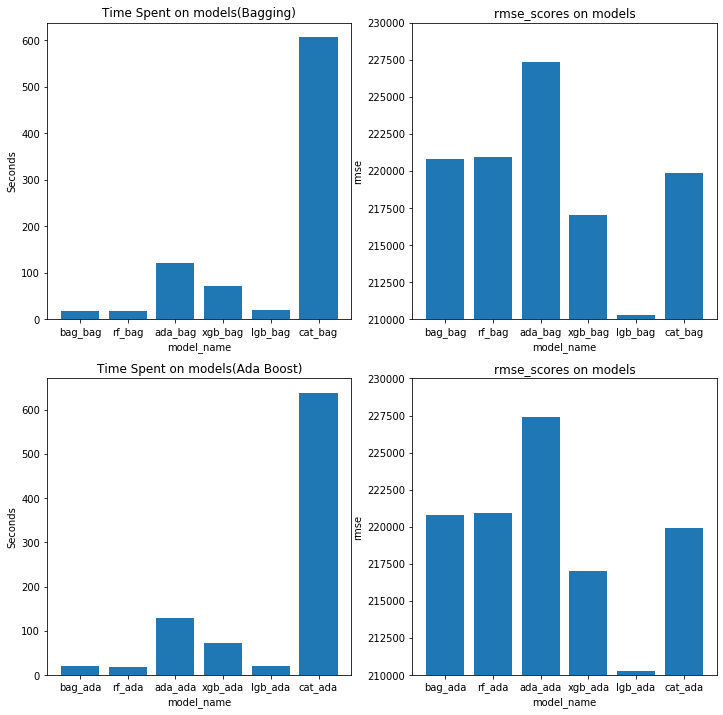

In [144]:
bag_labels=['bag_bag',
       'rf_bag',
       'ada_bag',
       'xgb_bag',
       'lgb_bag',
       'cat_bag']

ada_labels=['bag_ada',
       'rf_ada',
       'ada_ada',
       'xgb_ada',
       'lgb_ada',
       'cat_ada']

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.bar(bag_labels,ensemble_ensemble_performances[0]['times'])
plt.title('Time Spent on models(Bagging)')
plt.ylabel('seconds')
plt.xlabel('Model_name')
plt.subplot(222)
plt.bar(bag_labels,ensemble_ensemble_performances[0]['rmse_scores'])
plt.title('rmse_scores on models')
plt.ylim(210000,230000)
plt.ylabel('rmse')
plt.xlabel('Model_name')


plt.subplot(223)
plt.bar(ada_labels,ensemble_ensemble_performances[1]['times'])
plt.title('Time Spent on models(Ada Boost)')
plt.ylabel('seconds')
plt.xlabel('Model_name')
plt.subplot(224)
plt.bar(ada_labels,ensemble_ensemble_performances[1]['rmse_scores'])
plt.title('rmse_scores on models')
plt.ylabel('rmse')
plt.ylim(210000,230000)
plt.xlabel('Model_name')

plt.savefig('Comparing ensemble_ensemble(Regressions).png')

plt.show()

In [153]:
lgb_model=lgb.LGBMRegressor(learning_rate=0.01,objective='regression')
lgb_param = {'max_depth': [1,5,10,20,30,40,50,60,70,80,90,100], # 트리 깊이
             # Step Size
            'n_estimators': np.arange(100,1000,100), # Number of trees, 트리 생성 개수
            } # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.

cv=StratifiedKFold(n_splits=10,shuffle=False,random_state=0)

lgb_model=optimize_model(lgb_model,lgb_param,cv)

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'max_depth': 5, 'n_estimators': 700}


In [155]:
sqrt(mean_squared_error(lgb_model.predict(test_X),test_Y))

209678.80586500812

In [157]:
start=time.time()
ada_boosting_model=AdaBoostRegressor(base_estimator=lgb_model,
                                  n_estimators=100,
                                  loss='linear',
                                  random_state=0)
ada_boosting_model=ada_boosting_model.fit(train_X,train_Y)
ada_predict=ada_boosting_model.predict(test_X)

print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict,test_Y))))
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The

KeyboardInterrupt: 